# PREDICTING PRICES OF HOUSES IN NIGERIA

**DATA SOURCE**
- House prices: https://www.kaggle.com/datasets/abdullahiyunus/nigeria-houses-and-prices-dataset

In [1]:
# import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
from glob import glob #library that helps us search for files

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.compose import ColumnTransformer
warnings.simplefilter(action="ignore")
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import VarianceThreshold
pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
#importing dataset

data=pd.read_csv("/Users/USER/Documents/DATASETS/nigeria_houses_data.csv")

In [3]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.00,5.00,5.00,4.00,Detached Duplex,Mabushi,Abuja,"450,000,000.00"
1,4.00,5.00,5.00,4.00,Terraced Duplexes,Katampe,Abuja,"800,000,000.00"
2,4.00,5.00,5.00,4.00,Detached Duplex,Lekki,Lagos,"120,000,000.00"
3,4.00,4.00,5.00,6.00,Detached Duplex,Ajah,Lagos,"40,000,000.00"
4,4.00,4.00,5.00,2.00,Semi Detached Duplex,Lekki,Lagos,"75,000,000.00"


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13888 entries, 0 to 24324
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       13888 non-null  float64
 1   bathrooms      13888 non-null  float64
 2   toilets        13888 non-null  float64
 3   parking_space  13888 non-null  float64
 4   title          13888 non-null  object 
 5   town           13888 non-null  object 
 6   state          13888 non-null  object 
 7   price          13888 non-null  float64
dtypes: float64(5), object(3)
memory usage: 976.5+ KB


In [6]:
data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,"13,888.00","13,888.00","13,888.00","13,888.00","13,888.00"
mean,4.19,4.52,5.00,4.07,"400,213,749.37"
std,1.32,1.36,1.42,1.64,"16,149,258,583.19"
min,1.00,1.00,1.00,1.00,"90,000.00"
25%,3.00,4.00,4.00,3.00,"38,000,000.00"
50%,4.00,5.00,5.00,4.00,"75,000,000.00"
75%,5.00,5.00,6.00,5.00,"160,000,000.00"
max,9.00,9.00,9.00,9.00,"1,800,000,000,000.00"


In [7]:
#the minimum house price is 90000, checking where it's located
data.min()

bedrooms                        1.00
bathrooms                       1.00
toilets                         1.00
parking_space                   1.00
title                 Block of Flats
town                             Aba
state                           Abia
price                      90,000.00
dtype: object

In [8]:
data.max()

bedrooms                        9.00
bathrooms                       9.00
toilets                         9.00
parking_space                   9.00
title              Terraced Duplexes
town                      Yewa South
state                         Rivers
price           1,800,000,000,000.00
dtype: object

In [9]:
data.isnull().sum()
#checking for null values

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [10]:
#checking for whitespaces in columns
[i for i in data.columns if i.startswith(' ') or i.endswith(' ')]

[]

In [11]:
#checking for white spaces in data
np.where([data.apply(lambda x:x==' ')])

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [12]:
# SPLITTING DATA

train,test,=train_test_split(data,test_size=0.21,random_state=12)

In [13]:
train.shape,test.shape

((10971, 8), (2917, 8))

## EXPLORATORY DATA ANALYSIS 

**Categorical variables**

In [14]:
df=train.copy()

In [15]:
cat = df.select_dtypes('O')

In [16]:
for i in cat.columns:
    print(i,df[i].nunique())

title 7
town 179
state 24


Town and state have high cardinalities and will affect model performance if encoded. A solution to this is to replace the towns and state with their current population, remove values with low frequency, or target encoding.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

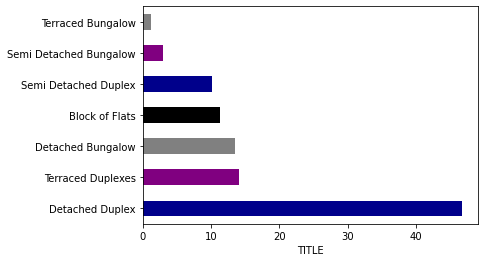

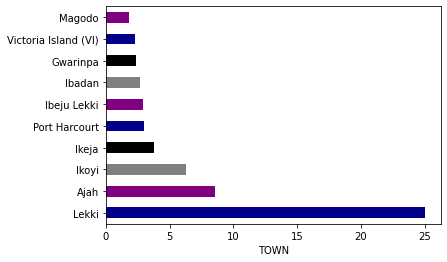

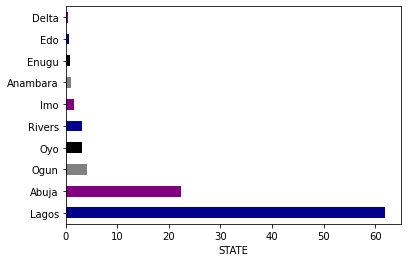

In [17]:
#univariate analysis
for i in cat:
    plt.figure()
    ax=((df[i].value_counts()*100/len(df)).head(10)).plot(kind='barh',color=['darkblue','purple','grey','k'])
    ax.set_xlabel(i.upper())

**Relationship between categorical variables and the target variable**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

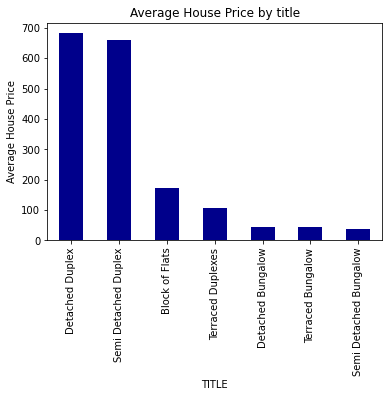

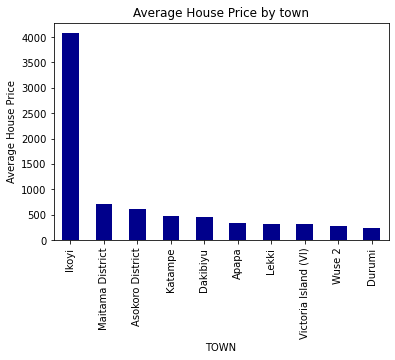

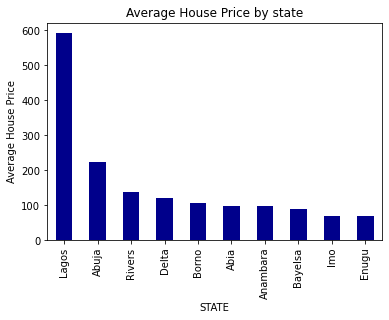

In [18]:
for i in cat.columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).head(10).plot.bar(color='darkblue')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

In [19]:
print('Minimum House Price:',df['price'].min())
print('Maximum House Price:',df['price'].max())

Minimum House Price: 90000.0
Maximum House Price: 1800000000000.0


**Numerical variables**

In [20]:
num=df.select_dtypes('number')
num[:3]

,bedrooms,bathrooms,toilets,parking_space,price
23482,3.00,3.00,3.00,3.00,"18,000,000.00"
23662,6.00,5.00,5.00,4.00,"150,000,000.00"
1443,9.00,9.00,9.00,4.00,"550,000,000.00"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

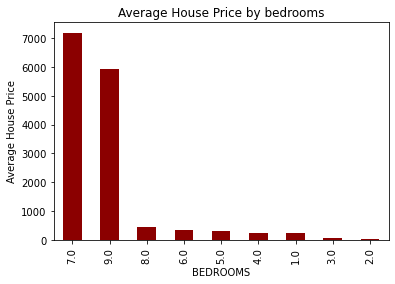

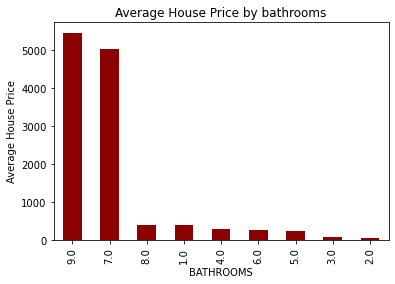

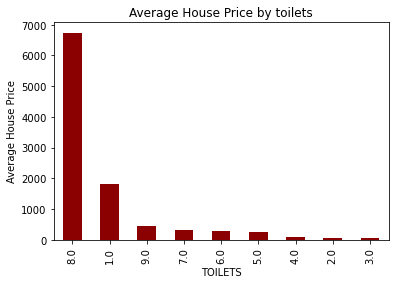

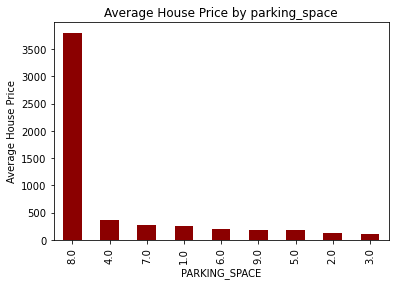

In [21]:
#relationship between discrete features and the target variable
for i in num.iloc[:,:4].columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).plot.bar(color='darkred')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

<AxesSubplot:xlabel='price', ylabel='Density'>

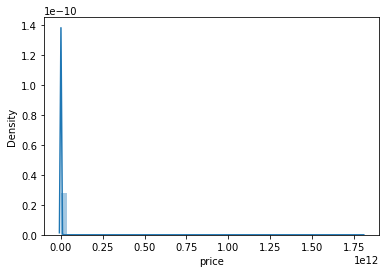

In [22]:
sns.distplot(df['price'])


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price', ylabel='Density'>

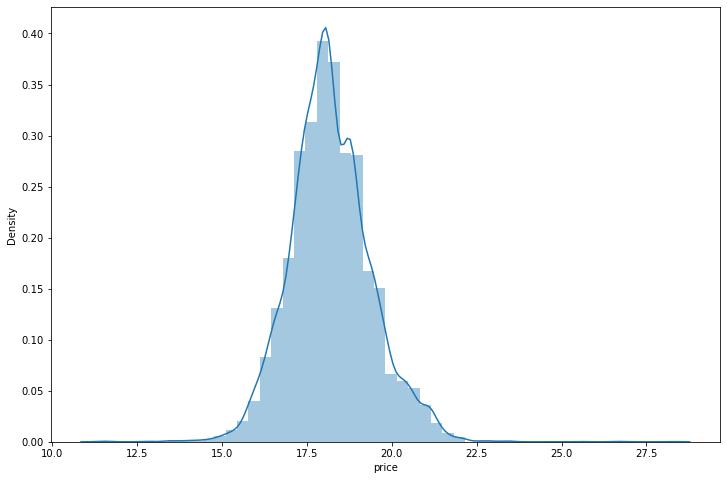

In [23]:
#distribution of continuous variable
plt.figure(figsize=(12,8))

sns.distplot(np.log(df['price']))


In [24]:
df['log_price']=np.log(df['price'])# log transformation of target variable

<AxesSubplot:>

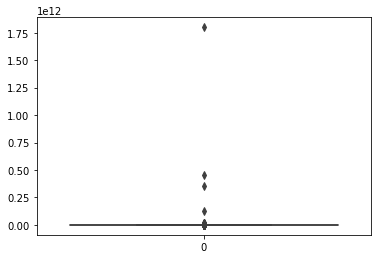

In [25]:
sns.boxplot(df['price'])


<AxesSubplot:>

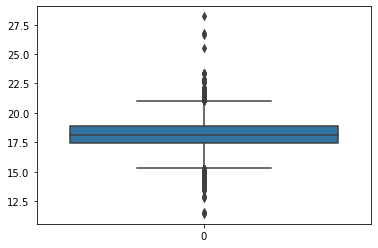

In [26]:
sns.boxplot(df['log_price'])


In [27]:
print('Price')
print('Skewness',df['price'].skew())
print('Kurtosis',df['price'].kurt())
Mean=round(df['price'].mean(),2)
Median=round(df['price'].median(),2)
print('Mean',Mean)
print('Median',Median)
if Mean>Median:
    print('Right Skewed')
else:
    print('Left Skewed')
    print('*****************************************************************************')
    print()

Price
Skewness 92.17994452482394
Kurtosis 9020.69255800467
Mean 427128174.13
Median 75000000.0
Right Skewed


The distplot and boxplot show the presence of outliers in the data. Are they due to errors or typos in the data collection process, or do they represent legitimate observations with unusually high or low values?

Further analysis will be done by checking the presence of outliers using the Z-score method.

**Checking for outliers via Zscore**

In [28]:
#calculating the means and std of variables
threshold=3
for i in df.select_dtypes(include='number').columns:
    means = df[i].mean()
    stds = df[i].std()
    
    zscores = (df[i] - means) / stds
    
    outliers=zscores[zscores.abs() > threshold]
    
    print(f'{i} has {outliers.count().sum()} Outliers')

    

bedrooms has 65 Outliers
bathrooms has 71 Outliers
toilets has 0 Outliers
parking_space has 90 Outliers
price has 4 Outliers
log_price has 58 Outliers


In [29]:
zscores

23482                  -1.25
23662                   0.52
1443                    1.61
8787                    0.98
14559                  -0.83
19554                  -0.06
9395                   -0.63
23690                   0.33
56                     -2.51
6702                   -0.70
6986                    1.23
13357                  -2.04
7729                   -0.83
1634                   -0.06
21024                   1.23
17858                  -1.59
23370                   0.14
6530                   -0.91
18223                  -0.49
3280                   -0.70
16478                  -0.18
7452                    1.30
9900                    0.26
173                    -0.06
225                    -0.18
14818                  -0.28
14563                   0.18
7820                    0.30
15032                  -0.88
16191                  -1.25
20092                  -1.09
2395                   -0.98
12729                   1.10
3698                   -0.59
8029          

**Checking for linearity**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

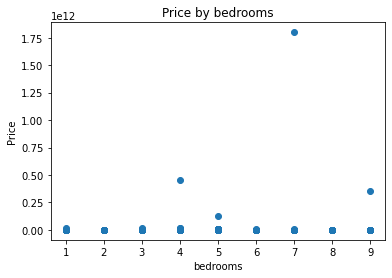

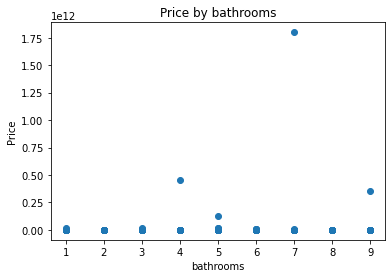

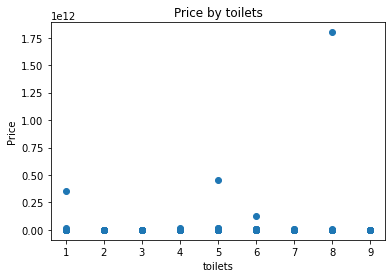

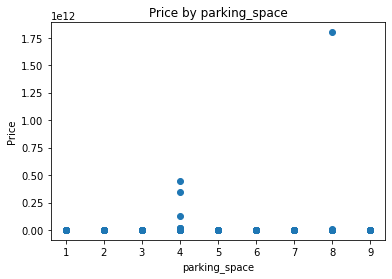

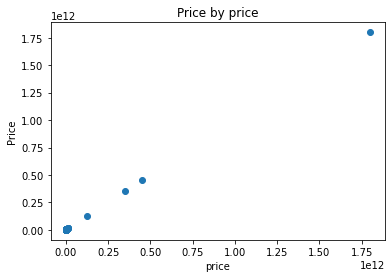

In [30]:
for i in num.columns:
    plt.figure()
    plt.scatter(df[i],df['price'])
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title(f'Price by {i}')

**Checking for correlation and multicollinearity**

<AxesSubplot:>

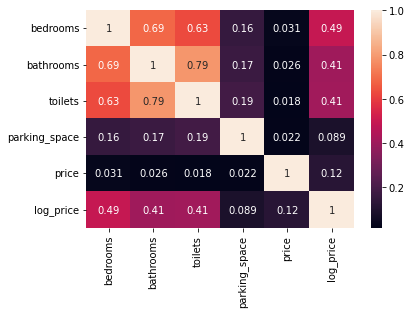

In [31]:
sns.heatmap(df.corr(),annot=True)

**Checking for normality**

In [32]:
from scipy.stats import shapiro

In [33]:
for i in num:
    print(i.upper())
    pvalue=stats.shapiro(df[i])[1]
    if pvalue<0.05:
        print('Null hypothesis rejected. Data is not normal')
    else:
        print('Null hypothesis accepted. Data is normal')
    print()

BEDROOMS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

BATHROOMS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

TOILETS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

PARKING_SPACE


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

PRICE


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal



## FEATURE ENGINEERING

**Removing Outliers**

In [29]:
mini,maxi=df['price'].quantile([0.01,0.99])

mask = df['price'].between(mini,maxi)

df=df[mask]

<AxesSubplot:>

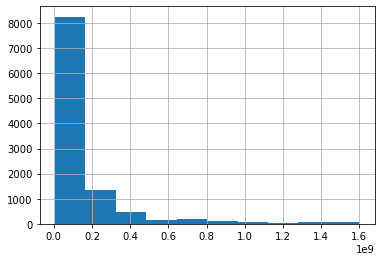

In [30]:
df.price.hist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

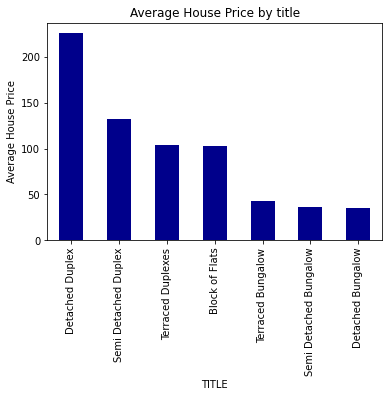

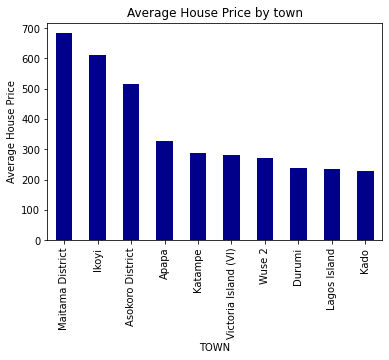

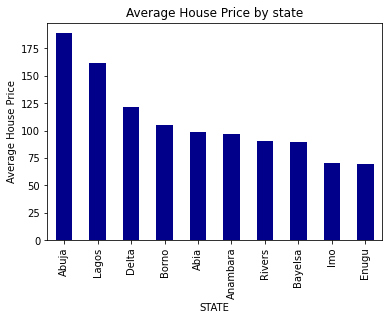

In [31]:
for i in cat.columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).head(10).plot.bar(color='darkblue')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

**Dealing with high cardinality by removing values that are less than 1%**

In [32]:
for m in cat:
    
    temp=df.groupby(m)['price'].count()/len(df)
    
    #features greater than 1%
    temp_df=temp[temp>0.01].index 
    
    #extract the feature if it is in temp_df(>1%) else replace with rare_var
    df[m]=np.where(df[m].isin(temp_df),df[m],'Others')
    

In [33]:
for a in df.select_dtypes('O').columns:
    print(a,df[a].nunique())

title 7
town 23
state 7


In [34]:
df['Total_rooms']= df['bedrooms'] + df['bathrooms'] + df['toilets']

**Pipeline**

In [39]:
ytrain=train['price']
xtrain=train.drop(['price'],axis=1)

In [30]:
target_variable=['price']

add_columns_variables=['bedrooms','bathrooms','toilets']

categorical_variables=['title','town','state']

In [44]:
numeric_features =['bedrooms','bathrooms','toilets']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features =['title','town','state']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Add a log transformation step to the pipeline
log_transformer = Pipeline(steps=[
    ('log', np.log1p)
])

# Add a step to create new columns in the pipeline
def create_new_columns(xtrain):
    xtrain['total_rooms'] = xtrain['bedrooms'] + train['bathrooms'] + xtrain['toilets']
    return xtrain

# Add a step to replace high cardinality variables with 'others' in the pipeline
def replace_high_cardinality(xtrain, column, threshold=10):
    value_counts = xtrain[column].value_counts()
    to_replace = value_counts[value_counts <= threshold].index
    xtrain[column].replace(to_replace, 'others', inplace=True)
    return xtrain

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_transformer', log_transformer),
    ('create_new_columns', create_new_columns),
    ('replace_high_cardinality', replace_high_cardinality(xtrain, 'others', threshold=10)),
    ('ohe',OneHotEncoder()),
    ('model', Ridge()),
])

# Fit the model
pipeline.fit(xtrain, ytrain)


TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '<ufunc 'log1p'>' (type <class 'numpy.ufunc'>) doesn't

# ---- Ignore below--

In [38]:
# log transform the target variable
def log_transform(df, target_variable):
    df[target_variable] = np.log(df[target_variable])

# create new columns
def create_new_columns(df):
    df['Total_rooms']= df['bedrooms'] + df['bathrooms'] + df['toilets']

# remove columns with high cardinality
def remove_high_cardinality(df, threshold=10):
    high_cardinality = [col for col in df if df[col].nunique() > threshold]
    df.drop(high_cardinality, axis=1, inplace=True)

# encode categorical variables
def encode_categorical(df, categorical_variables):
    encoder = OneHotEncoder(sparse=False)
    encoded = encoder.fit_transform(df[categorical_variables])
    df = df.drop(categorical_variables, axis=1)
    df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names(categorical_variables))
    df = pd.concat([df, df_encoded], axis=1)
    return df

# define the pipeline
pipeline = Pipeline([
    ('log_transform', log_transform),
    ('create_new_columns', create_new_columns),
    ('remove_high_cardinality', remove_high_cardinality),
    ('encode_categorical', encode_categorical),
    ('model',Ridge())
])

# apply the pipeline to the data
target_variable='price'
categorical_variables=['title','town','state']

ytrain=train[target_variable]
xtrain=train.drop(target_variable,axis=1)

pipeline.fit(xtrain,ytrain)


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '<function log_transform at 0x00000260AAC01F70>' (type <class 'function'>) doesn't

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
class log_transformer(BaseEstimator, TransformerMixin):
    
    def __init__(self): # no *args or **kwargs
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,y):
        return np.log(y)
    
    
    
class add_feature(BaseEstimator, TransformerMixin):
    
    def __init__(self): # no *args or **kwargs
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        X['Total_rooms']= X['bedrooms'] + X['bathrooms'] + X['toilets']
        return X
      
class remove_high_cardinality(BaseEstimator, TransformerMixin):
    
    def __init__(self): # no *args or **kwargs
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        # Add a step to replace high cardinality variables with 'others' in the pipeline
        value_counts = X[column].value_counts()
        to_replace = value_counts[value_counts <= threshold].index
        X[column].replace(to_replace, 'others', inplace=True)
        return X
        

In [46]:
pipeline= Pipeline([('log_transform',log_transformer(target_variable)),
                   ('add_columns',add_feature(add_columns_variables)),
                   ('remove_cardinality',remove_high_cardinality(categorical_variables)),
                   ('one_hot_encoder',OneHotEncoder(categorical_variables)),
                   ('model',Ridge())])

TypeError: __init__() takes 1 positional argument but 2 were given

In [51]:
def log_transformer(x):
    return np.log(df['price'])

def AddColumns(x):
    return pd.concat([x,x['bedrooms'] + x['bathrooms'] + x['toilets']],axis=1)

# Add a step to replace high cardinality variables with 'others' in the pipeline
def replace_high_cardinality(xtrain, column, threshold=10):
    value_counts = xtrain[column].value_counts()
    to_replace = value_counts[value_counts <= threshold].index
    xtrain[column].replace(to_replace, 'others', inplace=True)
    return xtrain


In [41]:
# Define the preprocessing steps
preprocessing = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), ['price']),
    ('create_new_columns', AddColumns(), add_columns_variables),
    ('remove_high_cardinality', remove_high_cardinality(), categorical_variables)
    ('encode_categorical', OneHotEncoder(), categorical_variables),
    
])

# Define the model
model = LinearRegression()

# Build the pipeline
pipeline = Pipeline([('preprocessing', preprocessing), ('model', model)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)


TypeError: AddColumns() missing 1 required positional argument: 'x'

In [ ]:
# Create a transformer for the categorical variable
categorical_transformer = ColumnTransformer(transformers=[('ohe', OneHotEncoder(), categorical_variables)])

# Create a transformer for the target variable
target_transformer = Pipeline(steps=[('log', FunctionTransformer(np.log, np.exp))])

# Combine the transformers into a preprocessor
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, ['neighborhood']),
                                              ('num', StandardScaler(), ['size'])],
                                remainder='passthrough')

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Ridge())])


In [37]:
# Create a transformer for the target variable
log_transformer = Pipeline(steps=[('log', FunctionTransformer(np.log, np.exp))])

# Add new columns
add_columns_transformer = Pipeline(steps=[
    ('add_columns', AddColumns())
])

# Encode the categorical variable
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

#remove high cardinality
cardinality_transformer=Pipeline(steps=[
    ('remove_high_cardinality', remove_high_cardinality())
])

# Combine the transformation steps into a single pipeline
preprocessor = ColumnTransformer(transformers=[
    ('log', log_transformer, ['price']),
    ('remove_card', cardinality_transformer, categorical_variables),
    ('add_columns', add_columns_transformer, add_columns_variables),
    ('cat', categorical_transformer, categorical_variables)
])

# Fit a ridge regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])


TypeError: AddColumns() missing 1 required positional argument: 'x'

In [52]:
pipeline= Pipeline([('log_transform',FunctionTransformer(log_transformer,validate=False)),
                   ('add_columns',FunctionTransformer(AddColumns,validate=False)),
                   ('remove_cardinality',FunctionTransformer(remove_high_cardinality,validate=False)),
                   ('one_hot_encoder',OneHotEncoder()),
                   ('model',Ridge())])

In [53]:
xtrain=train.drop(['price'],axis=1)
ytrain=train['price']

In [54]:
pipeline.fit(xtrain,ytrain)

KeyError: 'bedrooms'

In [ ]:
preprocessing = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), ['target_variable']),
    ('create_new_columns', SomeCustomTransformer(), ['column1', 'column2']),
    ('encode_categorical', OneHotEncoder(), ['categorical_column'])
])

# Define the model
model = LinearRegression()

# Build the pipeline
pipeline = Pipeline([('preprocessing', preprocessing), ('model', model)])


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
bedrooms_ix, bathrooms_ix, toilets_ix, parking_space_ix, title_ix, town_ix, state_ix,price_ix= 0,1,2,3,4,5,6,7
class Feature_engineering(BaseEstimator, TransformerMixin):
    
    def __init__(self, change_values = True): # no *args or **kwargs
        self.change_values = change_values 
        
    def fit(self, X, y=None):
        return self # nothing else to do 
    
    def transform(self, X, y=None):
        
        q9=np.quantile(X[:,price_ix],0.99)#removing outliers
        q1=np.quantile(X[:,price_ix],0.01)

        X=X[(X[:,price_ix]>q1) & (X[:,price_ix]<q9)]#masking outliers
      
        total_rooms=(X[:,bedrooms_ix] + X[:,bathrooms_ix] + X[:,toilets_ix])#adding a new column
        
        X = pd.DataFrame(X)

        cat=X.iloc[:,4:7]
        
        for m in cat:
            temp=X[m].value_counts(normalize=True)
            #features greater than 1%
            
            temp_df=temp[temp>0.01].index 
            #extract the feature if it is in temp_df(>1%) else replace with rare_var
            
            X[m]=np.where(X[m].isin(temp_df),X[m],'Others')

    
    
        
        X.drop([X.iloc[:,price_ix]],inplace=True)
        if self.change_values:

            #df=np.delete(X,[sex_ix, smoker_ix, region_ix],axis=1)
            return np.c_[X,total_rooms]
        else:
            return X


In [39]:
attr_adder = Feature_engineering(change_values = True)
r=attr_adder.transform(df.values)
print(pd.DataFrame(r))

KeyError: '[(18000000.0, 150000000.0, 550000000.0, 260000000.0, 30000000.0, 75000000.0, 38000000.0, 120000000.0, 35000000.0, 350000000.0, 30000000.0, 75000000.0, 350000000.0, 12000000.0, 95000000.0, 27000000.0, 45000000.0, 35000000.0, 65000000.0, 380000000.0, 110000000.0, 75000000.0, 65000000.0, 58000000.0, 100000000.0, 115000000.0, 28000000.0, 18000000.0, 22000000.0, 25000000.0, 300000000.0, 40000000.0, 120000000.0, 20000000.0, 30000000.0, 90000000.0, 100000000.0, 14000000.0, 110000000.0, 900000000.0, 10000000.0, 400000000.0, 75000000.0, 30000000.0, 50000000.0, 130000000.0, 85000000.0, 78000000.0, 300000000.0, 90000000.0, 1100000000.0, 37000000.0, 85000000.0, 65000000.0, 90000000.0, 40000000.0, 170000000.0, 50000000.0, 10000000.0, 190000000.0, 420000000.0, 90000000.0, 30000000.0, 1000000000.0, 25000000.0, 1000000000.0, 900000000.0, 90000000.0, 27000000.0, 700000000.0, 28000000.0, 35000000.0, 700000000.0, 85000000.0, 850000000.0, 27000000.0, 70000000.0, 20000000.0, 24000000.0, 100000000.0, 35000000.0, 130000000.0, 650000000.0, 40000000.0, 400000000.0, 120000000.0, 470000000.0, 25000000.0, 80000000.0, 350000000.0, 18000000.0, 140000000.0, 150000000.0, 180000000.0, 40000000.0, 650000000.0, 70000000.0, 800000000.0, 33000000.0, 210000000.0, 22000000.0, 60000000.0, 800000000.0, 45000000.0, 125000000.0, 30000000.0, 20000000.0, 30000000.0, 120000000.0, 55000000.0, 73000000.0, 500000000.0, 55000000.0, 60000000.0, 250000000.0, 38000000.0, 350000000.0, 8500000.0, 50000000.0, 430000000.0, 36000000.0, 107000000.0, 65000000.0, 18000000.0, 79000000.0, 250000000.0, 115000000.0, 200000000.0, 25000000.0, 28000000.0, 12000000.0, 11500000.0, 50000000.0, 65000000.0, 83000000.0, 195000000.0, 28000000.0, 15000000.0, 15000000.0, 19500000.0, 65000000.0, 15000000.0, 180000000.0, 85000000.0, 40000000.0, 250000000.0, 450000000.0, 37000000.0, 75000000.0, 78000000.0, 160000000.0, 125000000.0, 150000000.0, 45000000.0, 28000000.0, 85000000.0, 12000000.0, 32000000.0, 195000000.0, 120000000.0, 750000000.0, 36000000.0, 38900000.0, 330000000.0, 120000000.0, 12000000.0, 85000000.0, 35000000.0, 850000000.0, 220000000.0, 800000000.0, 50000000.0, 50000000.0, 180000000.0, 650000000.0, 85000000.0, 40000000.0, 55000000.0, 80000000.0, 210000000.0, 65000000.0, 110000000.0, 240000000.0, 75000000.0, 28000000.0, 100000000.0, 230000000.0, 220000000.0, 23000000.0, 18000000.0, 130000000.0, 52000000.0, 10000000.0, 50000000.0, 11000000.0, 180000000.0, 25000000.0, 285000000.0, 310000000.0, 150000000.0, 13000000.0, 370000000.0, 150000000.0, 170000000.0, 22000000.0, 55000000.0, 60000000.0, 450000000.0, 60000000.0, 35000000.0, 120000000.0, 14000000.0, 85000000.0, 250000000.0, 350000000.0, 12000000.0, 78000000.0, 160000000.0, 10000000.0, 580000000.0, 55000000.0, 40000000.0, 175000000.0, 50000000.0, 100000000.0, 30000000.0, 72000000.0, 50000000.0, 150000000.0, 8500000.0, 150000000.0, 49000000.0, 75000000.0, 80000000.0, 60000000.0, 40000000.0, 41500000.0, 12000000.0, 100000000.0, 55000000.0, 140000000.0, 80000000.0, 17000000.0, 30000000.0, 15862500.0, 100000000.0, 60000000.0, 170000000.0, 18000000.0, 40000000.0, 270000000.0, 350000000.0, 30000000.0, 800000000.0, 138000000.0, 17000000.0, 600000000.0, 90000000.0, 34000000.0, 120000000.0, 13000000.0, 40000000.0, 55000000.0, 14000000.0, 33000000.0, 8500000.0, 120000000.0, 120000000.0, 38000000.0, 65000000.0, 78000000.0, 170000000.0, 25000000.0, 50000000.0, 43500000.0, 35000000.0, 30000000.0, 275000000.0, 14000000.0, 170000000.0, 18000000.0, 45000000.0, 30000000.0, 70000000.0, 40000000.0, 27000000.0, 162000000.0, 80000000.0, 32000000.0, 15000000.0, 12500000.0, 24000000.0, 600000000.0, 50000000.0, 200000000.0, 250000000.0, 10000000.0, 650000000.0, 20000000.0, 250000000.0, 135000000.0, 400000000.0, 60000000.0, 16000000.0, 180000000.0, 135000000.0, 115000000.0, 15000000.0, 450000000.0, 74000000.0, 115000000.0, 270000000.0, 120000000.0, 75000000.0, 50000000.0, 410000000.0, 250000000.0, 72000000.0, 95000000.0, 280000000.0, 65000000.0, 400000000.0, 85000000.0, 40000000.0, 145000000.0, 130000000.0, 35000000.0, 90000000.0, 15000000.0, 235000000.0, 260000000.0, 240000000.0, 38990000.0, 25000000.0, 70000000.0, 17000000.0, 120000000.0, 65000000.0, 16250000.0, 300000000.0, 750000000.0, 52000000.0, 500000000.0, 270000000.0, 160000000.0, 15000000.0, 50000000.0, 100000000.0, 25000000.0, 50000000.0, 570000000.0, 180000000.0, 25000000.0, 250000000.0, 70000000.0, 40000000.0, 155000000.0, 95000000.0, 175000000.0, 185000000.0, 190000000.0, 30000000.0, 50000000.0, 850000000.0, 17000000.0, 500000000.0, 17500000.0, 76000000.0, 150000000.0, 80000000.0, 75000000.0, 250000000.0, 35000000.0, 210000000.0, 240000000.0, 20000000.0, 75000000.0, 67000000.0, 20000000.0, 75000000.0, 220000000.0, 63000000.0, 250000000.0, 55000000.0, 70000000.0, 220000000.0, 128000000.0, 250000000.0, 70500000.0, 65000000.0, 9500000.0, 55000000.0, 50000000.0, 299999999.0, 45000000.0, 90000000.0, 35000000.0, 60000000.0, 48000000.0, 130000000.0, 55000000.0, 55000000.0, 35000000.0, 150000000.0, 16000000.0, 15000000.0, 100000000.0, 50000000.0, 65000000.0, 8500000.0, 72000000.0, 80000000.0, 400000000.0, 70000000.0, 50000000.0, 180000000.0, 40000000.0, 45000000.0, 45000000.0, 30000000.0, 115000000.0, 105000000.0, 90000000.0, 65000000.0, 30000000.0, 23000000.0, 80000000.0, 16000000.0, 118000000.0, 185000000.0, 25000000.0, 112000000.0, 55000000.0, 400000000.0, 220000000.0, 130000000.0, 77000000.0, 75000000.0, 120000000.0, 52000000.0, 75000000.0, 530000000.0, 40000000.0, 120000000.0, 330000000.0, 18000000.0, 35000000.0, 15500000.0, 1100000000.0, 250000000.0, 40000000.0, 80000000.0, 280000000.0, 200000000.0, 65000000.0, 35000000.0, 14000000.0, 85000000.0, 300000000.0, 33000000.0, 150000000.0, 450000000.0, 110000000.0, 30000000.0, 60000000.0, 16000000.0, 45000000.0, 58000000.0, 450000000.0, 1100000000.0, 82000000.0, 59500000.0, 250000000.0, 38000000.0, 265000000.0, 55000000.0, 48000000.0, 135000000.0, 60000000.0, 235000000.0, 120000000.0, 53000000.0, 76000000.0, 35000000.0, 88000000.0, 850000000.0, 430000000.0, 100000000.0, 80000000.0, 35000000.0, 197000000.0, 46000000.0, 500000000.0, 130000000.0, 77000000.0, 135000000.0, 270000000.0, 145000000.0, 750000000.0, 200000000.0, 40000000.0, 150000000.0, 400000000.0, 350000000.0, 40000000.0, 700000000.0, 42000000.0, 98000000.0, 170000000.0, 150000000.0, 450000000.0, 76000000.0, 60000000.0, 90000000.0, 900000000.0, 180000000.0, 60000000.0, 20000000.0, 75000000.0, 120000000.0, 70000000.0, 94000000.0, 80000000.0, 125000000.0, 40000000.0, 98000000.0, 100000000.0, 85000000.0, 40000000.0, 30000000.0, 200000000.0, 550000000.0, 14000000.0, 330000000.0, 35000000.0, 90000000.0, 55000000.0, 290000000.0, 52000000.0, 30000000.0, 98000000.0, 28800000.0, 120000000.0, 70000000.0, 60000000.0, 65000000.0, 158000000.0, 70000000.0, 180000000.0, 20000000.0, 130000000.0, 98000000.0, 85000000.0, 36000000.0, 72000000.0, 150000000.0, 30000000.0, 165000000.0, 75000000.0, 50000000.0, 75000000.0, 150000000.0, 70000000.0, 220000000.0, 12000000.0, 45000000.0, 85000000.0, 15000000.0, 360000000.0, 135000000.0, 40000000.0, 325000000.0, 20000000.0, 30000000.0, 11000000.0, 40000000.0, 19900000.0, 120000000.0, 45000000.0, 37000000.0, 28000000.0, 120000000.0, 850000000.0, 23000000.0, 110000000.0, 200000000.0, 25000000.0, 24000000.0, 28000000.0, 1000000000.0, 180000000.0, 155000000.0, 420000000.0, 50000000.0, 25000000.0, 20000000.0, 130000000.0, 55000000.0, 60000000.0, 130000000.0, 45000000.0, 380000000.0, 50000000.0, 200000000.0, 150000000.0, 22000000.0, 35000000.0, 38800000.0, 550000000.0, 23000000.0, 75000000.0, 90000000.0, 175000000.0, 55000000.0, 450000000.0, 90000000.0, 145000000.0, 100000000.0, 75000000.0, 80000000.0, 65000000.0, 32900000.0, 240000000.0, 350000000.0, 115000000.0, 82000000.0, 37000000.0, 45000000.0, 95000000.0, 270000000.0, 150000000.0, 9500000.0, 950000000.0, 130000000.0, 11500000.0, 45000000.0, 30000000.0, 85000000.0, 150000000.0, 250000000.0, 28000000.0, 93000000.0, 175000000.0, 33000000.0, 35000000.0, 80000000.0, 260000000.0, 70000000.0, 400000000.0, 45000000.0, 20000000.0, 90000000.0, 75000000.0, 30000000.0, 50000000.0, 35000000.0, 650000000.0, 68000000.0, 220000000.0, 142000000.0, 65000000.0, 400000000.0, 65000000.0, 38000000.0, 15000000.0, 120000000.0, 32900000.0, 42000000.0, 138000000.0, 50000000.0, 120000000.0, 150000000.0, 60000000.0, 300000000.0, 50000000.0, 75000000.0, 80000000.0, 30000000.0, 55000000.0, 28000000.0, 69999999.0, 75000000.0, 50000000.0, 110000000.0, 130000000.0, 117000000.0, 53000000.0, 270000000.0, 65000000.0, 80000000.0, 78000000.0, 18000000.0, 30000000.0, 250000000.0, 55000000.0, 80000000.0, 85000000.0, 60000000.0, 58000000.0, 28000000.0, 50000000.0, 275000000.0, 15000000.0, 160000000.0, 10500000.0, 220000000.0, 16000000.0, 15000000.0, 135000000.0, 155000000.0, 65000000.0, 51000000.0, 400000000.0, 70000000.0, 160000000.0, 700000000.0, 130000000.0, 30000000.0, 33000000.0, 35000000.0, 40000000.0, 28000000.0, 150000000.0, 60000000.0, 600000000.0, 15000000.0, 95000000.0, 10000000.0, 55000000.0, 850000000.0, 200000000.0, 80000000.0, 250000000.0, 30000000.0, 65000000.0, 50000000.0, 15000000.0, 60000000.0, 180000000.0, 9000000.0, 250000000.0, 250000000.0, 200000000.0, 400000000.0, 250000000.0, 60000000.0, 39000000.0, 20000000.0, 34000000.0, 150000000.0, 35000000.0, 320000000.0, 180000000.0, 60000000.0, 60500000.0, 27000000.0, 68000000.0, 125000000.0, 270000000.0, 32000000.0, 16000000.0, 25000000.0, 45000000.0, 50000000.0, 30000000.0, 140000000.0, 46000000.0, 115000000.0, 320000000.0, 48000000.0, 200000000.0, 90000000.0, 55000000.0, 175000000.0, 650000000.0, 40000000.0, 250000000.0, 700000000.0, 350000000.0, 180000000.0, 110000000.0, 170000000.0, 32000000.0, 105000000.0, 13700000.0, 87000000.0, 55000000.0, 45000000.0, 30000000.0, 78000000.0, 20000000.0, 85000000.0, 110000000.0, 8100000.0, 35000000.0, 410000000.0, 70000000.0, 75000000.0, 125000000.0, 260000000.0, 26500000.0, 350000000.0, 650000000.0, 45000000.0, 60000000.0, 80000000.0, 78000000.0, 19000000.0, 380000000.0, 12000000.0, 26000000.0, 78000000.0, 18000000.0, 350000000.0, 35000000.0, 850000000.0, 28000000.0, 95000000.0, 85000000.0, 60000000.0, 25000000.0, 75000000.0, 34000000.0, 65000000.0, 135000000.0, 40000000.0, 22900000.0, 48000000.0, 12500000.0, 28500000.0, 122000000.0, 250000000.0, 67000000.0, 55000000.0, 46000000.0, 370000000.0, 85000000.0, 43000000.0, 250000000.0, 130000000.0, 40000000.0, 285000000.0, 130000000.0, 130000000.0, 33000000.0, 110000000.0, 52000000.0, 70000000.0, 265000000.0, 45000000.0, 28000000.0, 100000000.0, 12500000.0, 210000000.0, 160000000.0, 60000000.0, 175000000.0, 75000000.0, 16000000.0, 65000000.0, 95000000.0, 18000000.0, 135000000.0, 220000000.0, 55000000.0, 35000000.0, 40000000.0, 160000000.0, 70000000.0, 232000000.0, 55000000.0, 80000000.0, 480000000.0, 50000000.0, 65000000.0, 64000000.0, 16000000.0, 80000000.0, 30000000.0, 400000000.0, 35000000.0, 54000000.0, 95000000.0, 10000000.0, 16000000.0, 12000000.0, 200000000.0, 30000000.0, 99000000.0, 280000000.0, 350000000.0, 295000000.0, 19000000.0, 750000000.0, 45000000.0, 50000000.0, 410000000.0, 70000000.0, 99000000.0, 135000000.0, 44000000.0, 22000000.0, 275000000.0, 75000000.0, 35000000.0, 140000000.0, 55000000.0, 38000000.0, 21000000.0, 16000000.0, 65000000.0, 210000000.0, 68000000.0, 25000000.0, 165000000.0, 125000000.0, 53000000.0, 130000000.0, 55000000.0, 650000000.0, 80000000.0, 700000000.0, 65000000.0, 35000000.0, 60000000.0, 22000000.0, 32000000.0, 15000000.0, 600000000.0, 85000000.0, 200000000.0, 14000000.0, 170000000.0, 370000000.0, 18000000.0, 45000000.0, 75000000.0, 30000000.0, 12000000.0, 850000000.0, 230000000.0, 100000000.0, 345000000.0, 82000000.0, 60000000.0, 120000000.0, 210000000.0, 44000000.0, 20000000.0, 20000000.0, 80000000.0, 270000000.0, 55000000.0, 60000000.0, 126000000.0, 70000000.0, 160000000.0, 160000000.0, 260000000.0, 13000000.0, 500000000.0, 22000000.0, 57000000.0, 125000000.0, 70000000.0, 142000000.0, 22000000.0, 140000000.0, 65000000.0, 120000000.0, 55000000.0, 90000000.0, 75000000.0, 240000000.0, 27000000.0, 65000000.0, 300000000.0, 15540000.0, 75000000.0, 98000000.0, 150000000.0, 200000000.0, 110000000.0, 52000000.0, 330000000.0, 64000000.0, 50000000.0, 66000000.0, 17500000.0, 45000000.0, 55000000.0, 50000000.0, 150000000.0, 90000000.0, 410000000.0, 120000000.0, 50000000.0, 15000000.0, 55000000.0, 150000000.0, 70000000.0, 40000000.0, 11000000.0, 8500000.0, 55000000.0, 30000000.0, 70000000.0, 650000000.0, 210000000.0, 15000000.0, 75000000.0, 118000000.0, 27500000.0, 120000000.0, 50000000.0, 450000000.0, 50000000.0, 45000000.0, 50000000.0, 70000000.0, 100000000.0, 67500000.0, 25000000.0, 90000000.0, 120000000.0, 180000000.0, 22000000.0, 70000000.0, 53000000.0, 19000000.0, 25000000.0, 15000000.0, 45000000.0, 62000000.0, 95000000.0, 88000000.0, 138000000.0, 25000000.0, 25000000.0, 35900000.0, 120000000.0, 165000000.0, 75000000.0, 14000000.0, 80000000.0, 23000000.0, 30000000.0, 220000000.0, 10000000.0, 36000000.0, 12000000.0, 69000000.0, 35000000.0, 220000000.0, 15000000.0, 47000000.0, 135000000.0, 35000000.0, 80000000.0, 150000000.0, 100000000.0, 18900000.0, 21000000.0, 10500000.0, 75000000.0, 39000000.0, 20000000.0, 140000000.0, 40000000.0, 28000000.0, 210000000.0, 230000000.0, 78000000.0, 300000000.0, 45000000.0, 180000000.0, 500000000.0, 380000000.0, 34000000.0, 45000000.0, 28000000.0, 12000000.0, 155000000.0, 85000000.0, 50000000.0, 16000000.0, 120000000.0, 65000000.0, 180000000.0, 26000000.0, 350000000.0, 320000000.0, 75000000.0, 56000000.0, 40000000.0, 600000000.0, 18000000.0, 190000000.0, 85000000.0, 20000000.0, 12000000.0, 11500000.0, 390000000.0, 500000000.0, 31000000.0, 25000000.0, 35000000.0, 70000000.0, 120000000.0, 67000000.0, 65000000.0, 87000000.0, 115000000.0, 46000000.0, 23000000.0, 35000000.0, 28000000.0, 15000000.0, 300000000.0, 43000000.0, 45000000.0, 250000000.0, 65000000.0, 36000000.0, 80000000.0, 55000000.0, 55000000.0, 135000000.0, 280000000.0, 45000000.0, 15120000.0, 120000000.0, 320000000.0, 25500000.0, 150000000.0, 12000000.0, 50000000.0, 65000000.0, 80000000.0, 18000000.0, 600000000.0, 260000000.0, 38000000.0, 50000000.0, 150000000.0, 27000000.0, 14000000.0, 40000000.0, 150000000.0, 45000000.0, 58000000.0, 160000000.0, 90000000.0, 180000000.0, 25000000.0, 260000000.0, 200000000.0, 80000000.0, 270000000.0, 47000000.0, 55000000.0, 137500000.0, 520000000.0, 22000000.0, 70000000.0, 25000000.0, 200000000.0, 900000000.0, 450000000.0, 140000000.0, 850000000.0, 70000000.0, 14000000.0, 15000000.0, 45000000.0, 17500000.0, 90000000.0, 90000000.0, 60000000.0, 310000000.0, 150000000.0, 27000000.0, 130000000.0, 65000000.0, 15000000.0, 30000000.0, 30000000.0, 42000000.0, 50000000.0, 350000000.0, 475000000.0, 70000000.0, 120000000.0, 18000000.0, 150000000.0, 110000000.0, 800000000.0, 44000000.0, 210000000.0, 160000000.0, 210000000.0, 75000000.0, 130000000.0, 35000000.0, 380000000.0, 35000000.0, 9500000.0, 180000000.0, 20000000.0, 35000000.0, 122000000.0, 35000000.0, 90000000.0, 135000000.0, 110000000.0, 380000000.0, 67000000.0, 125000000.0, 25000000.0, 1000000000.0, 160000000.0, 60000000.0, 230000000.0, 28000000.0, 32000000.0, 55000000.0, 58000000.0, 115000000.0, 65000000.0, 70000000.0, 80000000.0, 75000000.0, 60000000.0, 49000000.0, 14500000.0, 37000000.0, 59000000.0, 250000000.0, 155000000.0, 15000000.0, 225000000.0, 130000000.0, 80000000.0, 82000000.0, 200000000.0, 120000000.0, 1000000000.0, 155000000.0, 70000000.0, 15000000.0, 85000000.0, 30000000.0, 18000000.0, 9000000.0, 23000000.0, 185000000.0, 26000000.0, 25000000.0, 75000000.0, 43000000.0, 60000000.0, 32000000.0, 600000000.0, 55000000.0, 65000000.0, 100000000.0, 19000000.0, 450000000.0, 35000000.0, 140000000.0, 73000000.0, 32000000.0, 260000000.0, 750000000.0, 55000000.0, 175000000.0, 78000000.0, 33000000.0, 50000000.0, 150000000.0, 49000000.0, 31000000.0, 95000000.0, 350000000.0, 50000000.0, 45000000.0, 130000000.0, 125000000.0, 75000000.0, 40000000.0, 115000000.0, 120000000.0, 60000000.0, 45000000.0, 68000000.0, 160000000.0, 150000000.0, 300000000.0, 160000000.0, 950000000.0, 15000000.0, 280000000.0, 180000000.0, 30000000.0, 130000000.0, 550000000.0, 50000000.0, 80000000.0, 170000000.0, 26000000.0, 55000000.0, 45000000.0, 95000000.0, 45000000.0, 31000000.0, 45000000.0, 135000000.0, 35000000.0, 380000000.0, 90000000.0, 38000000.0, 35000000.0, 12000000.0, 32000000.0, 93000000.0, 190000000.0, 52000000.0, 15000000.0, 36000000.0, 12000000.0, 72000000.0, 55000000.0, 900000000.0, 14000000.0, 36000000.0, 85000000.0, 60000000.0, 27000000.0, 35000000.0, 62000000.0, 50000000.0, 68000000.0, 650000000.0, 50000000.0, 260000000.0, 140000000.0, 175000000.0, 176020999.0, 95000000.0, 100000000.0, 100000000.0, 120000000.0, 170000000.0, 27500000.0, 37000000.0, 75000000.0, 25000000.0, 25000000.0, 77000000.0, 23000000.0, 900000000.0, 27000000.0, 35000000.0, 165000000.0, 68000000.0, 78000000.0, 33000000.0, 48000000.0, 13000000.0, 180000000.0, 85000000.0, 72000000.0, 300000000.0, 160000000.0, 25000000.0, 105000000.0, 28000000.0, 26000000.0, 90000000.0, 240000000.0, 17000000.0, 45000000.0, 135000000.0, 27000000.0, 70000000.0, 30000000.0, 15500000.0, 18000000.0, 12000000.0, 40000000.0, 150000000.0, 55000000.0, 310000000.0, 150000000.0, 39500000.0, 96000000.0, 130000000.0, 230000000.0, 150000000.0, 150000000.0, 45000000.0, 70000000.0, 11500000.0, 80000000.0, 30000000.0, 65000000.0, 45000000.0, 45000000.0, 45000000.0, 140000000.0, 150000000.0, 850000000.0, 120000000.0, 55000000.0, 160000000.0, 130000000.0, 230000000.0, 29999000.0, 40000000.0, 16000000.0, 55000000.0, 45000000.0, 300000000.0, 75000000.0, 220000000.0, 70000000.0, 110000000.0, 45000000.0, 39000000.0, 16000000.0, 85000000.0, 60000000.0, 100000000.0, 185000000.0, 20000000.0, 200000000.0, 15000000.0, 330000000.0, 160000000.0, 60000000.0, 40000000.0, 105000000.0, 270000000.0, 1200000000.0, 18000000.0, 70000000.0, 125000000.0, 58000000.0, 950000000.0, 110000000.0, 100000000.0, 43000000.0, 210000000.0, 70000000.0, 234000000.0, 135000000.0, 20000000.0, 45000000.0, 60000000.0, 280000000.0, 8500000.0, 45000000.0, 260000000.0, 37000000.0, 185000000.0, 29900000.0, 185000000.0, 50000000.0, 85000000.0, 90000000.0, 45000000.0, 120000000.0, 38000000.0, 37000000.0, 45000000.0, 24000000.0, 650000000.0, 115000000.0, 900000000.0, 300000000.0, 350000000.0, 85000000.0, 26000000.0, 260000000.0, 65000000.0, 30000000.0, 30000000.0, 30000000.0, 90000000.0, 65000000.0, 60000000.0, 85000000.0, 55000000.0, 55000000.0, 55000000.0, 34500000.0, 160000000.0, 65000000.0, 400000000.0, 53000000.0, 10000000.0, 50000000.0, 265000000.0, 25000000.0, 87000000.0, 25000000.0, 35000000.0, 160000000.0, 42000000.0, 79000000.0, 52000000.0, 230000000.0, 90000000.0, 250000000.0, 50000000.0, 18000000.0, 40000000.0, 40000000.0, 500000000.0, 650000000.0, 35000000.0, 50000000.0, 15000000.0, 37000000.0, 250000000.0, 290000000.0, 130000000.0, 25000000.0, 650000000.0, 650000000.0, 135000000.0, 118000000.0, 16500000.0, 400000000.0, 28000000.0, 10500000.0, 15000000.0, 20000000.0, 370000000.0, 25000000.0, 160000000.0, 140000000.0, 9000000.0, 15000000.0, 40000000.0, 25000000.0, 45000000.0, 45000000.0, 65000000.0, 115000000.0, 90000000.0, 35000000.0, 49000000.0, 120000000.0, 55000000.0, 45000000.0, 28000000.0, 25000000.0, 60000000.0, 300000000.0, 155000000.0, 680000000.0, 250000000.0, 70000000.0, 58000000.0, 65000000.0, 18000000.0, 70000000.0, 70000000.0, 200000000.0, 295000000.0, 48000000.0, 800000000.0, 110000000.0, 390000000.0, 130000000.0, 70000000.0, 90000000.0, 12000000.0, 38000000.0, 33000000.0, 140000000.0, 130000000.0, 30000000.0, 70000000.0, 80000000.0, 125000000.0, 400000000.0, 96000000.0, 65000000.0, 45000000.0, 27000000.0, 180000000.0, 500000000.0, 95000000.0, 180000000.0, 135000000.0, 50000000.0, 40000000.0, 54000000.0, 70000000.0, 800000000.0, 42500000.0, 38000000.0, 80000000.0, 90000000.0, 75000000.0, 130000000.0, 8500000.0, 450000000.0, 11000000.0, 265000000.0, 40000000.0, 20000000.0, 60000000.0, 370000000.0, 220000000.0, 170000000.0, 35000000.0, 40000000.0, 44000000.0, 45000000.0, 110000000.0, 60000000.0, 90000000.0, 55000000.0, 47000000.0, 255000000.0, 80000000.0, 930000000.0, 10000000.0, 120000000.0, 130000000.0, 850000000.0, 28000000.0, 1000000000.0, 350000000.0, 100000000.0, 27000000.0, 39000000.0, 18500000.0, 42900000.0, 85000000.0, 250000000.0, 33000000.0, 350000000.0, 15000000.0, 18000000.0, 180000000.0, 650000000.0, 69000000.0, 700000000.0, 70000000.0, 200000000.0, 120000000.0, 150000000.0, 320000000.0, 15000000.0, 70000000.0, 400000000.0, 205000000.0, 290000000.0, 45000000.0, 55000000.0, 95000000.0, 57000000.0, 250000000.0, 57000000.0, 160000000.0, 45000000.0, 19900000.0, 160000000.0, 150000000.0, 75000000.0, 250000000.0, 170000000.0, 20000000.0, 35000000.0, 59000000.0, 60000000.0, 45000000.0, 55000000.0, 65000000.0, 120000000.0, 65000000.0, 92000000.0, 45000000.0, 25000000.0, 60000000.0, 155000000.0, 70000000.0, 160000000.0, 95000000.0, 70000000.0, 100000000.0, 10499000.0, 165000000.0, 15000000.0, 49000000.0, 125000000.0, 250000000.0, 69000000.0, 12000000.0, 450000000.0, 130000000.0, 65000000.0, 70000000.0, 24000000.0, 38000000.0, 160000000.0, 140000000.0, 23000000.0, 160000000.0, 25000000.0, 48000000.0, 255000000.0, 650000000.0, 45000000.0, 40000000.0, 155000000.0, 60000000.0, 15000000.0, 190000000.0, 420000000.0, 25000000.0, 65000000.0, 150000000.0, 400000000.0, 85000000.0, 134000000.0, 130000000.0, 35000000.0, 350000000.0, 280000000.0, 30000000.0, 106000000.0, 90000000.0, 650000000.0, 60000000.0, 220000000.0, 50000000.0, 75000000.0, 60000000.0, 10000000.0, 130000000.0, 155000000.0, 37000000.0, 58000000.0, 140000000.0, 150000000.0, 9000000.0, 270000000.0, 15000000.0, 150000000.0, 78000000.0, 76000000.0, 55000000.0, 35000000.0, 150000000.0, 400000000.0, 45000000.0, 90000000.0, 150000000.0, 53000000.0, 300000000.0, 35000000.0, 100000000.0, 19900000.0, 62000000.0, 35000000.0, 80000000.0, 27500000.0, 270000000.0, 230000000.0, 70000000.0, 11500000.0, 18000000.0, 30000000.0, 35000000.0, 40000000.0, 75000000.0, 1100000000.0, 125000000.0, 40000000.0, 35000000.0, 120000000.0, 18000000.0, 200000000.0, 13500000.0, 90000000.0, 25000000.0, 170000000.0, 135000000.0, 36000000.0, 200000000.0, 115000000.0, 70000000.0, 45000000.0, 50000000.0, 75000000.0, 350000000.0, 27500000.0, 75000000.0, 25000000.0, 70000000.0, 40000000.0, 100000000.0, 135000000.0, 80000000.0, 18000000.0, 70000000.0, 149999999.0, 100000000.0, 57000000.0, 20000000.0, 130000000.0, 190000000.0, 120000000.0, 80000000.0, 40000000.0, 62000000.0, 100000000.0, 130000000.0, 55000000.0, 65000000.0, 500000000.0, 95000000.0, 130000000.0, 35000000.0, 125000000.0, 40000000.0, 65000000.0, 105000000.0, 45000000.0, 19000000.0, 400000000.0, 130000000.0, 150000000.0, 65000000.0, 270000000.0, 40000000.0, 170000000.0, 19000000.0, 55000000.0, 45000000.0, 15000000.0, 80000000.0, 75000000.0, 30000000.0, 68000000.0, 14000000.0, 37000000.0, 580000000.0, 140000000.0, 29000000.0, 100000000.0, 350000000.0, 100000000.0, 15000000.0, 250000000.0, 35000000.0, 20000000.0, 700000000.0, 25000000.0, 210000000.0, 750000000.0, 230000000.0, 85000000.0, 55000000.0, 102000000.0, 82000000.0, 650000000.0, 260000000.0, 60000000.0, 35000000.0, 500000000.0, 33000000.0, 30000000.0, 215000000.0, 130000000.0, 54000000.0, 45000000.0, 70000000.0, 120000000.0, 30000000.0, 16000000.0, 51000000.0, 290000000.0, 120000000.0, 40000000.0, 180000000.0, 69999999.0, 360000000.0, 70000000.0, 30000000.0, 158000000.0, 33000000.0, 125000000.0, 190000000.0, 13000000.0, 18000000.0, 70000000.0, 750000000.0, 235000000.0, 45000000.0, 200000000.0, 80000000.0, 850000000.0, 24000000.0, 150000000.0, 75000000.0, 47250000.0, 45000000.0, 42000000.0, 28000000.0, 140000000.0, 105000000.0, 500000000.0, 155000000.0, 56000000.0, 15000000.0, 250000000.0, 20000000.0, 40000000.0, 290000000.0, 280000000.0, 55000000.0, 30000000.0, 50000000.0, 180000000.0, 17000000.0, 27000000.0, 280000000.0, 160000000.0, 85000000.0, 150000000.0, 360000000.0, 850000000.0, 90000000.0, 130000000.0, 65000000.0, 68000000.0, 120000000.0, 35000000.0, 45000000.0, 35000000.0, 130000000.0, 30000000.0, 75000000.0, 20000000.0, 300000000.0, 59000000.0, 63000000.0, 65000000.0, 70000000.0, 11000000.0, 450000000.0, 400000000.0, 60000000.0, 20000000.0, 480000000.0, 42000000.0, 45000000.0, 1150000000.0, 125000000.0, 165000000.0, 130000000.0, 22000000.0, 250000000.0, 16000000.0, 270000000.0, 100000000.0, 300000000.0, 38000000.0, 40000000.0, 23000000.0, 18700000.0, 390000000.0, 165000000.0, 750000000.0, 65000000.0, 35000000.0, 230000000.0, 80000000.0, 75000000.0, 19500000.0, 35000000.0, 40000000.0, 470000000.0, 40000000.0, 35000000.0, 27500000.0, 32000000.0, 55000000.0, 10000000.0, 12000000.0, 265000000.0, 650000000.0, 62000000.0, 30000000.0, 62000000.0, 50000000.0, 13000000.0, 87000000.0, 25000000.0, 40000000.0, 185000000.0, 65000000.0, 12000000.0, 300000000.0, 67000000.0, 20000000.0, 25000000.0, 650000000.0, 75000000.0, 9000000.0, 105000000.0, 290000000.0, 42000000.0, 65000000.0, 30000000.0, 35000000.0, 160000000.0, 75000000.0, 400000000.0, 160000000.0, 650000000.0, 37000000.0, 120000000.0, 27000000.0, 44000000.0, 280000000.0, 290000000.0, 55000000.0, 15000000.0, 13000000.0, 600000000.0, 90000000.0, 16000000.0, 70000000.0, 11000000.0, 17800000.0, 240000000.0, 175000000.0, 140000000.0, 62000000.0, 80000000.0, 95000000.0, 18000000.0, 60000000.0, 48000000.0, 35000000.0, 250000000.0, 23000000.0, 25000000.0, 65000000.0, 108000000.0, 32000000.0, 30000000.0, 37000000.0, 90000000.0, 29500000.0, 45000000.0, 210000000.0, 420000000.0, 320000000.0, 40000000.0, 200000000.0, 150000000.0, 65000000.0, 50000000.0, 12000000.0, 125000000.0, 30000000.0, 130000000.0, 85000000.0, 300000000.0, 320000000.0, 120000000.0, 60000000.0, 60000000.0, 200000000.0, 80000000.0, 130000000.0, 35000000.0, 33615000.0, 35000000.0, 12000000.0, 26000000.0, 78000000.0, 140000000.0, 13000000.0, 80000000.0, 295000000.0, 40000000.0, 90000000.0, 30000000.0, 35000000.0, 57000000.0, 33000000.0, 35000000.0, 550000000.0, 26000000.0, 75000000.0, 29900000.0, 42000000.0, 49500000.0, 350000000.0, 60000000.0, 75000000.0, 245000000.0, 95000000.0, 55000000.0, 50000000.0, 280000000.0, 140000000.0, 88000000.0, 320000000.0, 95000000.0, 65000000.0, 170000000.0, 650000000.0, 13000000.0, 15000000.0, 50000000.0, 340000000.0, 65000000.0, 450000000.0, 350000000.0, 15000000.0, 470000000.0, 35000000.0, 85000000.0, 10500000.0, 175000000.0, 165000000.0, 600000000.0, 180000000.0, 128000000.0, 250000000.0, 29950000.0, 130000000.0, 47000000.0, 55000000.0, 30000000.0, 55000000.0, 28000000.0, 18000000.0, 75000000.0, 150000000.0, 900000000.0, 350000000.0, 19000000.0, 75000000.0, 70000000.0, 130000000.0, 82000000.0, 8500000.0, 20000000.0, 35000000.0, 800000000.0, 160000000.0, 10000000.0, 35000000.0, 13500000.0, 20000000.0, 550000000.0, 60000000.0, 90000000.0, 160000000.0, 150000000.0, 65000000.0, 47000000.0, 8700000.0, 12000000.0, 220000000.0, 470000000.0, 280000000.0, 58000000.0, 150000000.0, 33500000.0, 65000000.0, 55000000.0, 385000000.0, 173000000.0, 18000000.0, 18000000.0, 85000000.0, 28000000.0, 200000000.0, 160000000.0, 250000000.0, 8500000.0, 95000000.0, 20000000.0, 170000000.0, 25000000.0, 45000000.0, 85000000.0, 150000000.0, 30000000.0, 250000000.0, 125000000.0, 55000000.0, 150000000.0, 190000000.0, 400000000.0, 69000000.0, 240000000.0, 410000000.0, 90000000.0, 120000000.0, 16500000.0, 85000000.0, 55000000.0, 50000000.0, 260000000.0, 120000000.0, 50000000.0, 1000000000.0, 63000000.0, 28000000.0, 18000000.0, 135000000.0, 65000000.0, 500000000.0, 240000000.0, 42000000.0, 31000000.0, 450000000.0, 55000000.0, 95000000.0, 55000000.0, 21000000.0, 450000000.0, 9000000.0, 65000000.0, 55000000.0, 37000000.0, 75000000.0, 26000000.0, 130000000.0, 150000000.0, 390000000.0, 50000000.0, 230000000.0, 170000000.0, 300000000.0, 70000000.0, 57000000.0, 35000000.0, 900000000.0, 140000000.0, 125000000.0, 120000000.0, 87000000.0, 29000000.0, 95000000.0, 120000000.0, 160000000.0, 210000000.0, 59000000.0, 65000000.0, 118000000.0, 130000000.0, 180000000.0, 50000000.0, 50000000.0, 60000000.0, 158000000.0, 38900000.0, 32000000.0, 380000000.0, 210000000.0, 550000000.0, 1100000000.0, 10500000.0, 85000000.0, 600000000.0, 75000000.0, 19999999.0, 35000000.0, 800000000.0, 120000000.0, 650000000.0, 120000000.0, 300000000.0, 73000000.0, 225000000.0, 11000000.0, 20000000.0, 140000000.0, 230000000.0, 170000000.0, 180000000.0, 90000000.0, 35000000.0, 16000000.0, 140000000.0, 800000000.0, 22000000.0, 90000000.0, 95000000.0, 35000000.0, 200000000.0, 15000000.0, 40000000.0, 135000000.0, 180000000.0, 75000000.0, 150000000.0, 75000000.0, 500000000.0, 15000000.0, 45000000.0, 26500000.0, 55000000.0, 39000000.0, 130000000.0, 110000000.0, 70000000.0, 33000000.0, 80000000.0, 150000000.0, 106000000.0, 90000000.0, 40000000.0, 53000000.0, 80000000.0, 300000000.0, 35000000.0, 26000000.0, 28000000.0, 180000000.0, 53000000.0, 24000000.0, 450000000.0, 450000000.0, 50000000.0, 85000000.0, 190000000.0, 44000000.0, 20000000.0, 75000000.0, 20000000.0, 170000000.0, 95000000.0, 68000000.0, 30000000.0, 200000000.0, 170000000.0, 120000000.0, 35000000.0, 135000000.0, 55000000.0, 47000000.0, 40000000.0, 28000000.0, 35000000.0, 20000000.0, 98000000.0, 300000000.0, 41500000.0, 260000000.0, 30000000.0, 155000000.0, 200000000.0, 150000000.0, 40000000.0, 650000000.0, 65000000.0, 90000000.0, 12000000.0, 35000000.0, 165000000.0, 115000000.0, 95000000.0, 32500000.0, 300000000.0, 40000000.0, 190000000.0, 38000000.0, 13000000.0, 57000000.0, 290000000.0, 40000000.0, 110000000.0, 15000000.0, 65000000.0, 58000000.0, 40000000.0, 55000000.0, 33000000.0, 350000000.0, 50000000.0, 320000000.0, 30000000.0, 12000000.0, 120000000.0, 25000000.0, 370000000.0, 400000000.0, 50000000.0, 28500000.0, 11500000.0, 200000000.0, 30000000.0, 55000000.0, 250000000.0, 57000000.0, 75000000.0, 35000000.0, 60000000.0, 65000000.0, 42000000.0, 310000000.0, 66000000.0, 115000000.0, 8500000.0, 65000000.0, 34000000.0, 70000000.0, 250000000.0, 70000000.0, 180000000.0, 200000000.0, 75000000.0, 230000000.0, 160000000.0, 35000000.0, 95000000.0, 330000000.0, 400000000.0, 460000000.0, 70000000.0, 45000000.0, 350000000.0, 140000000.0, 150000000.0, 135000000.0, 65000000.0, 290000000.0, 45000000.0, 60000000.0, 215000000.0, 165000000.0, 45000000.0, 100000000.0, 30000000.0, 110000000.0, 52000000.0, 40000000.0, 28000000.0, 180000000.0, 71000000.0, 75000000.0, 140000000.0, 160000000.0, 750000000.0, 155000000.0, 52000000.0, 40000000.0, 145000000.0, 95000000.0, 35000000.0, 300000000.0, 260000000.0, 33000000.0, 70000000.0, 20000000.0, 80000000.0, 68000000.0, 160000000.0, 140000000.0, 17000000.0, 150000000.0, 160000000.0, 215000000.0, 220000000.0, 135000000.0, 1000000000.0, 80000000.0, 105000000.0, 140000000.0, 290000000.0, 75000000.0, 27000000.0, 8500000.0, 260000000.0, 70000000.0, 1000000000.0, 10700000.0, 100000000.0, 50000000.0, 80850000.0, 360000000.0, 70000000.0, 225000000.0, 350000000.0, 35000000.0, 110000000.0, 125000000.0, 26000000.0, 70000000.0, 50000000.0, 160000000.0, 150000000.0, 9000000.0, 20000000.0, 90000000.0, 50000000.0, 130000000.0, 350000000.0, 152000000.0, 150000000.0, 60000000.0, 100000000.0, 10000000.0, 110000000.0, 41500000.0, 11000000.0, 65000000.0, 160000000.0, 197000000.0, 44000000.0, 200000000.0, 26000000.0, 200000000.0, 290000000.0, 45000000.0, 69000000.0, 120000000.0, 185000000.0, 30000000.0, 220000000.0, 12000000.0, 75000000.0, 650000000.0, 400000000.0, 205000000.0, 12000000.0, 67000000.0, 120000000.0, 200000000.0, 40000000.0, 240000000.0, 200000000.0, 48000000.0, 15000000.0, 50000000.0, 99000000.0, 60000000.0, 73000000.0, 60000000.0, 50000000.0, 18500000.0, 110000000.0, 90000000.0, 190000000.0, 120000000.0, 60000000.0, 85000000.0, 700000000.0, 180000000.0, 225000000.0, 950000000.0, 22000000.0, 150000000.0, 130000000.0, 58000000.0, 120000000.0, 68000000.0, 300000000.0, 150000000.0, 55000000.0, 420000000.0, 27000000.0, 50000000.0, 9000000.0, 65000000.0, 42000000.0, 15000000.0, 330000000.0, 280000000.0, 10500000.0, 35000000.0, 65000000.0, 158000000.0, 78000000.0, 135000000.0, 100000000.0, 460000000.0, 320000000.0, 40000000.0, 65000000.0, 10000000.0, 45000000.0, 65000000.0, 280000000.0, 45000000.0, 42000000.0, 150000000.0, 290000000.0, 57000000.0, 75000000.0, 120000000.0, 105000000.0, 55000000.0, 50000000.0, 160000000.0, 14500000.0, 160000000.0, 40000000.0, 16000000.0, 68000000.0, 36000000.0, 290000000.0, 32900000.0, 15000000.0, 50000000.0, 320000000.0, 250000000.0, 75000000.0, 38000000.0, 180000000.0, 50000000.0, 47000000.0, 450000000.0, 32000000.0, 18000000.0, 520000000.0, 84000000.0, 45000000.0, 17000000.0, 48500000.0, 150000000.0, 28000000.0, 280000000.0, 550000000.0, 750000000.0, 30000000.0, 85000000.0, 90000000.0, 76000000.0, 12000000.0, 55000000.0, 68000000.0, 45000000.0, 190000000.0, 77000000.0, 170000000.0, 230000000.0, 19900000.0, 265000000.0, 120000000.0, 65000000.0, 125000000.0, 1200000000.0, 30000000.0, 34000000.0, 60000000.0, 60000000.0, 22000000.0, 35000000.0, 120000000.0, 380000000.0, 27000000.0, 55000000.0, 125000000.0, 330000000.0, 55000000.0, 60000000.0, 14000000.0, 61000000.0, 500000000.0, 25000000.0, 30000000.0, 50000000.0, 105000000.0, 300000000.0, 40000000.0, 58000000.0, 15000000.0, 12500000.0, 180000000.0, 170000000.0, 230000000.0, 27000000.0, 95000000.0, 27000000.0, 135000000.0, 450000000.0, 33000000.0, 300000000.0, 25000000.0, 29000000.0, 14000000.0, 85000000.0, 280000000.0, 75000000.0, 170000000.0, 280000000.0, 63000000.0, 35000000.0, 93000000.0, 55000000.0, 55000000.0, 34000000.0, 13000000.0, 31000000.0, 350000000.0, 500000000.0, 320000000.0, 32000000.0, 75000000.0, 40000000.0, 170000000.0, 225000000.0, 30000000.0, 22000000.0, 35000000.0, 185000000.0, 220000000.0, 85000000.0, 165000000.0, 20000000.0, 130000000.0, 1000000000.0, 210000000.0, 83000000.0, 85000000.0, 230000000.0, 80000000.0, 1000000000.0, 250000000.0, 55000000.0, 24000000.0, 150000000.0, 55000000.0, 950000000.0, 35000000.0, 25000000.0, 40000000.0, 110000000.0, 70000000.0, 32000000.0, 65000000.0, 110000000.0, 65000000.0, 162000000.0, 18000000.0, 155000000.0, 55000000.0, 450000000.0, 1100000000.0, 80000000.0, 85000000.0, 25000000.0, 35000000.0, 10000000.0, 75000000.0, 180000000.0, 70000000.0, 148000000.0, 30000000.0, 60000000.0, 8500000.0, 380000000.0, 195000000.0, 85000000.0, 30000000.0, 100000000.0, 105000000.0, 400000000.0, 47000000.0, 56025000.0, 60000000.0, 120000000.0, 120000000.0, 70000000.0, 73000000.0, 52000000.0, 18000000.0, 90000000.0, 50000000.0, 120000000.0, 275000000.0, 90000000.0, 550000000.0, 145000000.0, 220000000.0, 15000000.0, 30000000.0, 140000000.0, 80000000.0, 24000000.0, 75000000.0, 130000000.0, 90000000.0, 85000000.0, 36000000.0, 700000000.0, 25000000.0, 40000000.0, 375000000.0, 55000000.0, 25000000.0, 40000000.0, 155000000.0, 150000000.0, 60000000.0, 130000000.0, 45500000.0, 35000000.0, 240000000.0, 40000000.0, 28000000.0, 98000000.0, 400000000.0, 85000000.0, 78000000.0, 39990000.0, 150000000.0, 42000000.0, 115000000.0, 55000000.0, 20000000.0, 66000000.0, 150000000.0, 47000000.0, 750000000.0, 290000000.0, 350000000.0, 80000000.0, 800000000.0, 35000000.0, 92000000.0, 23800000.0, 35000000.0, 61000000.0, 180000000.0, 59500000.0, 500000000.0, 29500000.0, 240000000.0, 35000000.0, 130000000.0, 165000000.0, 130000000.0, 26000000.0, 65000000.0, 45000000.0, 40000000.0, 55000000.0, 50000000.0, 85000000.0, 40000000.0, 750000000.0, 60000000.0, 180000000.0, 180000000.0, 450000000.0, 55000000.0, 120000000.0, 140000000.0, 55000000.0, 200000000.0, 16000000.0, 680000000.0, 39000000.0, 90000000.0, 25000000.0, 125000000.0, 8500000.0, 450000000.0, 45000000.0, 45000000.0, 50000000.0, 45000000.0, 700500000.0, 27000000.0, 79999999.0, 590000000.0, 70000000.0, 38000000.0, 170000000.0, 11500000.0, 200000000.0, 10000000.0, 45000000.0, 75000000.0, 85000000.0, 400000000.0, 98000000.0, 40000000.0, 1000000000.0, 400000000.0, 110000000.0, 77000000.0, 15000000.0, 900000000.0, 830000000.0, 420000000.0, 100000000.0, 350000000.0, 205000000.0, 67000000.0, 550000000.0, 650000000.0, 100000000.0, 125000000.0, 37000000.0, 125000000.0, 70000000.0, 250000000.0, 160000000.0, 22207500.0, 65000000.0, 38000000.0, 24000000.0, 55000000.0, 37000000.0, 700000000.0, 40000000.0, 15000000.0, 315000000.0, 27000000.0, 67000000.0, 110000000.0, 35000000.0, 55000000.0, 250000000.0, 25000000.0, 10000000.0, 380000000.0, 68000000.0, 16000000.0, 16000000.0, 37000000.0, 650000000.0, 76000000.0, 95000000.0, 75000000.0, 60000000.0, 410000000.0, 14000000.0, 165000000.0, 160000000.0, 110000000.0, 65000000.0, 40000000.0, 900000000.0, 74000000.0, 60000000.0, 110000000.0, 75000000.0, 24000000.0, 35000000.0, 500000000.0, 180000000.0, 185000000.0, 45000000.0, 130000000.0, 320000000.0, 65000000.0, 135000000.0, 75000000.0, 290000000.0, 77000000.0, 310000000.0, 75000000.0, 155000000.0, 27000000.0, 600000000.0, 16000000.0, 11000000.0, 36000000.0, 60000000.0, 91000000.0, 55000000.0, 10000000.0, 90000000.0, 47500000.0, 25000000.0, 145000000.0, 75000000.0, 300000000.0, 200000000.0, 320000000.0, 280000000.0, 15000000.0, 53000000.0, 230000000.0, 105000000.0, 120000000.0, 22000000.0, 85000000.0, 55000000.0, 15000000.0, 135000000.0, 500000000.0, 300000000.0, 300000000.0, 160000000.0, 230000000.0, 28000000.0, 25000000.0, 1000000000.0, 120000000.0, 57000000.0, 170000000.0, 800000000.0, 45000000.0, 45000000.0, 65000000.0, 50000000.0, 150000000.0, 83000000.0, 28000000.0, 140000000.0, 40000000.0, 146000000.0, 100000000.0, 420000000.0, 26000000.0, 180000000.0, 70000000.0, 140000000.0, 24000000.0, 60000000.0, 58000000.0, 125000000.0, 70000000.0, 15000000.0, 21000000.0, 90000000.0, 35000000.0, 40000000.0, 19000000.0, 25000000.0, 45000000.0, 100000000.0, 175000000.0, 155000000.0, 38000000.0, 13000000.0, 11000000.0, 55000000.0, 65000000.0, 95000000.0, 17000000.0, 260000000.0, 26990000.0, 75000000.0, 13000000.0, 35000000.0, 30000000.0, 400000000.0, 120000000.0, 35000000.0, 10500000.0, 125000000.0, 58000000.0, 9000000.0, 27000000.0, 42000000.0, 40000000.0, 40000000.0, 33000000.0, 60000000.0, 88000000.0, 160000000.0, 105000000.0, 60000000.0, 16000000.0, 155000000.0, 15000000.0, 290000000.0, 150000000.0, 60000000.0, 25000000.0, 960000000.0, 200000000.0, 45000000.0, 160000000.0, 75000000.0, 45000000.0, 70000000.0, 127000000.0, 55000000.0, 100000000.0, 70000000.0, 35000000.0, 250000000.0, 14000000.0, 15000000.0, 280000000.0, 115000000.0, 34000000.0, 75000000.0, 45000000.0, 250000000.0, 65000000.0, 90000000.0, 330000000.0, 40000000.0, 50000000.0, 12500000.0, 130000000.0, 55000000.0, 265000000.0, 25000000.0, 38000000.0, 50000000.0, 250000000.0, 45000000.0, 100000000.0, 65000000.0, 650000000.0, 35000000.0, 250000000.0, 30000000.0, 29000000.0, 78000000.0, 160000000.0, 120000000.0, 91000000.0, 120000000.0, 28000000.0, 65000000.0, 1100000000.0, 70000000.0, 50000000.0, 60000000.0, 85000000.0, 42000000.0, 65000000.0, 60000000.0, 89000000.0, 40000000.0, 140000000.0, 45000000.0, 34000000.0, 170000000.0, 900000000.0, 93000000.0, 95000000.0, 380000000.0, 150000000.0, 55000000.0, 500000000.0, 80000000.0, 36000000.0, 125000000.0, 65000000.0, 68000000.0, 44000000.0, 30000000.0, 270000000.0, 140000000.0, 35000000.0, 150000000.0, 68000000.0, 15000000.0, 26000000.0, 1100000000.0, 90000000.0, 80000000.0, 450000000.0, 50000000.0, 29500000.0, 275000000.0, 120000000.0, 18000000.0, 44000000.0, 360000000.0, 34999999.0, 155000000.0, 120000000.0, 230000000.0, 550000000.0, 550000000.0, 145000000.0, 175000000.0, 28000000.0, 27000000.0, 135000000.0, 55000000.0, 170000000.0, 60000000.0, 270000000.0, 140000000.0, 25000000.0, 200000000.0, 150000000.0, 27500000.0, 75000000.0, 53000000.0, 90000000.0, 125000000.0, 35000000.0, 20000000.0, 50000000.0, 18000000.0, 160000000.0, 8500000.0, 260000000.0, 33000000.0, 47000000.0, 85000000.0, 60000000.0, 90000000.0, 320000000.0, 150000000.0, 370000000.0, 60000000.0, 150000000.0, 60000000.0, 100000000.0, 48000000.0, 65000000.0, 15000000.0, 290000000.0, 18000000.0, 152000000.0, 350000000.0, 400000000.0, 200000000.0, 90000000.0, 380000000.0, 85000000.0, 78000000.0, 310000000.0, 150000000.0, 130000000.0, 230000000.0, 60000000.0, 160000000.0, 21000000.0, 90000000.0, 115000000.0, 180000000.0, 37000000.0, 450000000.0, 86000000.0, 350000000.0, 255000000.0, 110000000.0, 100000000.0, 30000000.0, 41000000.0, 65000000.0, 175000000.0, 60000000.0, 76000000.0, 140000000.0, 60000000.0, 38000000.0, 85000000.0, 450000000.0, 140000000.0, 70000000.0, 26000000.0, 55000000.0, 200000000.0, 35000000.0, 85000000.0, 57000000.0, 185000000.0, 450000000.0, 55000000.0, 25900000.0, 120000000.0, 72000000.0, 150000000.0, 55000000.0, 150000000.0, 51000000.0, 230000000.0, 16000000.0, 48000000.0, 350000000.0, 215000000.0, 130000000.0, 165000000.0, 340000000.0, 270000000.0, 140000000.0, 53000000.0, 16000000.0, 35000000.0, 220000000.0, 25000000.0, 35000000.0, 130000000.0, 42000000.0, 350000000.0, 20000000.0, 550000000.0, 42000000.0, 60000000.0, 190000000.0, 85000000.0, 47500000.0, 35000000.0, 420000000.0, 60000000.0, 48000000.0, 78000000.0, 85000000.0, 1200000000.0, 80000000.0, 160000000.0, 70000000.0, 35000000.0, 46000000.0, 350000000.0, 45000000.0, 145000000.0, 110000000.0, 50000000.0, 65000000.0, 28500000.0, 950000000.0, 230000000.0, 220000000.0, 16000000.0, 45000000.0, 220000000.0, 39000000.0, 65000000.0, 22000000.0, 20000000.0, 130000000.0, 230000000.0, 100000000.0, 125000000.0, 130000000.0, 168000000.0, 130000000.0, 60000000.0, 160000000.0, 190000000.0, 75000000.0, 60000000.0, 125000000.0, 13000000.0, 110000000.0, 90000000.0, 75000000.0, 140000000.0, 45000000.0, 42000000.0, 300000000.0, 160000000.0, 210000000.0, 18000000.0, 105000000.0, 8500000.0, 40000000.0, 600000000.0, 90000000.0, 24700000.0, 10000000.0, 40000000.0, 70000000.0, 39000000.0, 500000000.0, 60000000.0, 1220000000.0, 230000000.0, 50000000.0, 10000000.0, 65000000.0, 20000000.0, 36000000.0, 35000000.0, 60000000.0, 1000000000.0, 50000000.0, 1200000000.0, 115000000.0, 850000000.0, 73000000.0, 99000000.0, 49000000.0, 102000000.0, 85000000.0, 100000000.0, 150000000.0, 40000000.0, 170000000.0, 70000000.0, 90000000.0, 78000000.0, 120000000.0, 17500000.0, 20000000.0, 140000000.0, 67000000.0, 300000000.0, 49000000.0, 234000000.0, 45000000.0, 60000000.0, 45000000.0, 42000000.0, 550000000.0, 75000000.0, 60000000.0, 105000000.0, 250000000.0, 77000000.0, 450000000.0, 32000000.0, 62000000.0, 25000000.0, 50000000.0, 30000000.0, 15000000.0, 120000000.0, 42000000.0, 75000000.0, 46000000.0, 67000000.0, 27000000.0, 800000000.0, 22000000.0, 580000000.0, 45000000.0, 100000000.0, 400000000.0, 25000000.0, 210000000.0, 230000000.0, 85000000.0, 25000000.0, 34000000.0, 115000000.0, 45000000.0, 75000000.0, 50000000.0, 85000000.0, 18000000.0, 300000000.0, 70000000.0, 45000000.0, 33000000.0, 25000000.0, 80000000.0, 80000000.0, 47000000.0, 50000000.0, 53000000.0, 25000000.0, 35000000.0, 450000000.0, 30000000.0, 50000000.0, 13720000.0, 75000000.0, 61000000.0, 35000000.0, 70000000.0, 40000000.0, 15500000.0, 250000000.0, 40500000.0, 70000000.0, 650000000.0, 28000000.0, 12000000.0, 58800000.0, 75000000.0, 23000000.0, 60000000.0, 85000000.0, 65500000.0, 12000000.0, 14000000.0, 270000000.0, 45000000.0, 49000000.0, 140000000.0, 350000000.0, 125000000.0, 55000000.0, 160000000.0, 85000000.0, 76000000.0, 200000000.0, 8455000.0, 55000000.0, 21000000.0, 230000000.0, 25000000.0, 33000000.0, 250000000.0, 90000000.0, 75000000.0, 15000000.0, 750000000.0, 450000000.0, 1200000000.0, 80000000.0, 90000000.0, 55000000.0, 53000000.0, 25650000.0, 25000000.0, 20000000.0, 85000000.0, 50000000.0, 25000000.0, 85000000.0, 35000000.0, 175000000.0, 78000000.0, 120000000.0, 900000000.0, 85000000.0, 35000000.0, 45000000.0, 22000000.0, 60000000.0, 420000000.0, 70000000.0, 79000000.0, 64000000.0, 260000000.0, 58000000.0, 80000000.0, 50000000.0, 48000000.0, 37000000.0, 200000000.0, 80000000.0, 12500000.0, 85000000.0, 10500000.0, 45000000.0, 22000000.0, 45000000.0, 58000000.0, 60000000.0, 170000000.0, 85000000.0, 88000000.0, 150000000.0, 55000000.0, 80000000.0, 55000000.0, 210000000.0, 11000000.0, 35000000.0, 240000000.0, 98000000.0, 63000000.0, 63000000.0, 130000000.0, 40000000.0, 8500000.0, 22000000.0, 97000000.0, 23000000.0, 285000000.0, 350000000.0, 25000000.0, 120000000.0, 35000000.0, 400000000.0, 320000000.0, 40000000.0, 12000000.0, 65000000.0, 60000000.0, 80000000.0, 40000000.0, 95000000.0, 43000000.0, 140000000.0, 35000000.0, 45000000.0, 37000000.0, 320000000.0, 60000000.0, 10500000.0, 18000000.0, 600000000.0, 22000000.0, 150000000.0, 12000000.0, 1100000000.0, 45000000.0, 65000000.0, 800000000.0, 45000000.0, 180000000.0, 180000000.0, 750000000.0, 70000000.0, 300000000.0, 45000000.0, 30000000.0, 140000000.0, 78000000.0, 34000000.0, 30000000.0, 12000000.0, 20000000.0, 50000000.0, 85000000.0, 60000000.0, 53000000.0, 120000000.0, 65000000.0, 60000000.0, 350000000.0, 130000000.0, 850000000.0, 55000000.0, 800000000.0, 140000000.0, 28000000.0, 95000000.0, 40000000.0, 40000000.0, 210000000.0, 60000000.0, 100000000.0, 15000000.0, 120000000.0, 70000000.0, 43000000.0, 250000000.0, 180000000.0, 40000000.0, 65000000.0, 50000000.0, 160000000.0, 55000000.0, 38000000.0, 78000000.0, 40000000.0, 12000000.0, 8500000.0, 60000000.0, 90000000.0, 130000000.0, 290000000.0, 50000000.0, 220000000.0, 25000000.0, 140000000.0, 300000000.0, 22000000.0, 42000000.0, 32500000.0, 150000000.0, 37000000.0, 80000000.0, 50000000.0, 100000000.0, 43000000.0, 350000000.0, 20000000.0, 100000000.0, 72000000.0, 20000000.0, 57000000.0, 150000000.0, 35000000.0, 800000000.0, 100000000.0, 58000000.0, 50000000.0, 60000000.0, 65000000.0, 180000000.0, 36000000.0, 65000000.0, 180000000.0, 270000000.0, 200000000.0, 94000000.0, 340000000.0, 120000000.0, 300000000.0, 105000000.0, 400000000.0, 400000000.0, 38000000.0, 105000000.0, 12000000.0, 220000000.0, 20000000.0, 200000000.0, 150000000.0, 57000000.0, 18000000.0, 28000000.0, 110000000.0, 10000000.0, 680000000.0, 1100000000.0, 450000000.0, 80000000.0, 145000000.0, 48000000.0, 950000000.0, 21000000.0, 120000000.0, 42000000.0, 55000000.0, 36000000.0, 350000000.0, 25000000.0, 19000000.0, 185000000.0, 20000000.0, 82000000.0, 25000000.0, 65000000.0, 140000000.0, 110000000.0, 45000000.0, 70000000.0, 60000000.0, 31500000.0, 27000000.0, 80000000.0, 130000000.0, 38000000.0, 250000000.0, 350000000.0, 45000000.0, 600000000.0, 800000000.0, 10500000.0, 27000000.0, 170000000.0, 50000000.0, 56000000.0, 300000000.0, 85000000.0, 36000000.0, 33900000.0, 13000000.0, 40000000.0, 110000000.0, 55000000.0, 65000000.0, 350000000.0, 125000000.0, 13000000.0, 750000000.0, 79999999.0, 250000000.0, 53000000.0, 20000000.0, 120000000.0, 60000000.0, 30000000.0, 48000000.0, 70000000.0, 130000000.0, 35000000.0, 80000000.0, 80000000.0, 60000000.0, 150000000.0, 35000000.0, 115000000.0, 70000000.0, 130000000.0, 19900000.0, 175000000.0, 130000000.0, 185000000.0, 185000000.0, 78000000.0, 22000000.0, 450000000.0, 150000000.0, 82000000.0, 35000000.0, 370000000.0, 55000000.0, 85000000.0, 120000000.0, 70000000.0, 16000000.0, 70000000.0, 17000000.0, 260000000.0, 105000000.0, 40000000.0, 150000000.0, 18000000.0, 150000000.0, 17000000.0, 65000000.0, 10000000.0, 85000000.0, 75000000.0, 12500000.0, 45000000.0, 47500000.0, 36000000.0, 100000000.0, 15500000.0, 420000000.0, 16000000.0, 50000000.0, 95000000.0, 60000000.0, 140000000.0, 123000000.0, 320000000.0, 33000000.0, 85000000.0, 145000000.0, 550000000.0, 12000000.0, 58000000.0, 30000000.0, 40000000.0, 75000000.0, 40000000.0, 95000000.0, 85000000.0, 200000000.0, 70000000.0, 220000000.0, 17000000.0, 20000000.0, 40000000.0, 40000000.0, 90000000.0, 120000000.0, 32900000.0, 17000000.0, 270000000.0, 15000000.0, 80000000.0, 10000000.0, 70000000.0, 240000000.0, 250000000.0, 27000000.0, 10000000.0, 55000000.0, 93000000.0, 90000000.0, 130000000.0, 18000000.0, 850000000.0, 220000000.0, 125000000.0, 280000000.0, 370000000.0, 50000000.0, 170000000.0, 140000000.0, 700000000.0, 60000000.0, 500000000.0, 150000000.0, 60000000.0, 150000000.0, 38000000.0, 10500000.0, 200000000.0, 900000000.0, 34500000.0, 32000000.0, 45000000.0, 1000000000.0, 125000000.0, 37000000.0, 10000000.0, 320000000.0, 260000000.0, 45000000.0, 85000000.0, 75000000.0, 21000000.0, 15000000.0, 26000000.0, 350000000.0, 95000000.0, 80000000.0, 8500000.0, 27000000.0, 60000000.0, 165000000.0, 125000000.0, 150000000.0, 25000000.0, 120000000.0, 33000000.0, 63000000.0, 160000000.0, 65000000.0, 140000000.0, 200000000.0, 200000000.0, 48000000.0, 115000000.0, 140000000.0, 52000000.0, 65000000.0, 40000000.0, 9500000.0, 50000000.0, 132000000.0, 90000000.0, 43000000.0, 210000000.0, 78000000.0, 110000000.0, 80000000.0, 300000000.0, 980000000.0, 850000000.0, 55000000.0, 175000000.0, 40000000.0, 450000000.0, 10000000.0, 165000000.0, 32000000.0, 68000000.0, 20000000.0, 40000000.0, 100000000.0, 16000000.0, 105000000.0, 36000000.0, 106000000.0, 150000000.0, 35000000.0, 100000000.0, 24000000.0, 45000000.0, 85000000.0, 42000000.0, 71000000.0, 850000000.0, 10000000.0, 150000000.0, 85000000.0, 40000000.0, 105000000.0, 150000000.0, 200000000.0, 18000000.0, 52000000.0, 85000000.0, 450000000.0, 250000000.0, 135000000.0, 41500000.0, 45000000.0, 27500000.0, 9000000.0, 15000000.0, 70000000.0, 15000000.0, 120000000.0, 145000000.0, 90000000.0, 24000000.0, 45000000.0, 55000000.0, 27000000.0, 10500000.0, 280000000.0, 55000000.0, 47000000.0, 73000000.0, 40000000.0, 17000000.0, 150000000.0, 130000000.0, 50000000.0, 140000000.0, 400000000.0, 35000000.0, 80000000.0, 50000000.0, 75000000.0, 280000000.0, 595000000.0, 850000000.0, 270000000.0, 450000000.0, 40000000.0, 170000000.0, 76500000.0, 20000000.0, 90000000.0, 270000000.0, 70000000.0, 65000000.0, 40000000.0, 75000000.0, 40000000.0, 55000000.0, 80000000.0, 8500000.0, 36000000.0, 145000000.0, 26000000.0, 150000000.0, 35000000.0, 42000000.0, 315000000.0, 1200000000.0, 140000000.0, 48000000.0, 22500000.0, 14000000.0, 130000000.0, 68000000.0, 12000000.0, 120000000.0, 60000000.0, 110000000.0, 135000000.0, 25000000.0, 75000000.0, 105000000.0, 41000000.0, 85000000.0, 160000000.0, 20000000.0, 52000000.0, 70000000.0, 30000000.0, 200000000.0, 17000000.0, 250000000.0, 22500000.0, 15000000.0, 65000000.0, 230000000.0, 350000000.0, 200000000.0, 18000000.0, 65000000.0, 25000000.0, 65000000.0, 100000000.0, 150000000.0, 40000000.0, 60000000.0, 60000000.0, 75000000.0, 57000000.0, 65000000.0, 300000000.0, 50000000.0, 9000000.0, 45000000.0, 205000000.0, 48000000.0, 280000000.0, 63000000.0, 250000000.0, 35000000.0, 220000000.0, 100000000.0, 58000000.0, 65000000.0, 130000000.0, 35000000.0, 20000000.0, 105000000.0, 400000000.0, 120000000.0, 30000000.0, 200000000.0, 116000000.0, 108000000.0, 18000000.0, 45000000.0, 23000000.0, 270000000.0, 295000000.0, 270000000.0, 30000000.0, 65000000.0, 33900000.0, 15000000.0, 150000000.0, 260000000.0, 48000000.0, 38000000.0, 950000000.0, 90000000.0, 52000000.0, 70000000.0, 75000000.0, 130000000.0, 200000000.0, 38000000.0, 40000000.0, 170000000.0, 30000000.0, 10000000.0, 27000000.0, 350000000.0, 43000000.0, 14500000.0, 60000000.0, 440000000.0, 50000000.0, 184900000.0, 140000000.0, 70000000.0, 120000000.0, 38000000.0, 35000000.0, 85000000.0, 17000000.0, 200000000.0, 35000000.0, 600000000.0, 70000000.0, 32000000.0, 100000000.0, 126000000.0, 23000000.0, 34000000.0, 55000000.0, 250000000.0, 80000000.0, 65000000.0, 900000000.0, 49500000.0, 35000000.0, 105000000.0, 38000000.0, 80000000.0, 100000000.0, 600000000.0, 29000000.0, 53000000.0, 240000000.0, 56000000.0, 65000000.0, 80000000.0, 12000000.0, 150000000.0, 80000000.0, 165000000.0, 300000000.0, 200000000.0, 500000000.0, 65000000.0, 300000000.0, 68000000.0, 65000000.0, 35000000.0, 32000000.0, 450000000.0, 40000000.0, 260000000.0, 27000000.0, 240000000.0, 130000000.0, 28000000.0, 595000000.0, 750000000.0, 85000000.0, 160000000.0, 40000000.0, 138000000.0, 300000000.0, 600000000.0, 55000000.0, 50000000.0, 68000000.0, 10000000.0, 250000000.0, 180000000.0, 65000000.0, 76000000.0, 290000000.0, 40000000.0, 85000000.0, 200000000.0, 310000000.0, 280000000.0, 38000000.0, 90000000.0, 150000000.0, 105000000.0, 50000000.0, 25000000.0, 37000000.0, 35000000.0, 450000000.0, 100000000.0, 35000000.0, 80000000.0, 90000000.0, 145000000.0, 65000000.0, 65000000.0, 155000000.0, 23000000.0, 35000000.0, 50000000.0, 210000000.0, 10500000.0, 56000000.0, 75000000.0, 265000000.0, 60000000.0, 100000000.0, 29000000.0, 90000000.0, 600000000.0, 68000000.0, 55000000.0, 46000000.0, 130000000.0, 20000000.0, 110000000.0, 400000000.0, 65000000.0, 220000000.0, 23000000.0, 50000000.0, 63000000.0, 650000000.0, 65000000.0, 30000000.0, 165000000.0, 70000000.0, 300000000.0, 45000000.0, 140000000.0, 96000000.0, 150000000.0, 45000000.0, 180000000.0, 138000000.0, 82000000.0, 13000000.0, 90000000.0, 145000000.0, 110000000.0, 150000000.0, 9500000.0, 155000000.0, 400000000.0, 40000000.0, 65000000.0, 30000000.0, 60000000.0, 46000000.0, 95025000.0, 91000000.0, 107000000.0, 20000000.0, 220000000.0, 28000000.0, 60000000.0, 39500000.0, 190000000.0, 32000000.0, 15000000.0, 190000000.0, 140000000.0, 8500000.0, 45000000.0, 165000000.0, 70000000.0, 130000000.0, 65000000.0, 120000000.0, 85000000.0, 120000000.0, 16500000.0, 420000000.0, 65000000.0, 71000000.0, 55000000.0, 250000000.0, 240000000.0, 35000000.0, 26000000.0, 28000000.0, 155000000.0, 270000000.0, 550000000.0, 19900000.0, 16000000.0, 17000000.0, 170000000.0, 15000000.0, 250000000.0, 80000000.0, 190000000.0, 19500000.0, 30000000.0, 85000000.0, 25000000.0, 33000000.0, 60000000.0, 37000000.0, 13000000.0, 150000000.0, 340000000.0, 70000000.0, 450000000.0, 250000000.0, 60000000.0, 200000000.0, 20000000.0, 440000000.0, 11000000.0, 45000000.0, 85000000.0, 450000000.0, 280000000.0, 310000000.0, 20000000.0, 12000000.0, 13000000.0, 240000000.0, 80000000.0, 60000000.0, 40000000.0, 250000000.0, 135000000.0, 50000000.0, 28500000.0, 650000000.0, 80000000.0, 68000000.0, 260000000.0, 175000000.0, 360000000.0, 100000000.0, 17000000.0, 90000000.0, 125000000.0, 39136500.0, 65000000.0, 55000000.0, 300000000.0, 65000000.0, 28000000.0, 40000000.0, 37000000.0, 45000000.0, 130000000.0, 50000000.0, 75000000.0, 280000000.0, 40000000.0, 230000000.0, 91000000.0, 200000000.0, 60800000.0, 26000000.0, 16000000.0, 35000000.0, 35000000.0, 55000000.0, 270000000.0, 60000000.0, 35000000.0, 80000000.0, 10000000.0, 13000000.0, 140000000.0, 55000000.0, 45000000.0, 700000000.0, 25000000.0, 70000000.0, 170000000.0, 30000000.0, 140000000.0, 26000000.0, 70000000.0, 40000000.0, 120000000.0, 165000000.0, 30000000.0, 26000000.0, 42000000.0, 70000000.0, 35000000.0, 123000000.0, 330000000.0, 240000000.0, 100000000.0, 45000000.0, 77000000.0, 70000000.0, 145000000.0, 78000000.0, 100000000.0, 110000000.0, 75000000.0, 105000000.0, 150000000.0, 8500000.0, 30000000.0, 90000000.0, 600000000.0, 75000000.0, 125000000.0, 60000000.0, 53000000.0, 75000000.0, 12000000.0, 70000000.0, 120000000.0, 70000000.0, 75000000.0, 300000000.0, 145000000.0, 27000000.0, 380000000.0, 58000000.0, 90000000.0, 220000000.0, 55000000.0, 45000000.0, 360000000.0, 60000000.0, 135000000.0, 65000000.0, 17100000.0, 699999999.0, 450000000.0, 75000000.0, 30000000.0, 75000000.0, 23000000.0, 10000000.0, 18000000.0, 50000000.0, 48000000.0, 60000000.0, 65000000.0, 160000000.0, 140000000.0, 49000000.0, 30000000.0, 500000000.0, 14000000.0, 55000000.0, 16000000.0, 78000000.0, 70000000.0, 750000000.0, 35000000.0, 9000000.0, 250000000.0, 16000000.0, 160000000.0, 70000000.0, 22500000.0, 125000000.0, 55000000.0, 75000000.0, 45000000.0, 35000000.0, 440000000.0, 18000000.0, 75000000.0, 110000000.0, 16000000.0, 45000000.0, 300000000.0, 24000000.0, 165000000.0, 97000000.0, 48000000.0, 38000000.0, 65000000.0, 27000000.0, 25000000.0, 350000000.0, 15000000.0, 70000000.0, 40000000.0, 185000000.0, 600000000.0, 90000000.0, 160000000.0, 19800000.0, 125000000.0, 70000000.0, 215000000.0, 70000000.0, 120000000.0, 280000000.0, 450000000.0, 80000000.0, 180000000.0, 100000000.0, 30000000.0, 75000000.0, 35000000.0, 130000000.0, 95000000.0, 220000000.0, 120000000.0, 20800000.0, 112500000.0, 130000000.0, 75000000.0, 695000000.0, 40000000.0, 50000000.0, 135000000.0, 190000000.0, 240000000.0, 22000000.0, 18000000.0, 50000000.0, 15000000.0, 35000000.0, 48000000.0, 105000000.0, 49000000.0, 42000000.0, 45000000.0, 65000000.0, 85000000.0, 225000000.0, 20000000.0, 70000000.0, 35000000.0, 14000000.0, 54000000.0, 400000000.0, 85000000.0, 93000000.0, 135000000.0, 72000000.0, 215000000.0, 29800000.0, 80000000.0, 22000000.0, 170000000.0, 94000000.0, 120000000.0, 55000000.0, 90000000.0, 150000000.0, 200000000.0, 120000000.0, 35000000.0, 45000000.0, 25000000.0, 67000000.0, 75000000.0, 33000000.0, 180000000.0, 300000000.0, 150000000.0, 300000000.0, 56000000.0, 38000000.0, 36000000.0, 33000000.0, 410000000.0, 82000000.0, 158000000.0, 45000000.0, 130000000.0, 28000000.0, 80000000.0, 250000000.0, 37000000.0, 70000000.0, 28000000.0, 37000000.0, 80000000.0, 170000000.0, 40000000.0, 185000000.0, 110000000.0, 90000000.0, 86000000.0, 32000000.0, 38000000.0, 500000000.0, 40000000.0, 80000000.0, 120000000.0, 175000000.0, 30000000.0, 60000000.0, 30000000.0, 43000000.0, 180000000.0, 14000000.0, 650000000.0, 60000000.0, 700000000.0, 30000000.0, 295000000.0, 49900000.0, 180000000.0, 1200000000.0, 48000000.0, 900000000.0, 70000000.0, 139999000.0, 70000000.0, 400000000.0, 50000000.0, 125000000.0, 25000000.0, 70000000.0, 37000000.0, 160000000.0, 15000000.0, 35000000.0, 35000000.0, 900000000.0, 35000000.0, 185000000.0, 100000000.0, 37000000.0, 60000000.0, 74000000.0, 75000000.0, 40000000.0, 250000000.0, 40000000.0, 120000000.0, 87000000.0, 45000000.0, 200000000.0, 950000000.0, 50000000.0, 25000000.0, 140000000.0, 65000000.0, 80000000.0, 180000000.0, 200000000.0, 65000000.0, 40000000.0, 74000000.0, 22500000.0, 35000000.0, 720000000.0, 55000000.0, 45000000.0, 310000000.0, 80000000.0, 80000000.0, 900000000.0, 250000000.0, 130000000.0, 110000000.0, 113000000.0, 70000000.0, 400000000.0, 110000000.0, 40000000.0, 280000000.0, 35000000.0, 200000000.0, 48000000.0, 70000000.0, 245000000.0, 250000000.0, 20000000.0, 77000000.0, 13000000.0, 95000000.0, 260000000.0, 20000000.0, 90000000.0, 70000000.0, 35000000.0, 45000000.0, 65000000.0, 73000000.0, 65000000.0, 300000000.0, 25000000.0, 410000000.0, 45000000.0, 77000000.0, 30000000.0, 115000000.0, 83000000.0, 420000000.0, 45000000.0, 65000000.0, 135000000.0, 120000000.0, 60000000.0, 23000000.0, 42000000.0, 65000000.0, 130000000.0, 400000000.0, 35000000.0, 70000000.0, 30000000.0, 90000000.0, 93000000.0, 310000000.0, 24000000.0, 50000000.0, 170000000.0, 330000000.0, 15000000.0, 150000000.0, 55000000.0, 30000000.0, 12320000.0, 210000000.0, 35000000.0, 190000000.0, 65000000.0, 140000000.0, 135000000.0, 75000000.0, 55000000.0, 370000000.0, 110000000.0, 350000000.0, 290000000.0, 220000000.0, 8500000.0, 550000000.0, 450000000.0, 120000000.0, 750000000.0, 220000000.0, 38000000.0, 40000000.0, 15000000.0, 200000000.0, 150000000.0, 60000000.0, 230000000.0, 30000000.0, 65000000.0, 700000000.0, 120000000.0, 30000000.0, 75000000.0, 65000000.0, 39000000.0, 58000000.0, 140000000.0, 35000000.0, 110000000.0, 40000000.0, 35000000.0, 30000000.0, 45000000.0, 110000000.0, 60000000.0, 60000000.0, 100000000.0, 53000000.0, 160000000.0, 150000000.0, 90000000.0, 220000000.0, 50000000.0, 120000000.0, 25000000.0, 30000000.0, 50000000.0, 600000000.0, 67000000.0, 70000000.0, 32000000.0, 95000000.0, 30000000.0, 78000000.0, 50000000.0, 15000000.0, 45000000.0, 105000000.0, 10000000.0, 28000000.0, 20000000.0, 110000000.0, 130000000.0, 9500000.0, 450000000.0, 80000000.0, 320000000.0, 120000000.0, 50000000.0, 74000000.0, 82000000.0, 80000000.0, 280000000.0, 35000000.0, 500000000.0, 18000000.0, 160000000.0, 80000000.0, 20000000.0, 160000000.0, 29000000.0, 91000000.0, 30000000.0, 140000000.0, 72000000.0, 220000000.0, 250000000.0, 30000000.0, 16000000.0, 45000000.0, 125000000.0, 35000000.0, 160000000.0, 130000000.0, 26000000.0, 70000000.0, 85000000.0, 155000000.0, 14000000.0, 75000000.0, 85000000.0, 50000000.0, 68000000.0, 700000000.0, 12500000.0, 17500000.0, 20000000.0, 36000000.0, 23000000.0, 14000000.0, 35000000.0, 55000000.0, 79000000.0, 20000000.0, 75000000.0, 65000000.0, 32000000.0, 25000000.0, 140000000.0, 200000000.0, 17000000.0, 310000000.0, 35000000.0, 19000000.0, 420000000.0, 45000000.0, 80000000.0, 37000000.0, 58000000.0, 70000000.0, 34000000.0, 160000000.0, 450000000.0, 30000000.0, 600000000.0, 19000000.0, 150000000.0, 52000000.0, 80000000.0, 126000000.0, 55000000.0, 100000000.0, 70000000.0, 25000000.0, 78000000.0, 32000000.0, 52000000.0, 65000000.0, 250000000.0, 450000000.0, 55000000.0, 60000000.0, 220000000.0, 46000000.0, 238000000.0, 80000000.0, 10500000.0, 490000000.0, 90000000.0, 102000000.0, 85000000.0, 170000000.0, 155000000.0, 210000000.0, 240000000.0, 155000000.0, 70000000.0, 52000000.0, 450000000.0, 75000000.0, 78000000.0, 25000000.0, 450000000.0, 25000000.0, 125000000.0, 280000000.0, 77000000.0, 120000000.0, 80000000.0, 10500000.0, 140000000.0, 450000000.0, 33000000.0, 50000000.0, 295000000.0, 300000000.0, 70000000.0, 25000000.0, 28000000.0, 11000000.0, 130000000.0, 100000000.0, 290000000.0, 20000000.0, 18000000.0, 26000000.0, 900000000.0, 25000000.0, 600000000.0, 220000000.0, 45000000.0, 15000000.0, 58000000.0, 40000000.0, 17200000.0, 170000000.0, 270000000.0, 65000000.0, 520000000.0, 400000000.0, 35000000.0, 90000000.0, 100000000.0, 67000000.0, 35000000.0, 35000000.0, 16250000.0, 10000000.0, 880000000.0, 80000000.0, 200000000.0, 25000000.0, 57000000.0, 63000000.0, 32000000.0, 70000000.0, 60000000.0, 16000000.0, 400000000.0, 65000000.0, 90000000.0, 380000000.0, 650000000.0, 150000000.0, 22500000.0, 57000000.0, 80000000.0, 21000000.0, 1100000000.0, 350000000.0, 30000000.0, 10000000.0, 95000000.0, 130000000.0, 62000000.0, 490000000.0, 150000000.0, 37000000.0, 83000000.0, 130000000.0, 140000000.0, 36500000.0, 55000000.0, 75000000.0, 180000000.0, 65000000.0, 60000000.0, 150000000.0, 20000000.0, 180000000.0, 125000000.0, 42000000.0, 300000000.0, 25000000.0, 100000000.0, 45000000.0, 500000000.0, 36000000.0, 110000000.0, 140000000.0, 40000000.0, 60000000.0, 170000000.0, 115000000.0, 65000000.0, 90000000.0, 110000000.0, 250000000.0, 145000000.0, 25000000.0, 950000000.0, 300000000.0, 16000000.0, 90000000.0, 45000000.0, 100000000.0, 35000000.0, 30000000.0, 59000000.0, 1150000000.0, 16000000.0, 80000000.0, 35000000.0, 50000000.0, 360000000.0, 11500000.0, 700000000.0, 47500000.0, 180000000.0, 52000000.0, 125000000.0, 60000000.0, 250000000.0, 165000000.0, 27000000.0, 125000000.0, 45000000.0, 320000000.0, 160000000.0, 70000000.0, 22000000.0, 85000000.0, 29000000.0, 250000000.0, 15000000.0, 220000000.0, 105000000.0, 270000000.0, 120000000.0, 170000000.0, 120000000.0, 90000000.0, 70000000.0, 80000000.0, 210000000.0, 125000000.0, 25000000.0, 30000000.0, 750000000.0, 195000000.0, 82000000.0, 43000000.0, 29900000.0, 170000000.0, 15000000.0, 90000000.0, 60000000.0, 50000000.0, 80000000.0, 78000000.0, 47000000.0, 160000000.0, 77000000.0, 80000000.0, 50000000.0, 88000000.0, 115000000.0, 27000000.0, 110000000.0, 8500000.0, 270000000.0, 250000000.0, 18000000.0, 85000000.0, 100000000.0, 38000000.0, 70000000.0, 91000000.0, 25000000.0, 245000000.0, 170000000.0, 70000000.0, 270000000.0, 79000000.0, 80000000.0, 16000000.0, 75000000.0, 250000000.0, 210000000.0, 310000000.0, 80000000.0, 60000000.0, 740000000.0, 850000000.0, 350000000.0, 50000000.0, 122000000.0, 130000000.0, 550000000.0, 280000000.0, 150000000.0, 700000000.0, 50000000.0, 19500000.0, 45000000.0, 12000000.0, 140000000.0, 75000000.0, 850000000.0, 65000000.0, 84000000.0, 27000000.0, 95000000.0, 40000000.0, 450000000.0, 25000000.0, 250000000.0, 900000000.0, 26000000.0, 75000000.0, 135000000.0, 10892250.0, 55000000.0, 390000000.0, 200000000.0, 85000000.0, 55000000.0, 15000000.0, 370000000.0, 280000000.0, 350000000.0, 135000000.0, 165000000.0, 120000000.0, 11000000.0, 35000000.0, 160000000.0, 85000000.0, 260000000.0, 46000000.0, 60000000.0, 135000000.0, 195000000.0, 135000000.0, 140000000.0, 70000000.0, 150000000.0, 70000000.0, 85000000.0, 38000000.0, 170000000.0, 16000000.0, 28500000.0, 170000000.0, 26000000.0, 39999000.0, 125000000.0, 130000000.0, 15000000.0, 37000000.0, 165000000.0, 90000000.0, 75000000.0, 10500000.0, 75000000.0, 25000000.0, 130000000.0, 30000000.0, 140000000.0, 18000000.0, 38000000.0, 36000000.0, 40000000.0, 100000000.0, 45000000.0, 38000000.0, 38000000.0, 650000000.0, 155000000.0, 198000000.0, 170000000.0, 38000000.0, 170000000.0, 80000000.0, 50000000.0, 27000000.0, 67000000.0, 50000000.0, 34000000.0, 40000000.0, 120000000.0, 60000000.0, 100000000.0, 110000000.0, 120000000.0, 120000000.0, 200000000.0, 65000000.0, 75000000.0, 8500000.0, 330000000.0, 67500000.0, 20000000.0, 400000000.0, 250000000.0, 19299375.0, 25000000.0, 300000000.0, 36000000.0, 80000000.0, 42000000.0, 135000000.0, 18000000.0, 56000000.0, 35000000.0, 75000000.0, 23000000.0, 200000000.0, 40000000.0, 30000000.0, 155000000.0, 70000000.0, 70000000.0, 75000000.0, 800000000.0, 76000000.0, 70000000.0, 48000000.0, 330000000.0, 90000000.0, 65000000.0, 45000000.0, 100000000.0, 65000000.0, 200000000.0, 28000000.0, 70000000.0, 60000000.0, 55000000.0, 42000000.0, 70000000.0, 35000000.0, 95000000.0, 100000000.0, 160000000.0, 170000000.0, 170000000.0, 200000000.0, 40000000.0, 65000000.0, 140000000.0, 90000000.0, 33000000.0, 19500000.0, 200000000.0, 29500000.0, 230000000.0, 70000000.0, 600000000.0, 160000000.0, 70000000.0, 230000000.0, 900000000.0, 95000000.0, 150000000.0, 60000000.0, 40000000.0, 370000000.0, 280000000.0, 550000000.0, 85000000.0, 300000000.0, 83000000.0, 95000000.0, 105000000.0, 450000000.0, 150000000.0, 130000000.0, 90000000.0, 38000000.0, 160000000.0, 18000000.0, 25000000.0, 225000000.0, 380000000.0, 85000000.0, 35000000.0, 135000000.0, 70000000.0, 85000000.0, 22000000.0, 400000000.0, 100000000.0, 120000000.0, 1000000000.0, 60000000.0, 550000000.0, 92000000.0, 180000000.0, 185000000.0, 340000000.0, 50000000.0, 350000000.0, 11000000.0, 240000000.0, 38000000.0, 155000000.0, 150000000.0, 80000000.0, 130000000.0, 450000000.0, 120000000.0, 200000000.0, 85000000.0, 80000000.0, 80000000.0, 48000000.0, 120000000.0, 145000000.0, 230000000.0, 140000000.0, 650000000.0, 150000000.0, 70000000.0, 75000000.0, 165000000.0, 220000000.0, 145000000.0, 300000000.0, 45000000.0, 36000000.0, 10500000.0, 320000000.0, 650000000.0, 100000000.0, 50000000.0, 35000000.0, 28000000.0, 120000000.0, 16000000.0, 88000000.0, 120000000.0, 35000000.0, 35000000.0, 38000000.0, 22000000.0, 55000000.0, 60000000.0, 40000000.0, 55000000.0, 45000000.0, 130000000.0, 210000000.0, 700000000.0, 40000000.0, 55000000.0, 101000000.0, 260000000.0, 80000000.0, 77000000.0, 310000000.0, 38000000.0, 200000000.0, 35000000.0, 43000000.0, 55000000.0, 8700000.0, 165000000.0, 65000000.0, 140000000.0, 37500000.0, 155000000.0, 25000000.0, 40000000.0, 42000000.0, 38000000.0, 55000000.0, 45000000.0, 150000000.0, 170000000.0, 180000000.0, 70000000.0, 90000000.0, 300000000.0, 35000000.0, 120000000.0, 65000000.0, 13500000.0, 24700000.0, 150000000.0, 65000000.0, 160000000.0, 80000000.0, 77000000.0, 94000000.0, 17000000.0, 15000000.0, 62000000.0, 32265000.0, 400000000.0, 32000000.0, 38000000.0, 35000000.0, 42000000.0, 380000000.0, 51600000.0, 38000000.0, 60000000.0, 60000000.0, 47000000.0, 750000000.0, 450000000.0, 90000000.0, 45000000.0, 146000000.0, 80000000.0, 250000000.0, 25000000.0, 90000000.0, 60000000.0, 180000000.0, 30000000.0, 85000000.0, 200000000.0, 150000000.0, 20000000.0, 80000000.0, 85000000.0, 38000000.0, 145000000.0, 320000009.0, 200000000.0, 30000000.0, 160000000.0, 65000000.0, 105000000.0, 25000000.0, 600000000.0, 48000000.0, 21000000.0, 115000000.0, 320000000.0, 155000000.0, 34900000.0, 85000000.0, 87000000.0, 60000000.0, 74000000.0, 250000000.0, 50000000.0, 65000000.0, 150000000.0, 43750000.0, 75000000.0, 75000000.0, 50000000.0, 195000000.0, 45000000.0, 40000000.0, 350000000.0, 140000000.0, 115000000.0, 11000000.0, 20000000.0, 25000000.0, 38000000.0, 168000000.0, 135000000.0, 70000000.0, 145000000.0, 100000000.0, 35000000.0, 60000000.0, 40000000.0, 50000000.0, 220000000.0, 54000000.0, 16500000.0, 15000000.0, 65000000.0, 58000000.0, 190000000.0, 22000000.0, 35000000.0, 250000000.0, 76000000.0, 140000000.0, 16000000.0, 180000000.0, 45500000.0, 350000000.0, 85000000.0, 13500000.0, 145000000.0, 150000000.0, 30000000.0, 40000000.0, 18000000.0, 38000000.0, 55000000.0, 130000000.0, 57000000.0, 130000000.0, 400000000.0, 200000000.0, 120000000.0, 205000000.0, 140000000.0, 43000000.0, 57000000.0, 65000000.0, 22500000.0, 28000000.0, 65000000.0, 335000000.0, 115000000.0, 55000000.0, 60000000.0, 170000000.0, 58000000.0, 350000000.0, 12500000.0, 15000000.0, 110000000.0, 14000000.0, 35000000.0, 10700000.0, 95000000.0, 25000000.0, 23000000.0, 1100000000.0, 40000000.0, 150000000.0, 60000000.0, 50000000.0, 29000000.0, 125000000.0, 62000000.0, 130000000.0, 65000000.0, 19000000.0, 170000000.0, 85000000.0, 38000000.0, 65000000.0, 123000000.0, 150000000.0, 23000000.0, 360000000.0, 75000000.0, 128000000.0, 55000000.0, 80000000.0, 120000000.0, 13000000.0, 280000000.0, 130000000.0, 26000000.0, 34000000.0, 45000000.0, 35000000.0, 100000000.0, 25000000.0, 270000000.0, 155000000.0, 70000000.0, 180000000.0, 49000000.0, 40000000.0, 120000000.0, 135000000.0, 165666666.0, 140000000.0, 150000000.0, 800000000.0, 32000000.0, 75000000.0, 42000000.0, 50000000.0, 300000000.0, 32000000.0, 250000000.0, 72000000.0, 19299375.0, 35000000.0, 50000000.0, 260000000.0, 35000000.0, 55000000.0, 170000000.0, 50000000.0, 135000000.0, 110000000.0, 65000000.0, 19000000.0, 38000000.0, 75000000.0, 13000000.0, 700000000.0, 680000000.0, 65000000.0, 120000000.0, 80000000.0, 40000000.0, 650000000.0, 75000000.0, 37000000.0, 265000000.0, 13000000.0, 50000000.0, 120000000.0, 85000000.0, 34000000.0, 65000000.0, 70000000.0, 55000000.0, 55000000.0, 350000000.0, 30000000.0, 10000000.0, 35000000.0, 700000000.0, 45000000.0, 70000000.0, 55000000.0, 25000000.0, 35000000.0, 29999999.0, 10500000.0, 25000000.0, 35000000.0, 120000000.0, 19500000.0, 120000000.0, 1200000000.0, 75000000.0, 38000000.0, 11500000.0, 40000000.0, 24150000.0, 26000000.0, 22000000.0, 125000000.0, 65000000.0, 170000000.0, 160000000.0, 800000000.0, 19000000.0, 22000000.0, 14000000.0, 37000000.0, 50000000.0, 67000000.0, 40000000.0, 360000000.0, 175000000.0, 28000000.0, 70000000.0, 90000000.0, 93187500.0, 65000000.0, 50000000.0, 50000000.0, 45000000.0, 60000000.0, 85000000.0, 45000000.0, 80000000.0, 33000000.0, 65000000.0, 390000000.0, 110000000.0, 135000000.0, 50000000.0, 50000000.0, 38000000.0, 100000000.0, 450000000.0, 120000000.0, 30000000.0, 60000000.0, 33000000.0, 300000000.0, 85000000.0, 145000000.0, 15000000.0, 88000000.0, 85000000.0, 85000000.0, 95000000.0, 160000000.0, 67000000.0, 85000000.0, 170000000.0, 300000000.0, 23000000.0, 160000000.0, 58000000.0, 200000000.0, 240000000.0, 165000000.0, 35000000.0, 900000000.0, 270000000.0, 65000000.0, 250000000.0, 170000000.0, 75000000.0, 260000000.0, 65000000.0, 255000000.0, 1000000000.0, 10000000.0, 85000000.0, 55000000.0, 65000000.0, 100000000.0, 35000000.0, 135000000.0, 39000000.0, 16000000.0, 46000000.0, 180000000.0, 33000000.0, 80000000.0, 53000000.0, 40000000.0, 400000000.0, 55000000.0, 190000000.0, 56100000.0, 45000000.0, 350000000.0, 150000000.0, 850000000.0, 220000000.0, 360000000.0, 47000000.0, 105000000.0, 120000000.0, 300000000.0, 160000000.0, 65000000.0, 300000000.0, 155000000.0, 165000000.0, 120000000.0, 75000000.0, 265000000.0, 150000000.0, 220000000.0, 180000000.0, 70000000.0, 130000000.0, 30000000.0, 250000000.0, 350000000.0, 65000000.0, 70000000.0, 45000000.0, 250000000.0, 42000000.0, 250000000.0, 370000000.0, 73000000.0, 1000000000.0, 260000000.0, 450000000.0, 80000000.0, 200000000.0, 600000000.0, 23000000.0, 80000000.0, 19000000.0, 35000000.0, 47500000.0, 24000000.0, 367500000.0, 55000000.0, 28000000.0, 30000000.0, 27000000.0, 400000000.0, 30000000.0, 165000000.0, 120000000.0, 47000000.0, 100000000.0, 130000000.0, 75000000.0, 60000000.0, 130000000.0, 65000000.0, 85000000.0, 190000000.0, 13500000.0, 27000000.0, 28000000.0, 250000000.0, 150000000.0, 46000000.0, 120000000.0, 20000000.0, 12000000.0, 75000000.0, 100000000.0, 155000000.0, 16000000.0, 75000000.0, 275000000.0, 320000000.0, 85000000.0, 60000000.0, 75000000.0, 25000000.0, 400000000.0, 27500000.0, 45000000.0, 300000000.0, 12000000.0, 350000000.0, 85000000.0, 130000000.0, 35000000.0, 1100000000.0, 135000000.0, 90000000.0, 56000000.0, 175000000.0, 96000000.0, 14000000.0, 85000000.0, 155000000.0, 300000000.0, 230000000.0, 300000000.0, 10500000.0, 67000000.0, 80000000.0, 50000000.0, 20000000.0, 80000000.0, 120000000.0, 27000000.0, 50000000.0, 140000000.0, 69000000.0, 47000000.0, 55000000.0, 90000000.0, 100000000.0, 210000000.0, 25000000.0, 250000000.0, 19000000.0, 95000000.0, 72000000.0, 20000000.0, 30000000.0, 145000000.0, 139999999.0, 130000000.0, 45000000.0, 57000000.0, 70000000.0, 57000000.0, 150000000.0, 55000000.0, 250000000.0, 48000000.0, 68000000.0, 45000000.0, 85000000.0, 350000000.0, 18000000.0, 30000000.0, 32000000.0, 107000000.0, 150000000.0, 28000000.0, 45500000.0, 13000000.0, 40000000.0, 46000000.0, 49000000.0, 200000000.0, 85000000.0, 65000000.0, 63000000.0, 26000000.0, 10000000.0, 800000000.0, 25000000.0, 18000000.0, 27000000.0, 30000000.0, 150000000.0, 62000000.0, 80000000.0, 23000000.0, 50000000.0, 27000000.0, 24500000.0, 40000000.0, 27000000.0, 185000000.0, 75000000.0, 100000000.0, 35000000.0, 500000000.0, 270000000.0, 46000000.0, 32000000.0, 125000000.0, 260000000.0, 35000000.0, 410000000.0, 70000000.0, 200000000.0, 200000000.0, 22500000.0, 230000000.0, 400000000.0, 72000000.0, 37000000.0, 60000000.0, 320000000.0, 270000000.0, 57000000.0, 15000000.0, 60000000.0, 65000000.0, 125000000.0, 67000000.0, 55000000.0, 19000000.0, 70000000.0, 180000000.0, 65000000.0, 200000000.0, 220000000.0, 36000000.0, 100000000.0, 170000000.0, 85500000.0, 120000000.0, 38000000.0, 16000000.0, 16000000.0, 30000000.0, 92000000.0, 65000000.0, 65000000.0, 118000000.0, 130000000.0, 25000000.0, 1250000000.0, 160000000.0, 40000000.0, 15000000.0, 17000000.0, 70000000.0, 50000000.0, 41000000.0, 29900000.0, 75000000.0, 55000000.0, 11500000.0, 240000000.0, 50000000.0, 170000000.0, 80000000.0, 30000000.0, 200000000.0, 135000000.0, 11500000.0, 120000000.0, 45000000.0, 15000000.0, 55000000.0, 52000000.0, 240000000.0, 190000000.0, 105000000.0, 350000000.0, 35000000.0, 27000000.0, 30000000.0, 120000000.0, 120000000.0, 120000000.0, 12000000.0, 90000000.0, 90000000.0, 150000000.0, 260000000.0, 30000000.0, 35000000.0, 21000000.0, 50000000.0, 200000000.0, 75000000.0, 38000000.0, 35000000.0, 400000000.0, 43000000.0, 58000000.0, 260000000.0, 12000000.0, 75000000.0, 600000000.0, 52000000.0, 29000000.0, 165000000.0, 400000000.0, 70000000.0, 42000000.0, 16000000.0, 80000000.0, 90000000.0, 400000000.0, 200000000.0, 67000000.0, 50000000.0, 270000000.0, 76000000.0, 80000000.0, 35000000.0, 200000000.0, 60000000.0, 65000000.0, 160000000.0, 400000000.0, 260000000.0, 250000000.0, 200000000.0, 40000000.0, 55000000.0, 500000000.0, 90000000.0, 90000000.0, 80000000.0, 48000000.0, 23000000.0, 28000000.0, 20000000.0, 27000000.0, 42000000.0, 65000000.0, 25000000.0, 120000000.0, 65000000.0, 16800000.0, 220000000.0, 305000000.0, 120000000.0, 15000000.0, 28000000.0, 17000000.0, 110000000.0, 380000000.0, 16000000.0, 90000000.0, 22000000.0, 110000000.0, 50000000.0, 60000000.0, 23000000.0, 480000000.0, 65000000.0, 60000000.0, 180000000.0, 16000000.0, 600000000.0, 70000000.0, 120000000.0, 70000000.0, 60000000.0, 225000000.0, 120000000.0, 145000000.0, 110000000.0, 45000000.0, 250000000.0, 300000000.0, 50000000.0, 13500000.0, 630000000.0, 75000000.0, 100000000.0, 28000000.0, 65000000.0, 185000000.0, 48000000.0, 150000000.0, 27000000.0, 70000000.0, 850000000.0, 15000000.0, 140000000.0, 200000000.0, 22500000.0, 95000000.0, 135000000.0, 48000000.0, 175000000.0, 65000000.0, 65000000.0, 26000000.0, 35000000.0, 90000000.0, 15000000.0, 45000000.0, 75000000.0, 25000000.0, 220000000.0, 12000000.0, 30000000.0, 30000000.0, 280000000.0, 120000000.0, 18500000.0, 230000000.0, 15000000.0, 35000000.0, 400000000.0, 200000000.0, 400000000.0, 27500000.0, 45000000.0, 27000000.0, 50000000.0, 81000000.0, 55000000.0, 60000000.0, 25000000.0, 30000000.0, 8500000.0, 57000000.0, 12000000.0, 50000000.0, 30000000.0, 25000000.0, 170000000.0, 195000000.0, 57000000.0, 100000000.0, 95000000.0, 40000000.0, 60000000.0, 17000000.0, 450000000.0, 17000000.0, 55000000.0, 14000000.0, 127000000.0, 98000000.0, 70000000.0, 53000000.0, 13000000.0, 150000000.0, 45000000.0, 220000000.0, 82000000.0, 45000000.0, 230000000.0, 50000000.0, 190000000.0, 400000000.0, 90000000.0, 50000000.0, 165000000.0, 70000000.0, 450000000.0, 55000000.0, 185000000.0, 150000000.0, 60000000.0, 350000000.0, 18000000.0, 65000000.0, 80000000.0, 97000000.0, 53000000.0, 38000000.0, 12000000.0, 165000000.0, 65000000.0, 70000000.0, 65000000.0, 90000000.0, 62000000.0, 28000000.0, 51000000.0, 140000000.0, 55000000.0, 250000000.0, 32000000.0, 60000000.0, 130000000.0, 15000000.0, 68000000.0, 185000000.0, 110000000.0, 8500000.0, 250000000.0, 300000000.0, 65000000.0, 40000000.0, 15000000.0, 9000000.0, 95000000.0, 300000000.0, 43000000.0, 53000000.0, 27000000.0, 70000000.0, 115000000.0, 15000000.0, 108000000.0, 320000000.0, 260000000.0, 100000000.0, 280000000.0, 75000000.0, 57000000.0, 50000000.0, 13000000.0, 73000000.0, 950000000.0, 1100000000.0, 30000000.0, 120000000.0, 600000000.0, 75000000.0, 130000000.0, 25000000.0, 75000000.0, 34000000.0, 11000000.0, 65000000.0, 700000000.0, 30000000.0, 127000000.0, 135000000.0, 125000000.0, 450000000.0, 35000000.0, 10500000.0, 30000000.0, 89900000.0, 160000000.0, 45000000.0, 44000000.0, 42000000.0, 250000000.0, 100000000.0, 150000000.0, 230000000.0, 28000000.0, 76000000.0, 40000000.0, 80000000.0, 29000000.0, 85000000.0, 150000000.0, 160000000.0, 75000000.0, 59000000.0, 200000000.0, 250000000.0, 62000000.0, 19000000.0, 60000000.0, 27000000.0, 73000000.0, 170000000.0, 240000000.0, 15000000.0, 380000000.0, 210000000.0, 47000000.0, 87000000.0, 135000000.0, 60000000.0, 1000000000.0, 25000000.0, 15000000.0, 125000000.0, 165000000.0, 180000000.0, 230000000.0, 40000000.0, 45000000.0, 19500000.0, 32900000.0, 12000000.0, 47000000.0, 42500000.0, 24000000.0, 275000000.0, 25000000.0, 30000000.0, 300000000.0, 55000000.0, 48000000.0, 75000000.0, 55000000.0, 22000000.0, 125000000.0, 375000000.0, 50000000.0, 85000000.0, 65000000.0, 43000000.0, 65000000.0, 130000000.0, 35000000.0, 170000000.0, 60000000.0, 1200000000.0, 60000000.0, 150000000.0, 400000000.0, 65000000.0, 100000000.0, 72000000.0, 48000000.0, 43000000.0, 44000000.0, 10500000.0, 20000000.0, 125000000.0, 45000000.0, 270000000.0, 1200000000.0, 230000000.0, 130000000.0, 35000000.0, 85000000.0, 78000000.0, 65000000.0, 38000000.0, 17000000.0, 77000000.0, 50000000.0, 260000000.0, 36000000.0, 65000000.0, 120000000.0, 46000000.0, 12000000.0, 100000000.0, 29900000.0, 950000000.0, 350000000.0, 68000000.0, 160000000.0, 35000000.0, 350000000.0, 60000000.0, 150000000.0, 870000000.0, 13000000.0, 53000000.0, 75000000.0, 110000000.0, 250000000.0, 45000000.0, 30000000.0, 190000000.0, 80000000.0, 155000000.0, 30000000.0, 200000000.0, 35000000.0, 75000000.0, 450000000.0, 58000000.0, 100000000.0, 35000000.0, 120000000.0, 24000000.0, 55000000.0, 13000000.0, 45000000.0, 38500000.0, 65000000.0, 26000000.0, 30000000.0, 180000000.0, 155000000.0, 400000000.0, 50000000.0, 380000000.0, 520000000.0, 58000000.0, 700000000.0, 90000000.0, 150000000.0, 50000000.0, 20000000.0, 72000000.0, 84000000.0, 180000000.0, 60000000.0, 120000000.0, 92000000.0, 150000000.0, 35000000.0, 185000000.0, 120000000.0, 175000000.0, 150000000.0, 55000000.0, 35000000.0, 80000000.0, 330000000.0, 70000000.0, 12500000.0, 150000000.0, 34900000.0, 270000000.0, 100000000.0, 87000000.0, 45000000.0, 75000000.0, 170000000.0, 36000000.0, 110000000.0, 25000000.0, 25000000.0, 25000000.0, 45000000.0, 9000000.0, 135000000.0, 80000000.0, 25000000.0, 42000000.0, 22000000.0, 150000000.0, 65000000.0, 75000000.0, 55000000.0, 150000000.0, 80000000.0, 80000000.0, 55000000.0, 70000000.0, 130000000.0, 35000000.0, 75000000.0, 55000000.0, 110000000.0, 195000000.0, 65000000.0, 120000000.0, 30000000.0, 60000000.0, 400000000.0, 25000000.0, 85000000.0, 75000000.0, 35000000.0, 16000000.0, 350000000.0, 14500000.0, 50000000.0, 63000000.0, 9000000.0, 28000000.0, 155000000.0, 150000000.0, 105000000.0, 150000000.0, 57000000.0, 37000000.0, 78500000.0, 78000000.0, 115000000.0, 650000000.0, 275000000.0, 90000000.0, 170000000.0, 43000000.0, 160000000.0, 30000000.0, 400000000.0, 70000000.0, 27500000.0, 80000000.0, 19000000.0, 28000000.0, 60000000.0, 310000000.0, 900000000.0, 1280000000.0, 300000000.0, 1000000000.0, 13500000.0, 200000000.0, 800000000.0, 14000000.0, 400000000.0, 99000000.0, 230000000.0, 800000000.0, 150000000.0, 45000000.0, 12000000.0, 55000000.0, 20000000.0, 15000000.0, 145000000.0, 150000000.0, 22000000.0, 20000000.0, 60000000.0, 200000000.0, 350000000.0, 15000000.0, 63000000.0, 8500000.0, 27000000.0, 22000000.0, 30000000.0, 45000000.0, 110000000.0, 21000000.0, 30000000.0, 70000000.0, 1000000000.0, 135000000.0, 135000000.0, 10500000.0, 22900000.0, 300000000.0, 65000000.0, 120000000.0, 79000000.0, 50000000.0, 450000000.0, 150000000.0, 40000000.0, 140000000.0, 180000000.0, 90000000.0, 300000000.0, 9000000.0, 95000000.0, 25000000.0, 58000000.0, 140000000.0, 50000000.0, 45000000.0, 75000000.0, 68000000.0, 140000000.0, 44000000.0, 40000000.0, 125000000.0, 100000000.0, 90000000.0, 39900000.0, 65000000.0, 110000000.0, 10000000.0, 120000000.0, 130000000.0, 130000000.0, 40000000.0, 55000000.0, 350000000.0, 65000000.0, 100000000.0, 26000000.0, 45000000.0, 55000000.0, 14000000.0, 95000000.0, 80000000.0, 135000000.0, 150000000.0, 45000000.0, 25000000.0, 1000000000.0, 40000000.0, 65000000.0, 100000000.0, 50000000.0, 130000000.0, 120000000.0, 400000000.0, 250000000.0, 65000000.0, 30000000.0, 50000000.0, 100000000.0, 70000000.0, 25000000.0, 220000000.0, 520000000.0, 380000000.0, 230000000.0, 19000000.0, 35000000.0, 15000000.0, 200000000.0, 400000000.0, 100000000.0, 35000000.0, 26000000.0, 185000000.0, 65000000.0, 100000000.0, 17000000.0, 22000000.0, 35000000.0, 60000000.0, 80000000.0, 56000000.0, 150000000.0, 65000000.0, 18000000.0, 130000000.0, 72000000.0, 195000000.0, 30000000.0, 60000000.0, 13500000.0, 45000000.0, 125000000.0, 40000000.0, 12000000.0, 50000000.0, 45000000.0, 45000000.0, 37000000.0, 400000000.0, 18000000.0, 18000000.0, 68000000.0, 80000000.0, 130000000.0, 70000000.0, 60000000.0, 60000000.0, 120000000.0, 65000000.0, 150000000.0, 1000000000.0, 700000000.0, 45000000.0, 35000000.0, 22500000.0, 200000000.0, 120000000.0, 29000000.0, 50000000.0, 90000000.0, 55000000.0, 130000000.0, 32000000.0, 11500000.0, 50000000.0, 80000000.0, 70000000.0, 70000000.0, 40000000.0, 35000000.0, 110000000.0, 90000000.0, 18000000.0, 38000000.0, 42000000.0, 90000000.0, 25000000.0, 900000000.0, 53000000.0, 1200000000.0, 55000000.0, 36000000.0, 50000000.0, 63000000.0, 80000000.0, 100000000.0, 220000000.0, 130000000.0, 160000000.0, 65000000.0, 70000000.0, 145000000.0, 65000000.0, 40000000.0, 150000000.0, 600000000.0, 135000000.0, 85000000.0, 55000000.0, 800000000.0, 105000000.0, 35000000.0, 40000000.0, 25000000.0, 50000000.0, 73000000.0, 95000000.0, 95000000.0, 155000000.0, 50000000.0, 39000000.0, 30000000.0, 55000000.0, 72000000.0, 65000000.0, 75000000.0, 60000000.0, 105000000.0, 30000000.0, 85000000.0, 600000000.0, 32000000.0, 75000000.0, 26000000.0, 198000000.0, 1000000000.0, 150000000.0, 130000000.0, 22000000.0, 150000000.0, 165000000.0, 140000000.0, 300000000.0, 280000000.0, 13000000.0, 45000000.0, 60000000.0, 90000000.0, 65000000.0, 88000000.0, 400000000.0, 320000000.0, 80000000.0, 70000000.0, 18500000.0, 65000000.0, 23000000.0, 16000000.0, 76000000.0, 65000000.0, 975000000.0, 95000000.0, 220000000.0, 17000000.0, 250000000.0, 305000000.0, 45000000.0, 33500000.0, 550000000.0, 140000000.0, 10500000.0, 600000000.0, 72000000.0, 23000000.0, 130000000.0, 35000000.0, 30000000.0, 770000000.0, 60000000.0, 35000000.0, 35000000.0, 500000000.0, 95000000.0, 10500000.0, 140000000.0, 195000000.0, 97000000.0, 50000000.0, 245000000.0, 25000000.0, 60000000.0, 63000000.0, 72000000.0, 25000000.0, 35000000.0, 21000000.0, 75000000.0, 20000000.0, 20000000.0, 134000000.0, 9000000.0, 330000000.0, 80000000.0, 65000000.0, 79000000.0, 130000000.0, 90000000.0, 160000000.0, 19800000.0, 1100000000.0, 250000000.0, 105000000.0, 180000000.0, 27500000.0, 520000000.0, 35813912.0, 80000000.0, 15000000.0, 40000000.0, 86000000.0, 170000000.0, 35000000.0, 185000000.0, 200000000.0, 34000000.0, 85000000.0, 32000000.0, 175000000.0, 120000000.0, 76000000.0, 80000000.0, 135000000.0, 250000000.0, 125000000.0, 130000000.0, 120000000.0, 65000000.0, 25000000.0, 28000000.0, 370000000.0, 45000000.0, 115000000.0, 200000000.0, 68000000.0, 13000000.0, 20000000.0, 160000000.0, 310000000.0, 50000000.0, 170000000.0, 550000000.0, 39000000.0, 70000000.0, 70000000.0, 55000000.0, 55000000.0, 72000000.0, 34000000.0, 60000000.0, 600000000.0, 35000000.0, 300000000.0, 30000000.0, 17000000.0, 110000000.0, 200000000.0, 195000000.0, 180000000.0, 350000000.0, 180000000.0, 38000000.0, 85000000.0, 9000000.0, 270000000.0, 120000000.0, 450000000.0, 100000000.0, 75000000.0, 130000000.0, 35000000.0, 48000000.0, 90000000.0, 40000000.0, 100000000.0, 63000000.0, 85000000.0, 98000000.0, 55000000.0, 130000000.0, 100000000.0, 35000000.0, 1200000000.0, 300000000.0, 750000000.0, 55000000.0, 350000000.0, 95000000.0, 80000000.0, 280000000.0, 170000000.0, 45000000.0, 23000000.0, 68000000.0, 460000000.0, 38000000.0, 20000000.0, 58000000.0, 40000000.0, 29000000.0, 135000000.0, 140000000.0, 100000000.0, 130000000.0, 200000000.0, 18000000.0, 85000000.0, 280000000.0, 70000000.0, 90000000.0, 67000000.0, 50000000.0, 17000000.0, 26000000.0, 150000000.0, 600000000.0, 40000000.0, 95000000.0, 9500000.0, 155000000.0, 21990000.0, 55000000.0, 75000000.0, 140000000.0, 25000000.0, 75000000.0, 55000000.0, 420000000.0, 42000000.0, 110000000.0, 650000000.0, 150000000.0, 90000000.0, 200000000.0, 125000000.0, 28000000.0, 250000000.0, 60000000.0, 50000000.0, 20000000.0, 26000000.0, 155000000.0, 270000000.0, 28000000.0, 60000000.0, 250000000.0, 14000000.0, 50000000.0, 250000000.0, 130000000.0, 140000000.0, 40000000.0, 400000000.0, 100000000.0, 70000000.0, 13000000.0, 50000000.0, 75000000.0, 60000000.0, 120000000.0, 35000000.0, 38000000.0, 90000000.0, 80000000.0, 25000000.0, 750000000.0, 63000000.0, 20000000.0, 14000000.0, 90000000.0, 24000000.0, 30500000.0, 82000000.0, 190000000.0, 230000000.0, 27500000.0, 73000000.0, 28000000.0, 140000000.0, 65000000.0, 12000000.0, 90000000.0, 80000000.0, 160000000.0, 70000000.0, 150000000.0, 60000000.0, 300000000.0, 45000000.0, 28000000.0, 36000000.0, 36500000.0, 17000000.0, 68000000.0, 110000000.0, 50000000.0, 60000000.0, 50000000.0, 90000000.0, 50000000.0, 14000000.0, 33000000.0, 450000000.0, 240000000.0, 200000000.0, 1000000000.0, 100000000.0, 270000000.0, 36000000.0, 50000000.0, 25000000.0, 75000000.0, 1000000000.0, 210000000.0, 68000000.0, 40000000.0, 82000000.0, 600000000.0, 500000000.0, 150000000.0, 90000000.0, 105000000.0, 75000000.0, 48000000.0, 150000000.0, 60000000.0, 23000000.0, 105000000.0, 83000000.0, 20000000.0, 250000000.0, 50000000.0, 35000000.0, 30000000.0, 150000000.0, 42000000.0, 155000000.0, 56025000.0, 60000000.0, 350000000.0, 60000000.0, 58000000.0, 750000000.0, 12000000.0, 40000000.0, 16000000.0, 150000000.0, 140000000.0, 32000000.0, 1200000000.0, 55000000.0, 28000000.0, 29500000.0, 15000000.0, 26000000.0, 55000000.0, 20000000.0, 255000000.0, 135000000.0, 20000000.0, 54000000.0, 240000000.0, 90000000.0, 55000000.0, 20000000.0, 83000000.0, 20000000.0, 65000000.0, 92000000.0, 40000000.0, 300000000.0, 100000000.0, 265000000.0, 500000000.0, 90000000.0, 30000000.0, 30000000.0, 110000000.0, 190000000.0, 250000000.0, 16000000.0, 600000000.0, 550000000.0, 65000000.0, 165000000.0, 25000000.0, 70000000.0, 120000000.0, 120000000.0, 68000000.0, 40000000.0, 75000000.0, 150000000.0, 40000000.0, 14000000.0, 35000000.0, 300000000.0, 10000000.0, 25000000.0, 60000000.0, 155000000.0, 95000000.0, 800000000.0, 38000000.0, 28000000.0, 320000000.0, 17000000.0, 30000000.0, 90000000.0, 70000000.0, 40000000.0, 38000000.0, 250000000.0, 220000000.0, 39000000.0, 20000000.0, 50000000.0, 180000000.0, 12000000.0, 160000000.0, 140000000.0, 36000000.0, 80000000.0, 350000000.0, 200000000.0, 19900000.0, 9500000.0, 75000000.0, 10500000.0, 110000000.0, 300000000.0, 399000000.0, 65000000.0, 35000000.0, 23000000.0, 73000000.0, 450000000.0, 65000000.0, 150000000.0, 40000000.0, 60000000.0, 15000000.0, 80000000.0, 800000000.0, 100000000.0, 40000000.0, 60000000.0, 60000000.0, 100000000.0, 45000000.0, 80000000.0, 80000000.0, 85000000.0, 350000000.0, 37000000.0, 13500000.0, 950000000.0, 60000000.0, 44000000.0, 12000000.0, 30000000.0, 8500000.0, 130000000.0, 95000000.0, 70000000.0, 35000000.0, 42000000.0, 60000000.0, 25000000.0, 80000000.0, 65000000.0, 25500000.0, 130000000.0, 45000000.0, 11050000.0, 55000000.0, 200000000.0, 36000000.0, 140000000.0, 40000000.0, 18000000.0, 20000000.0, 38000000.0, 12000000.0, 40000000.0, 210000000.0, 83000000.0, 140000000.0, 150000000.0, 35000000.0, 60000000.0, 80000000.0, 56000000.0, 95000000.0, 270000000.0, 250000000.0, 450000000.0, 100000000.0, 235000000.0, 190000000.0, 52000000.0, 120000000.0, 150000000.0, 95000000.0, 900000000.0, 75000000.0, 12000000.0, 160000000.0, 140000000.0, 38000000.0, 13000000.0, 350000000.0, 12000000.0, 155000000.0, 150000000.0, 45000000.0, 11000000.0, 70000000.0, 25000000.0, 500000000.0, 28000000.0, 230000000.0, 33000000.0, 35000000.0, 350000000.0, 31500000.0, 140000000.0, 650000000.0, 9000000.0, 19000000.0, 110000000.0, 27000000.0, 350000000.0, 310000000.0, 400000000.0, 24000000.0, 35000000.0, 600000000.0, 160000000.0, 50000000.0, 120000000.0, 750000000.0, 35000000.0, 25000000.0, 25000000.0, 48000000.0, 105000000.0, 250000000.0, 16000000.0, 30000000.0, 25000000.0, 70000000.0, 40000000.0, 15000000.0, 295000000.0, 35000000.0, 50000000.0, 13000000.0, 65000000.0, 75000000.0, 150000000.0, 80000000.0, 18000000.0, 520000000.0, 28500000.0, 45000000.0, 15000000.0, 140000000.0, 22000000.0, 82000000.0, 185000000.0, 83000000.0, 90000000.0, 60000000.0, 400000000.0, 175000000.0, 125000000.0, 235000000.0, 110000000.0, 15000000.0, 50000000.0, 85000000.0, 90000000.0, 250000000.0, 140000000.0, 115000000.0, 125000000.0, 45000000.0, 60000000.0, 40000000.0, 39500000.0, 160000000.0, 40000000.0, 200000000.0, 32000000.0, 150000000.0, 600000000.0, 280000000.0, 200000000.0, 650000000.0, 20000000.0, 38000000.0, 35000000.0, 85000000.0, 16000000.0, 120000000.0, 180000000.0, 170000000.0, 12000000.0, 160000000.0, 60000000.0, 35000000.0, 33000000.0, 80000000.0, 58000000.0, 168000000.0, 35000000.0, 100000000.0, 600000000.0, 23500000.0, 200000000.0, 75000000.0, 12000000.0, 45000000.0, 750000000.0, 16320000.0, 75000000.0, 11000000.0, 110000000.0, 52000000.0, 11000000.0, 65000000.0, 75000000.0, 160000000.0, 350000000.0, 200000000.0, 35000000.0, 85000000.0, 70000000.0, 30000000.0, 220000000.0, 35000000.0, 53000000.0, 190000000.0, 23000000.0, 500000000.0, 44000000.0, 68000000.0, 330000000.0, 130000000.0, 155000000.0, 25000000.0, 35000000.0, 180000000.0, 105000000.0, 142000000.0, 48586500.0, 1100000000.0, 200000000.0, 140000000.0, 70000000.0, 37000000.0, 35000000.0, 65000000.0, 300000000.0, 700000000.0, 1100000000.0, 130000000.0, 200000000.0, 200000000.0, 200000000.0, 82000000.0, 52000000.0, 55000000.0, 60900000.0, 165000000.0, 250000000.0, 58000000.0, 27000000.0, 60000000.0, 53000000.0, 15000000.0, 36000000.0, 85000000.0, 250000000.0, 30000000.0, 20000000.0, 47600000.0, 26000000.0, 70000000.0, 23000000.0, 150000000.0, 23000000.0, 60000000.0, 280000000.0, 19000000.0, 170000000.0, 28000000.0, 360000000.0, 90000000.0, 50000000.0, 950000000.0, 120000000.0, 350000000.0, 48000000.0, 130000000.0, 60000000.0, 80000000.0, 220000000.0, 43000000.0, 65000000.0, 150000000.0, 130000000.0, 50000000.0, 130000000.0, 55000000.0, 47000000.0, 195000000.0, 450000000.0, 250000000.0, 60000000.0, 65000000.0, 67000000.0, 120000000.0, 155000000.0, 68000000.0, 600000000.0, 250000000.0, 45000000.0, 65000000.0, 300000000.0, 250000000.0, 16000000.0, 450000000.0, 131000000.0, 45000000.0, 800000000.0, 320000000.0, 40000000.0, 20000000.0, 85000000.0, 150000000.0, 65000000.0, 80000000.0, 40000000.0, 40000000.0, 200000000.0, 25000000.0, 65000000.0, 10000000.0, 120000000.0, 28000000.0, 270000000.0, 28000000.0, 40000000.0, 350000000.0, 105000000.0, 45000000.0, 130000000.0, 27000000.0, 35000000.0, 80000000.0, 250000000.0, 40000000.0, 175000000.0, 200000000.0, 30000000.0, 235000000.0, 600000000.0, 70000000.0, 60000000.0, 60000000.0, 20000000.0, 45000000.0, 13000000.0, 40000000.0, 98364749.0, 70000000.0, 165000000.0, 45000000.0, 35000000.0, 40000000.0, 135000000.0, 350000000.0, 18500000.0, 15000000.0, 15000000.0, 850000000.0, 350000000.0, 85000000.0, 45500000.0, 23000000.0, 90000000.0, 25000000.0, 8500000.0, 72000000.0, 27000000.0, 80000000.0, 10000000.0, 190000000.0, 200000000.0, 60000000.0, 85500000.0, 65000000.0, 160000000.0, 68000000.0, 55000000.0, 22000000.0, 300000000.0, 50000000.0, 200000000.0, 130000000.0, 250000000.0, 85000000.0, 120000000.0, 40000000.0, 84000000.0, 180000000.0, 135000000.0, 140000000.0, 22000000.0, 170000000.0, 280000000.0, 95000000.0, 350000000.0, 42000000.0, 80000000.0, 55000000.0, 90000000.0, 62990000.0, 150000000.0, 8500000.0, 110000000.0, 170000000.0, 159000000.0, 120000000.0, 50000000.0, 400000000.0, 95000000.0, 335000000.0, 140000000.0, 135000000.0, 120000000.0, 330000000.0, 45000000.0, 120000000.0, 50000000.0, 20000000.0, 90000000.0, 700000000.0, 90000000.0, 26000000.0, 45000000.0, 110000000.0, 11000000.0, 95000000.0, 35000000.0, 1200000000.0, 65000000.0, 35000000.0, 250000000.0, 27000000.0, 80000000.0, 200000000.0, 150000000.0, 60000000.0, 25000000.0, 95000000.0, 35000000.0, 11000000.0, 65000000.0, 160000000.0, 100000000.0, 58000000.0, 190000000.0, 75000000.0, 175000000.0, 20000000.0, 79000000.0, 150000000.0, 380000000.0, 13000000.0, 72000000.0, 27000000.0, 48000000.0, 40000000.0, 260000000.0, 44000000.0, 140000000.0, 180000000.0, 285000000.0, 85000000.0, 50000000.0, 150000000.0, 115000000.0, 50000000.0, 50000000.0, 15000000.0, 155000000.0, 130000000.0, 65000000.0, 595000000.0, 90000000.0, 18000000.0, 150000000.0, 43000000.0, 38000000.0, 130000000.0, 15000000.0, 90000000.0, 50000000.0, 170000000.0, 120000000.0, 26000000.0, 100000000.0, 30000000.0, 130000000.0, 20000000.0, 35000000.0, 55000000.0, 380000000.0, 55000000.0, 35500000.0, 13000000.0, 400000000.0, 80000000.0, 13650000.0, 30000000.0, 38000000.0, 56000000.0, 75000000.0, 13650000.0, 45000000.0, 10000000.0, 22000000.0, 95000000.0, 50000000.0, 40000000.0, 70000000.0, 14700000.0, 450000000.0, 70000000.0, 55000000.0, 60000000.0, 36000000.0, 75000000.0, 300000000.0, 25000000.0, 150000000.0, 37000000.0, 47000000.0, 290000000.0, 100000000.0, 80000000.0, 25000000.0, 55000000.0, 130000000.0, 60000000.0, 75000000.0, 65000000.0, 155000000.0, 160000000.0, 75000000.0, 50000000.0, 100000000.0, 35000000.0, 70000000.0, 120000000.0, 85000000.0, 90000000.0, 69999999.0, 9500000.0, 23500000.0, 44000000.0, 18000000.0, 150000000.0, 20000000.0, 900000000.0, 35000000.0, 12000000.0, 17000000.0, 60000000.0, 335000000.0, 950000000.0, 100000000.0, 15000000.0, 30000000.0, 75000000.0, 20000000.0, 12000000.0, 145000000.0, 30000000.0, 31000000.0, 100000000.0, 65000000.0, 70000000.0, 450000000.0, 20000000.0, 650000000.0, 85000000.0, 27000000.0, 140000000.0, 20000000.0, 50000000.0, 45000000.0, 15000000.0, 320000000.0, 36000000.0, 1200000000.0, 54000000.0, 55000000.0, 150000000.0, 50000000.0, 35000000.0, 16000000.0, 30000000.0, 380000000.0, 450000000.0, 150000000.0, 89500000.0, 170000000.0, 258000000.0, 250000000.0, 40000000.0, 35000000.0, 12500000.0, 225000000.0, 35000000.0, 18000000.0, 420000000.0, 50000000.0, 135000000.0, 90000000.0, 17000000.0, 100000000.0, 55000000.0, 34000000.0, 80000000.0, 850000000.0, 198000000.0, 80000000.0, 60000000.0, 16500000.0, 110000000.0, 250000000.0, 500000000.0, 55000000.0, 680000000.0, 23000000.0, 164000000.0, 190000000.0, 70000000.0, 65000000.0, 38000000.0, 85000000.0, 45000000.0, 750000000.0, 350000000.0, 49000000.0, 85000000.0, 150000000.0, 17000000.0, 40000000.0, 120000000.0, 65000000.0, 65000000.0, 23000000.0, 130000000.0, 32000000.0, 40000000.0, 32000000.0, 42000000.0, 20000000.0, 350000000.0, 60000000.0, 140000000.0, 200000000.0, 46000000.0, 65000000.0, 70000000.0, 80000000.0, 12000000.0, 30000000.0, 59000000.0, 12000000.0, 28000000.0, 26000000.0, 19000000.0, 60000000.0, 70000000.0, 75000000.0, 95000000.0, 15000000.0, 105000000.0, 50000000.0, 75000000.0, 40000000.0, 32000000.0, 450000000.0, 25000000.0, 89000000.0, 30000000.0, 50000000.0, 12500000.0, 85000000.0, 33000000.0, 48000000.0, 69999999.0, 65000000.0, 70000000.0, 85000000.0, 75000000.0, 70000000.0, 130000000.0, 85000000.0, 197000000.0, 12000000.0, 300000000.0, 57000000.0, 35000000.0, 16000000.0, 120000000.0, 48000000.0, 15000000.0, 47000000.0, 160000000.0, 9500000.0, 35000000.0, 90000000.0, 150000000.0, 180000000.0, 350000000.0, 140000000.0, 77000000.0, 67000000.0, 40000000.0, 80000000.0, 63000000.0, 60000000.0, 23000000.0, 45000000.0, 130000000.0, 110000000.0, 55000000.0, 35000000.0, 38000000.0, 170000000.0, 47000000.0, 25000000.0, 35000000.0, 55000000.0, 70000000.0, 370000000.0, 75000000.0, 82000000.0, 75000000.0, 55000000.0, 600000000.0, 130000000.0, 290000000.0, 36000000.0, 35000000.0, 160000000.0, 85000000.0, 180000000.0, 93000000.0, 70000000.0, 375000000.0, 42000000.0, 67000000.0, 15000000.0, 62000000.0, 25000000.0, 1000000000.0, 350000000.0, 120000000.0, 200000000.0, 19500000.0, 200000000.0, 135000000.0, 300000000.0, 285000000.0, 185000000.0, 60000000.0, 140000000.0, 98000000.0, 160000000.0, 17000000.0, 198000000.0, 75000000.0, 75000000.0, 86000000.0, 37000000.0, 36000000.0, 35000000.0, 45000000.0, 600000000.0, 190000000.0, 27500000.0, 45000000.0, 130000000.0, 115000000.0, 650000000.0, 55000000.0, 24000000.0, 300000000.0, 60000000.0, 200000000.0, 22000000.0, 40000000.0, 130000000.0, 65000000.0, 85000000.0, 90000000.0, 50000000.0, 95000000.0, 12500000.0, 370000000.0, 270000000.0, 17000000.0, 110000000.0, 285000000.0, 57000000.0, 150000000.0, 45000000.0, 30000000.0, 45000000.0, 55000000.0, 70000000.0, 15000000.0, 35000000.0, 77000000.0, 75000000.0, 75000000.0, 96000000.0, 70000000.0, 50000000.0, 130000000.0, 70000000.0, 47000000.0, 170000000.0, 650000000.0, 55000000.0, 250000000.0, 66000000.0, 120000000.0, 700000000.0, 36000000.0, 290000000.0, 200000000.0, 150000000.0, 85000000.0, 38000000.0, 35000000.0, 60000000.0, 47000000.0, 35000000.0, 170000000.0, 270000000.0, 95000000.0, 700000000.0, 120000000.0, 680000000.0, 50000000.0, 135000000.0, 250000000.0, 17000000.0, 1220000000.0, 448000000.0, 130000000.0, 240000000.0, 650000000.0, 83000000.0, 22000000.0, 650000000.0, 55000000.0, 330000000.0, 280000000.0, 180000000.0, 550000000.0, 170000000.0, 30500000.0, 42000000.0, 19000000.0, 180000000.0, 23000000.0, 49000000.0, 130000000.0, 80000000.0, 135000000.0, 140000000.0, 250000000.0, 60000000.0, 38000000.0, 90000000.0, 80000000.0, 118000000.0, 150000000.0, 90000000.0, 80000000.0, 400000000.0, 75000000.0, 120000000.0, 45000000.0, 35000000.0, 35000000.0, 265000000.0, 12000000.0, 650000000.0, 65000000.0, 30000000.0, 65000000.0, 15000000.0, 33500000.0, 30000000.0, 1200000000.0, 105000000.0, 145000000.0, 12000000.0, 40000000.0, 30000000.0, 75000000.0, 159000000.0, 205000000.0, 22000000.0, 350000000.0, 750000000.0, 38000000.0, 75000000.0, 150000000.0, 55000000.0, 800000000.0, 150000000.0, 75000000.0, 39000000.0, 25000000.0, 70000000.0, 150000000.0, 100000000.0, 85000000.0, 40000000.0, 150000000.0, 25000000.0, 75000000.0, 50000000.0, 65000000.0, 11500000.0, 95000000.0, 41000000.0, 110000000.0, 120000000.0, 145000000.0, 75000000.0, 27500000.0, 24000000.0, 600000000.0, 110000000.0, 110000000.0, 85000000.0, 58000000.0, 56000000.0, 155000000.0, 17500000.0, 35000000.0, 62000000.0, 30000000.0, 33000000.0, 90000000.0, 150000000.0, 27000000.0, 30000000.0, 70000000.0, 550000000.0, 18000000.0, 90000000.0, 560000000.0, 20000000.0, 240000000.0, 60000000.0, 75000000.0, 55000000.0, 150000000.0, 18000000.0, 37000000.0, 70000000.0, 710000000.0, 135000000.0, 60000000.0, 750000000.0, 28000000.0, 355000000.0, 70000000.0, 37000000.0, 80000000.0, 140000000.0, 46000000.0, 10000000.0, 42000000.0, 850000000.0, 35000000.0, 90000000.0, 140000000.0, 15000000.0, 23000000.0, 95000000.0, 200000000.0, 550000000.0, 90000000.0, 49000000.0, 280000000.0, 40000000.0, 55000000.0, 200000000.0, 65000000.0, 52000000.0, 40000000.0, 18500000.0, 45000000.0, 40000000.0, 145000000.0, 61000000.0, 70000000.0, 150000000.0, 85000000.0, 65000000.0, 440000000.0, 33000000.0, 250000000.0, 145000000.0, 85000000.0, 10500000.0, 200000000.0, 68000000.0, 70000000.0, 145000000.0, 380000000.0, 130000000.0, 350000000.0, 80000000.0, 49000000.0, 160000000.0, 15000000.0, 70000000.0, 185000000.0, 230000000.0, 235000000.0, 15000000.0, 15000000.0, 28000000.0, 90000000.0, 600000000.0, 78000000.0, 59000000.0, 138000000.0, 110000000.0, 300000000.0, 18000000.0, 260000000.0, 400000000.0, 35000000.0, 68000000.0, 300000000.0, 45000000.0, 26000000.0, 97000000.0, 40000000.0, 1000000000.0, 47000000.0, 400000000.0, 30000000.0, 11500000.0, 115000000.0, 35000000.0, 220000000.0, 59000000.0, 60000000.0, 85000000.0, 180000000.0, 65000000.0, 37000000.0, 170000000.0, 17000000.0, 80000000.0, 60000000.0, 45000000.0, 21000000.0, 1000000000.0, 200000000.0, 32000000.0, 45000000.0, 25000000.0, 60000000.0, 30000000.0, 83000000.0, 57000000.0, 12000000.0, 120000000.0, 45000000.0, 80000000.0, 650000000.0, 280000000.0, 128000000.0, 60000000.0, 12500000.0, 22000000.0, 43000000.0, 65000000.0, 180000000.0, 30000000.0, 33000000.0, 45000000.0, 70000000.0, 65000000.0, 45000000.0, 650000000.0, 140000000.0, 38000000.0, 15000000.0, 310000000.0, 8500000.0, 68000000.0, 22000000.0, 45000000.0, 70000000.0, 38000000.0, 46000000.0, 80000000.0, 50000000.0, 15000000.0, 28000000.0, 40000000.0, 132000000.0, 65000000.0, 135000000.0, 75000000.0, 150000000.0, 300000000.0, 600000000.0, 185000000.0, 61000000.0, 19000000.0, 16500000.0, 35000000.0, 108000000.0, 37500000.0, 600000000.0, 30000000.0, 75000000.0, 180000000.0, 85000000.0, 79000000.0, 80000000.0, 230000000.0, 36000000.0, 58000000.0, 70000000.0, 28000000.0, 40000000.0, 75000000.0, 390000000.0, 23000000.0, 22000000.0, 62000000.0, 160000000.0, 50000000.0, 110000000.0, 45000000.0, 29000000.0, 130000000.0, 38000000.0, 76000000.0, 10000000.0, 90000000.0, 33000000.0, 20000000.0, 85000000.0, 50000000.0, 30000000.0, 39800000.0, 182000000.0, 35000000.0, 90000000.0, 250000000.0, 25000000.0, 250000000.0, 62000000.0, 25000000.0, 35000000.0, 140000000.0, 25000000.0, 70500000.0, 225000000.0, 15000000.0, 65000000.0, 55000000.0, 68000000.0, 230000000.0, 780000000.0, 120000000.0, 10500000.0, 135000000.0, 60000000.0, 200000000.0, 78000000.0, 10000000.0, 65000000.0, 53000000.0, 280000000.0, 1000000000.0, 77000000.0, 88000000.0, 95000000.0, 35000000.0, 98000000.0, 350000000.0, 70000000.0, 34000000.0, 65000000.0, 75000000.0, 80000000.0, 45000000.0, 64000000.0, 22300000.0, 130000000.0, 100000000.0, 280000000.0, 900000000.0, 220000000.0, 320000000.0, 35000000.0, 110000000.0, 70000000.0, 120000000.0, 53000000.0, 290000000.0, 120000000.0, 63000000.0, 30000000.0, 42000000.0, 25000000.0, 250000000.0, 47000000.0, 655000000.0, 100000000.0, 350000000.0, 110000000.0, 135000000.0, 155000000.0, 140000000.0, 100000000.0, 60000000.0, 65000000.0, 280000000.0, 260000000.0, 20000000.0, 75000000.0, 30000000.0, 35000000.0, 70000000.0, 95000000.0, 47000000.0, 15000000.0, 750000000.0, 150000000.0, 140000000.0, 170000000.0, 60000000.0, 480000000.0, 75000000.0, 42000000.0, 58000000.0, 260000000.0, 210000000.0, 38000000.0, 400000000.0, 25000000.0, 95000000.0, 15000000.0, 23000000.0, 60000000.0, 51000000.0, 21000000.0, 400000000.0, 35000000.0, 100000000.0, 400000000.0, 140000000.0, 55000000.0, 90000000.0, 70000000.0, 50000000.0, 700000000.0, 16500000.0, 18000000.0, 200000000.0, 90000000.0, 15000000.0, 215000000.0, 150000000.0, 130000000.0, 60000000.0, 220000000.0, 27000000.0, 27000000.0, 130000000.0, 28000000.0, 850000000.0, 380000000.0, 75000000.0, 80000000.0, 55000000.0, 140000000.0, 155000000.0, 30000000.0, 25500000.0, 110000000.0, 150000000.0, 48000000.0, 16000000.0, 130000000.0, 140000000.0, 240000000.0, 150000000.0, 155000000.0, 65000000.0, 25000000.0, 470000000.0, 25000000.0, 15000000.0, 25000000.0, 35000000.0, 52000000.0, 36000000.0, 85000000.0, 124000000.0, 193000000.0, 250000000.0, 35000000.0, 120000000.0, 35000000.0, 260000000.0, 170000000.0, 25000000.0, 82000000.0, 160000000.0, 60000000.0, 68000000.0, 165000000.0, 45000000.0, 27000000.0, 38000000.0, 35000000.0, 300000000.0, 150000000.0, 200000000.0, 60000000.0, 380000000.0, 130000000.0, 430000000.0, 155000000.0, 57000000.0, 170000000.0, 160000000.0, 185000000.0, 350000000.0, 40000000.0, 10000000.0, 52000000.0, 60000000.0, 250000000.0, 185000000.0, 115000000.0, 290000000.0, 320000000.0, 100000000.0, 28000000.0, 25000000.0, 47000000.0, 75000000.0, 270000000.0, 95000000.0, 55000000.0, 84000000.0, 780000000.0, 400000000.0, 100000000.0, 130000000.0, 55000000.0, 140000000.0, 750000000.0, 65000000.0, 900000000.0, 45000000.0, 90000000.0, 450000000.0, 35000000.0, 25500000.0, 650000000.0, 80000000.0, 39000000.0, 220000000.0, 98000000.0, 30000000.0, 52250000.0, 46000000.0, 900000000.0, 22000000.0, 49000000.0, 160000000.0, 65000000.0, 230000000.0, 70000000.0, 40000000.0, 120000000.0, 335000000.0, 20000000.0, 50000000.0, 40000000.0, 150000000.0, 180000000.0, 20000000.0, 70000000.0, 60000000.0, 60000000.0, 180000000.0, 550000000.0, 120000000.0, 14000000.0, 190000000.0, 500000000.0, 90000000.0, 550000000.0, 26000000.0, 35000000.0, 145000000.0, 40000000.0, 55000000.0, 40000000.0, 380000000.0, 400000000.0, 35000000.0, 190000000.0, 350000000.0, 170000000.0, 45000000.0, 250000000.0, 130000000.0, 300000000.0, 270000000.0, 400000000.0, 27500000.0, 85000000.0, 48000000.0, 17000000.0, 125000000.0, 95000000.0, 15000000.0, 95000000.0, 170000000.0, 85000000.0, 45000000.0, 25000000.0, 200000000.0, 22000000.0, 270000000.0, 47000000.0, 38000000.0, 225000000.0, 130000000.0, 180000000.0, 400000000.0, 300000000.0, 85000000.0, 85000000.0, 60000000.0, 50000000.0, 38000000.0, 100000000.0, 250000000.0, 25000000.0, 37000000.0, 16000000.0, 89500000.0, 450000000.0, 350000000.0, 65000000.0, 30000000.0, 35000000.0, 130000000.0, 65000000.0, 165000000.0, 16500000.0, 25000000.0, 150000000.0, 125000000.0, 65000000.0, 32000000.0, 85000000.0, 320000000.0, 60000000.0, 85000000.0, 95000000.0, 65000000.0, 157000000.0, 250000000.0, 125000000.0, 580000000.0, 12000000.0, 160000000.0, 55000000.0, 78500000.0, 65000000.0, 40000000.0, 145000000.0, 275000000.0, 45000000.0, 250000000.0, 80000000.0, 100000000.0, 35000000.0, 65000000.0, 35000000.0, 950000000.0, 70000000.0, 35000000.0, 65000000.0, 75000000.0, 125000000.0, 135000000.0, 900000000.0, 220000000.0, 130000000.0, 79000000.0, 140000000.0, 500000000.0, 23000000.0, 550000000.0, 80000000.0, 70000000.0, 110000000.0, 65000000.0, 37000000.0, 360000000.0, 850000000.0, 75000000.0, 145000000.0, 60000000.0, 73000000.0, 55000000.0, 13500000.0, 60000000.0, 115000005.0, 28000000.0, 15000000.0, 25000000.0, 50000000.0, 28000000.0, 35000000.0, 150000000.0, 90000000.0, 50000000.0, 240000000.0, 190000000.0, 10000000.0, 48000000.0, 320000000.0, 45000000.0, 325000000.0, 200000000.0, 20000000.0, 70000000.0, 20000000.0, 340000000.0, 87000000.0, 350000000.0, 57000000.0, 150000000.0, 25500000.0, 195000000.0, 48000000.0, 400000000.0, 10000000.0, 300000000.0, 500000000.0, 55000000.0, 20000000.0, 60000000.0, 160000000.0, 33000000.0, 26000000.0, 35000000.0, 100000000.0, 295000000.0, 235000000.0, 45000000.0, 27000000.0, 145000000.0, 170000000.0, 350000000.0, 65000000.0, 20000000.0, 18000000.0, 65000000.0, 40000000.0, 47000000.0, 135000000.0, 150000000.0, 360000000.0, 60000000.0, 190000000.0, 29000000.0, 65000000.0, 420000000.0, 87000000.0, 120000000.0, 90000000.0, 148000000.0, 50000000.0, 25000000.0, 90000000.0, 65000000.0, 150000000.0, 50000000.0, 60000000.0, 25000000.0, 250000000.0, 40000000.0, 250000000.0, 70000000.0, 95000000.0, 67000000.0, 120000000.0, 80000000.0, 170000000.0, 45000000.0, 90000000.0, 50000000.0, 420000000.0, 16000000.0, 140000000.0, 78000000.0, 220000000.0, 190000000.0, 75000000.0, 800000000.0, 59000000.0, 280000000.0, 100000000.0, 550000000.0, 135000000.0, 40000000.0, 49000000.0, 49000000.0, 55000000.0, 35000000.0, 120000000.0, 140000000.0, 130000000.0, 100000000.0, 215000000.0, 140000000.0, 80000000.0, 18000000.0, 260000000.0, 80000000.0, 90000000.0, 15000000.0, 70000000.0, 15000000.0, 950000000.0, 100000000.0, 50000000.0, 125000000.0, 37000000.0, 65000000.0, 72000000.0, 70000000.0, 135000000.0, 35000000.0, 60000000.0, 11500000.0, 36000000.0, 75000000.0, 450000000.0, 140000000.0, 18000000.0, 165000000.0, 62000000.0, 10000000.0, 29000000.0, 85000000.0, 28000000.0, 132000000.0, 24000000.0, 180000000.0, 300000000.0, 450000000.0, 22000000.0, 250000000.0, 25000000.0, 35000000.0, 110000000.0, 350000000.0, 160000000.0, 200000000.0, 40000000.0, 30000000.0, 750000000.0, 132000000.0, 65000000.0, 55000000.0, 120000000.0, 13000000.0, 40000000.0, 70000000.0, 65000000.0, 195000000.0, 65000000.0, 25000000.0, 9000000.0, 75000000.0, 270000000.0, 700000000.0, 170000000.0, 58000000.0, 250000000.0, 90000000.0, 120000000.0, 400000000.0, 165000000.0, 200000000.0, 85000000.0, 48000000.0, 22000000.0, 45000000.0, 100000000.0, 30000000.0, 70000000.0, 160000000.0, 220000000.0, 73000000.0, 8500000.0, 220000000.0, 65000000.0, 55000000.0, 100000000.0, 25000000.0, 110000000.0, 140000000.0, 25000000.0, 125000000.0, 120000000.0, 185000000.0, 30000000.0, 330000000.0, 47000000.0, 100000000.0, 200000000.0, 190000000.0, 35000000.0, 87000000.0, 500000000.0, 80000000.0, 106000000.0, 35000000.0, 60000000.0, 63000000.0, 55000000.0, 170000000.0, 120000000.0, 95000000.0, 50000000.0, 20000000.0, 8500000.0, 60000000.0, 155000000.0, 45000000.0, 45000000.0, 150000000.0, 12000000.0, 65000000.0, 70000000.0, 260000000.0, 25000000.0, 35000000.0, 65000000.0, 175000000.0, 22000000.0, 35000000.0, 13000000.0, 360000000.0, 600000000.0, 35000000.0, 17000000.0, 150000000.0, 80000000.0, 20000000.0, 11000000.0, 75000000.0, 38000000.0, 45000000.0, 45000000.0, 165000000.0, 100000000.0, 75000000.0, 85000000.0, 1000000000.0, 50000000.0, 550000000.0, 115000000.0, 16000000.0, 65500000.0, 100000000.0, 25000000.0, 130000000.0, 85000000.0, 80000000.0, 15000000.0, 258854498.0, 35000000.0, 265000000.0, 280000000.0, 30000000.0, 450000000.0, 58000000.0, 57000000.0, 70000000.0, 260000000.0, 10000000.0, 128000000.0, 80000000.0, 160000000.0, 200000000.0, 120000000.0, 25000000.0, 900000000.0, 300000000.0, 125000000.0, 150000000.0, 150000000.0, 37000000.0, 85000000.0, 60000000.0, 13000000.0, 35000000.0, 65000000.0, 80000000.0, 180000000.0, 130000000.0, 190000000.0, 95000000.0, 195000000.0, 55000000.0, 45000000.0, 130000000.0, 735000000.0, 9500000.0, 170000000.0, 120000000.0, 270000000.0, 235000000.0, 45000000.0, 65000000.0, 20000000.0, 300000000.0, 100000000.0, 36000000.0, 220000000.0, 60000000.0, 60000000.0, 150000000.0, 220000000.0, 100000000.0, 70000000.0, 70000000.0, 95000000.0, 155000000.0, 31000000.0, 20000000.0, 75000000.0, 65000000.0, 80000000.0, 16000000.0, 55000000.0, 50000000.0, 60000000.0, 270000000.0, 150000000.0, 115000000.0, 8500000.0, 500000000.0, 55000000.0, 300000000.0, 150000000.0, 150000000.0, 13000000.0, 100000000.0, 33000000.0, 14000000.0, 40000000.0, 22000000.0, 40000000.0, 380000000.0, 120000000.0, 60000000.0, 160000000.0, 130000000.0, 9500000.0, 30000000.0, 22000000.0, 95000000.0, 800000000.0, 70000000.0, 9500000.0, 77000000.0, 40000000.0, 100000000.0, 58000000.0, 95000000.0, 60000000.0, 60000000.0, 21000000.0, 35000000.0, 240000000.0, 80000000.0, 90000000.0, 130000000.0, 350000000.0, 195000000.0, 35000000.0, 470000000.0, 40000000.0, 90000000.0, 115000000.0, 550000000.0, 160000000.0, 125000000.0, 180000000.0, 105000000.0, 26000000.0, 8500000.0, 200000000.0, 50000000.0, 60000000.0, 400000000.0, 35000000.0, 65000000.0, 365000000.0, 60000000.0, 140000000.0, 60000000.0, 260000000.0, 340000000.0, 160000000.0, 245000000.0, 22000000.0, 78000000.0, 70000000.0, 28000000.0, 75000000.0, 62000000.0, 190000000.0, 65000000.0, 40000000.0, 35000000.0, 1200000000.0, 180000000.0, 60000000.0, 40000000.0, 13000000.0, 100000000.0, 75000000.0, 230000000.0, 200000000.0, 35000000.0, 58000000.0, 100000000.0, 150000000.0, 155000000.0, 23000000.0, 450000000.0, 80000000.0, 20000000.0, 145000000.0, 102000000.0, 1000000000.0, 550000000.0, 160000000.0, 95000000.0, 85000000.0, 56000000.0, 320000000.0, 120000000.0, 140000000.0, 54000000.0, 38000000.0, 70000000.0, 95000000.0, 130000000.0, 210000000.0, 55000000.0, 330000000.0, 65000000.0, 37000000.0, 78000000.0, 68000000.0, 50000000.0, 25000000.0, 75000000.0, 35000000.0, 17500000.0, 42000000.0, 180000000.0, 320000000.0, 160000000.0, 200000000.0, 35000000.0, 160000000.0, 35000000.0, 650000000.0, 65000000.0, 700000000.0, 70000000.0, 800000000.0, 15000000.0, 380000000.0, 18000000.0, 140000000.0, 320000000.0, 50000000.0, 82000000.0, 95000000.0, 75000000.0, 98000000.0, 300000000.0, 175000000.0, 106000000.0, 78000000.0, 36000000.0, 45000000.0, 160000000.0, 145000000.0, 50000000.0, 95000000.0, 310000000.0, 50000000.0, 250000000.0, 150000000.0, 43000000.0, 92000000.0, 120000000.0, 80000000.0, 100000000.0, 60000000.0, 124000000.0, 150000000.0, 90000000.0, 33000000.0, 1100000000.0, 35000000.0, 28000000.0, 140000000.0, 15000000.0, 74025000.0, 125000000.0, 180000000.0, 40500000.0, 68000000.0, 36500000.0, 125000000.0, 60000000.0, 25000000.0, 55000000.0, 600000000.0, 110000000.0, 22000000.0, 10500000.0, 360000000.0, 16000000.0, 55000000.0, 220000000.0, 280000000.0, 40000000.0, 43000000.0, 750000000.0, 50000000.0, 12500000.0, 150000000.0, 350000000.0, 250000000.0, 35000000.0, 128000000.0, 750000000.0, 160000000.0, 120000000.0, 500000000.0, 30000000.0, 400000000.0, 150000000.0, 140000000.0, 50000000.0, 25000000.0, 300000000.0, 30000000.0, 100000000.0, 47000000.0, 270000000.0, 130000000.0, 730000000.0, 85000000.0, 65000000.0, 105000000.0, 45000000.0, 24000000.0, 34500000.0, 48000000.0, 50000000.0, 110000000.0, 320000000.0, 100000000.0, 45000000.0, 200000000.0, 350000000.0, 18000000.0, 25000000.0, 300000000.0, 220000000.0, 80000000.0, 42000000.0, 200000000.0, 26000000.0, 120000000.0, 15750000.0, 65000000.0, 70000000.0, 120000000.0, 100000000.0, 45000000.0, 210000000.0, 100000000.0, 60000000.0, 70000000.0, 70000000.0, 25000000.0, 430000000.0, 18900000.0, 130000000.0, 1100000000.0, 70000000.0, 35000000.0, 43000000.0, 72000000.0, 85000000.0, 16320000.0, 190000000.0, 100000000.0, 25000000.0, 800000000.0, 35000000.0, 45000000.0, 750000000.0, 140000000.0, 65000000.0, 110000000.0, 70000000.0, 40000000.0, 57000000.0, 28000000.0, 120000000.0, 41000000.0, 11500000.0, 90000000.0, 50000000.0, 110000000.0, 25000000.0, 380000000.0, 100000000.0, 125000000.0, 170000000.0, 30000000.0, 300000000.0, 25000000.0, 60000000.0, 500000000.0, 230000000.0, 650000000.0, 150000000.0, 35000000.0, 60000000.0, 65000000.0, 75000000.0, 28000000.0, 150000000.0, 820000000.0, 45000000.0, 30000000.0, 65000000.0, 13000000.0, 28000000.0, 55000000.0, 650000004.0, 80000000.0, 13800000.0, 130000000.0, 83000000.0, 29000000.0, 75000000.0, 105000000.0, 370000000.0, 120000000.0, 130000000.0, 140000000.0, 80000000.0, 78000000.0, 700000000.0, 145000000.0, 75000000.0, 400000000.0, 500000000.0, 60000000.0, 40000000.0, 199900000.0, 750000000.0, 140000000.0, 130000000.0, 90000000.0, 105000000.0, 50000000.0, 140000000.0, 12000000.0, 43000000.0, 65000000.0, 15000000.0, 125000000.0, 63000000.0, 75000000.0, 65000000.0, 50000000.0, 37000000.0, 150000000.0, 130000000.0, 90000000.0, 15000000.0, 650000000.0, 140000000.0, 165000000.0, 75000000.0, 22000000.0, 22000000.0, 70000000.0, 270000000.0, 20000000.0, 38000000.0, 55000000.0, 90000000.0, 69000000.0, 150000000.0, 150000000.0, 28000000.0, 25000000.0, 120000000.0, 45000000.0, 45000000.0, 82000000.0, 180000000.0, 50000000.0, 95000000.0, 28000000.0, 135000000.0, 59000000.0, 85000000.0, 19500000.0, 55000000.0, 250000000.0, 45000000.0, 200000000.0, 33000000.0, 13000000.0, 200000000.0, 35000000.0, 28000000.0, 35000000.0, 94000000.0, 70000000.0, 700000000.0, 170000000.0, 19000000.0, 55000000.0, 105000000.0, 130000000.0, 38000000.0, 35000000.0, 37000000.0, 25000000.0, 450000000.0, 130000000.0, 65000000.0, 19500000.0, 85000000.0, 42000000.0, 130000000.0, 135000000.0, 35000000.0, 45500000.0, 165000000.0, 75000000.0, 190000000.0, 100000000.0, 900000000.0, 70000000.0, 350000000.0, 65000000.0, 19025000.0, 1100000000.0, 110000000.0, 220000000.0, 125000000.0, 220000000.0, 32000000.0, 85000000.0, 80000000.0, 320000000.0, 650000000.0, 83000000.0, 195000000.0, 180000000.0, 250000000.0, 80000000.0, 30000000.0, 75000000.0, 95000000.0, 220000000.0, 71750000.0, 13500000.0, 70000000.0, 130000000.0, 31000000.0, 22000000.0, 35000000.0, 20000000.0, 18000000.0, 8700000.0, 330000000.0, 100000000.0, 160000000.0, 175000000.0, 950000000.0, 170000000.0, 65000000.0, 50000000.0, 15000000.0, 35000000.0, 240000000.0, 37000000.0, 125000000.0, 80000000.0, 27000000.0, 105000000.0, 180000000.0, 73000000.0, 80000000.0, 15000000.0, 165000000.0, 65000000.0, 52000000.0, 90000000.0, 135000000.0, 24700000.0, 50000000.0, 143000000.0, 120000000.0, 75000000.0, 50000000.0, 25000000.0, 37000000.0, 48000000.0, 10500000.0, 245000000.0, 900000000.0, 185000000.0, 10500000.0, 280000000.0, 55000000.0, 150000000.0, 75000000.0, 80000000.0, 700000000.0, 120000000.0, 1250000000.0, 27000000.0, 128000000.0, 550000000.0, 40000000.0, 60000000.0, 1000000000.0, 35000000.0, 80000000.0, 135000000.0, 65000000.0, 30000000.0, 350000000.0, 18000000.0, 16000000.0, 200000000.0, 15000000.0, 10500000.0, 325000000.0, 45000000.0, 49000000.0, 400000000.0, 130000000.0, 75000000.0, 120000000.0, 60000000.0, 37000000.0, 600000000.0, 380000000.0, 70000000.0, 38000000.0, 19000000.0, 230000000.0, 85000000.0, 85000000.0, 450000000.0, 70000000.0, 10000000.0, 400000000.0, 78000000.0, 75000000.0, 240000000.0, 25000000.0, 22000000.0, 88000000.0, 75000000.0, 45000000.0, 170000000.0, 350000000.0, 130000000.0, 200000000.0, 20900000.0, 65000000.0, 50000000.0, 70000000.0, 34000000.0, 65000000.0, 78000000.0, 150000000.0, 60000000.0, 310000000.0, 480000000.0, 32000000.0, 50000000.0, 55000000.0, 265000000.0, 30000000.0, 144000000.0, 1100000000.0, 70000000.0, 47000000.0, 60000000.0, 100000000.0, 550000000.0, 70000000.0, 350000000.0, 75000000.0, 220000000.0, 470000000.0, 40000000.0, 62000000.0, 80000000.0, 65000000.0, 50000000.0, 26000000.0, 39000000.0, 165000000.0, 150000000.0, 30000000.0, 20000000.0, 85000000.0, 320000000.0, 260000000.0, 150000000.0, 40000000.0, 150000000.0, 68000000.0, 48000000.0, 100000000.0, 140000000.0, 77000000.0, 90000000.0, 28000000.0, 80000000.0, 72000000.0, 45000000.0, 20000000.0, 140000000.0, 60000000.0, 86000000.0, 25000000.0, 33000000.0, 35000000.0, 70000000.0, 45000000.0, 85000000.0, 33000000.0, 120000000.0, 280000000.0, 90000000.0, 120000000.0, 19000000.0, 70000000.0, 70000000.0, 70000000.0, 42000000.0, 250000000.0, 210000000.0, 210000000.0, 35000000.0, 595000000.0, 55000000.0, 150000000.0, 280000000.0, 180000000.0, 12000000.0, 250000000.0, 90000000.0, 10500000.0, 450000000.0, 120000000.0, 95000000.0, 45000000.0, 72000000.0, 120000000.0, 200000000.0, 25000000.0, 450000000.0, 500000000.0, 42000000.0, 60000000.0, 50000000.0, 700000000.0, 70000000.0, 75000000.0, 100000000.0, 1200000000.0, 21000000.0, 14000000.0, 45000000.0, 85500000.0, 30000000.0, 38000000.0, 450000000.0, 70000000.0, 16000000.0, 17000000.0, 150000000.0, 70000000.0, 300000000.0, 57000000.0, 260000000.0, 75000000.0, 105000000.0, 800000000.0, 25000000.0, 68000000.0, 230000000.0, 42000000.0, 35000000.0, 43000000.0, 130000000.0, 45000000.0, 80000000.0, 450000000.0, 68000000.0, 140000000.0, 65000000.0, 70000000.0, 11000000.0, 15000000.0, 90000000.0, 50000000.0, 110000000.0, 85000000.0, 325000000.0, 600000000.0, 45000000.0, 200000000.0, 50000000.0, 250000000.0, 19900000.0, 275000000.0, 30000000.0, 22000000.0, 1000000000.0, 38000000.0, 60000000.0, 140000000.0, 210000000.0, 22000000.0, 43000000.0, 80000000.0, 113000000.0, 65000000.0, 85000000.0, 160000000.0, 70000000.0, 30000000.0, 46000000.0, 53000000.0, 25000000.0, 320000000.0, 47000000.0, 85000000.0, 9000000.0, 170000000.0, 70000000.0, 40000000.0, 70000000.0, 22500000.0, 180000000.0, 20000000.0, 190000000.0, 50000000.0, 65000000.0, 138000000.0, 135000000.0, 200000000.0, 235000000.0, 14000000.0, 14000000.0, 58000000.0, 100000000.0, 54000000.0, 13000000.0, 500000000.0, 450000000.0, 350000000.0, 60000000.0, 65000000.0, 68000000.0, 65000000.0, 125000000.0, 140000000.0, 80000000.0, 62000000.0, 68000000.0, 285000000.0, 17000000.0, 10000000.0, 40000000.0, 165000000.0, 47000000.0, 70000000.0, 70000000.0, 25000000.0, 50000000.0, 48000000.0, 65000000.0, 160000000.0, 65000000.0, 35000000.0, 700000000.0, 9500000.0, 130000000.0, 140000000.0, 43000000.0, 900000000.0, 700000000.0, 65000000.0, 35000000.0, 70000000.0, 145000000.0, 42000000.0, 108000000.0, 35000000.0, 55000000.0, 400000000.0, 47000000.0, 18000000.0, 500000000.0, 280000000.0, 120000000.0, 400000000.0, 70000000.0, 38000000.0, 50000000.0, 165000000.0, 165000000.0, 17000000.0, 320000000.0, 175000000.0, 95000000.0, 120000000.0, 150000000.0, 1000000000.0, 70000000.0, 270000000.0, 8500000.0, 1000000000.0, 75000000.0, 130000000.0, 35000000.0, 135000000.0, 70000000.0, 100000000.0, 75000000.0, 900000000.0, 450000000.0, 850000000.0, 80000000.0, 500000000.0, 20000000.0, 75000000.0, 30000000.0, 42000000.0, 11000000.0, 110000000.0, 35000000.0, 105000000.0, 35000000.0, 258000000.0, 900000000.0, 40000000.0, 17000000.0, 35000000.0, 75000000.0, 70000000.0, 350000000.0, 35000000.0, 59000000.0, 26000000.0, 850000000.0, 28000000.0, 450000000.0, 78000000.0, 40000000.0, 180000000.0, 55000000.0, 175000000.0, 85000000.0, 10000000.0, 250000000.0, 65000000.0, 185000000.0, 450000000.0, 650000000.0, 60000000.0, 140000000.0, 125000000.0, 75000000.0, 65000000.0, 20000000.0, 220000000.0, 170000000.0, 120000000.0, 310000000.0, 40000000.0, 200000000.0, 150000000.0, 150000000.0, 155000000.0, 75000000.0, 25500000.0, 95000000.0, 75000000.0, 80000000.0, 330000000.0, 24000000.0, 120000000.0, 15000000.0, 82000000.0, 140000000.0, 100000000.0, 28000000.0, 24000000.0, 62000000.0, 48000000.0, 750000000.0, 80000000.0, 75000000.0, 90000000.0, 91000000.0, 650000000.0, 8500000.0, 89000000.0, 85000000.0, 100000000.0, 55000000.0, 60000000.0, 30000000.0, 180000000.0, 11500000.0, 270000000.0, 80000000.0, 75000000.0, 550000000.0, 20000000.0, 1000000000.0, 27000000.0, 40000000.0, 65000000.0, 45000000.0, 250000000.0, 43000000.0, 13000000.0, 95000000.0, 275000000.0, 420000000.0, 10700000.0, 45000000.0, 30000000.0, 35000000.0, 36500000.0, 200000000.0, 42000000.0, 18000000.0, 125000000.0, 12000000.0, 300000000.0, 12000000.0, 62000000.0, 40000000.0, 135000000.0, 50000000.0, 49000000.0, 87000000.0, 800000000.0, 210000000.0, 250000000.0, 76000000.0, 200000000.0, 180000000.0, 90000000.0, 28000000.0, 150000000.0, 160000000.0, 72000000.0, 700000000.0, 55000000.0, 28000000.0, 140000000.0, 30000000.0, 99000000.0, 75000000.0, 25000000.0, 115000000.0, 16000000.0, 800000000.0, 250000000.0, 47000000.0, 12000000.0, 75000000.0, 15000000.0, 580000000.0, 50000000.0, 90000000.0, 50000000.0, 46000000.0, 45000000.0, 70000000.0, 15000000.0, 1200000000.0, 90000000.0, 125000000.0, 350000000.0, 155000000.0, 135000000.0, 38500000.0, 170000000.0, 42000000.0, 12000000.0, 65000000.0, 45000000.0, 55000000.0, 150000000.0, 125000000.0, 75000000.0, 245000000.0, 200000000.0, 155000000.0, 255000000.0, 12000000.0, 170000000.0, 170000000.0, 80000000.0, 250000000.0, 35000000.0, 149900000.0, 65000000.0, 43000000.0, 45000000.0, 100000000.0, 150000000.0, 28265000.0, 240000000.0, 140000000.0, 60000000.0, 320000000.0, 210000000.0, 50000000.0, 50000000.0, 85000000.0, 80000000.0, 70000000.0, 22000000.0, 400000000.0, 24000000.0, 125000000.0, 16000000.0, 25000000.0, 76000000.0, 12000000.0, 300000000.0, 10000000.0, 140000000.0, 145000000.0, 117000000.0, 15000000.0, 150000000.0, 160000000.0, 76000000.0, 52000000.0, 45000000.0, 35000000.0, 140000000.0, 120000000.0, 18000000.0, 220000000.0, 240000000.0, 30000000.0, 90000000.0, 43000000.0, 125000000.0, 65000000.0, 210000000.0, 600000000.0, 110000000.0, 150000000.0, 170000000.0, 46000000.0, 25000000.0, 38000000.0, 12000000.0, 40000000.0, 180000000.0, 16000000.0, 145000000.0, 19000000.0, 350000000.0, 85000000.0, 260000000.0, 420000000.0, 120000000.0, 450000000.0, 150000000.0, 25000000.0, 1100000000.0, 42000000.0, 45000000.0, 11000000.0, 39000000.0, 55000000.0, 400000000.0, 28000000.0, 80000000.0, 35000000.0, 1000000000.0, 1000000000.0, 33000000.0, 12000000.0, 52000000.0, 850000000.0, 300000000.0, 170000000.0, 70000000.0, 40000000.0, 48000000.0, 95000000.0, 75000000.0, 220000000.0, 270000000.0, 350000000.0, 480000000.0, 35000000.0, 25000000.0, 130000000.0, 27000000.0, 60000000.0, 75000000.0, 155000000.0, 28000000.0, 155000000.0, 35000000.0, 85000000.0, 85000000.0, 13500000.0, 65000000.0, 60000000.0, 23000000.0, 190000000.0, 260000000.0, 370000000.0, 45000000.0, 130000000.0, 63500000.0, 60000000.0, 115000000.0, 50000000.0, 48000000.0, 53000000.0, 370000000.0, 100000000.0, 90000000.0, 220000000.0, 220000000.0, 55000000.0, 500000000.0, 145000000.0, 26500000.0, 8500000.0, 180000000.0, 150000000.0, 300000000.0, 85000000.0, 180000000.0, 77000000.0, 40000000.0, 65000000.0, 72000000.0, 140000000.0, 12500000.0, 110000000.0, 90000000.0, 35000000.0, 160000000.0, 60000000.0, 75000000.0, 140000000.0, 45000000.0, 50000000.0, 22000000.0, 10000000.0, 78000000.0, 68000000.0, 25000000.0, 34000000.0, 120000000.0, 250000000.0, 11000000.0, 25000000.0, 45000000.0, 350000000.0, 360000000.0, 55000000.0, 440000000.0, 16000000.0, 85000000.0, 310000000.0, 160000000.0, 50000000.0, 155000000.0, 38000000.0, 16000000.0, 125000000.0, 85000000.0, 37000000.0, 18000000.0, 265000000.0, 120000000.0, 125000000.0, 105000000.0, 170000000.0, 85000000.0, 350000000.0, 40000000.0, 90000000.0, 35000000.0, 36000000.0, 458000000.0, 400000000.0, 40000000.0, 75000000.0, 45000000.0, 28000000.0, 65000000.0, 70000000.0, 220000000.0, 20000000.0, 225000000.0, 50000000.0, 33000000.0, 150000000.0, 37000000.0, 140000000.0, 29000000.0, 220000000.0, 16000000.0, 45000000.0, 37000000.0, 310000000.0, 125000000.0, 65000000.0, 60000000.0, 45000000.0, 45000000.0, 95000000.0, 18000000.0, 21500000.0, 17000000.0, 32500000.0, 42000000.0, 160000000.0, 69990000.0, 250000000.0, 85000000.0, 300000000.0, 300000000.0, 45000000.0, 200000000.0, 150000000.0, 295000000.0, 67000000.0, 80000000.0, 28000000.0, 71000000.0, 600000000.0, 80000000.0, 240000000.0, 100000000.0, 65000000.0, 78000000.0, 400000000.0, 75000000.0, 20900000.0, 85000000.0, 50000000.0, 260000000.0, 150000000.0, 80000000.0, 250000000.0, 160000000.0, 13000000.0, 165000000.0, 85000000.0, 35000000.0, 10500000.0, 49000000.0, 70000000.0, 30000000.0, 75000000.0, 45000000.0, 20000000.0, 25000000.0, 128000000.0, 75000000.0, 150000000.0, 130000000.0, 700000000.0, 80000000.0, 600000000.0, 195000000.0, 85000000.0, 13000000.0, 295000000.0, 16000000.0, 40000000.0, 200000000.0, 100000000.0, 50000000.0, 85000000.0, 185000000.0, 180000000.0, 34000000.0, 170000000.0, 45000000.0, 170000000.0, 550000000.0, 108000000.0, 190000000.0, 10500000.0, 300000000.0, 145000000.0, 15000000.0, 78000000.0, 130000000.0, 89900000.0, 75000000.0, 60000000.0, 110000000.0, 950000000.0, 26000000.0, 16500000.0, 260000000.0, 200000000.0, 70000000.0, 700000000.0, 55000000.0, 26000000.0, 11000000.0, 15000000.0, 37000000.0, 115000000.0, 260000000.0, 380000000.0, 35000000.0, 250000000.0, 15000000.0, 105000000.0, 30000000.0, 19000000.0, 14000000.0, 32000000.0, 115000000.0, 160000000.0, 75000000.0, 200000000.0, 110000000.0, 110000000.0, 60000000.0, 75000000.0, 250000000.0, 60000000.0, 36000000.0, 40000000.0, 445000000.0, 28000000.0, 155000000.0, 25000000.0, 300000000.0, 440000000.0, 90000000.0, 28000000.0, 80000000.0, 34000000.0, 60000000.0, 134000000.0, 50000000.0, 22000000.0, 230000000.0, 240000000.0, 129000000.0, 75000000.0, 65000000.0, 55000000.0, 68000000.0, 130000000.0, 21000000.0, 35000000.0, 240000000.0, 240000000.0, 70000000.0, 54000000.0, 76000000.0, 65000000.0, 275000000.0, 60000000.0, 100000000.0, 34000000.0, 140000000.0, 70000000.0, 37000000.0, 28000000.0, 90000000.0, 30000000.0, 320000000.0, 85000000.0, 58000000.0, 150000000.0, 65000000.0, 550000000.0, 80000000.0, 350000000.0, 45000000.0, 850000000.0, 60000000.0, 50000000.0, 230000000.0, 65000000.0, 350000000.0, 320000000.0, 190000000.0, 25000000.0, 270000000.0, 230000000.0, 300000000.0, 57000000.0, 62500000.0, 155000000.0, 25000000.0, 82000000.0, 35000000.0, 850000000.0, 125000000.0, 80000000.0, 500000000.0, 37750000.0, 300000000.0, 130000000.0, 50000000.0, 250000000.0, 150000000.0, 70000000.0, 45000000.0, 25000000.0, 45000000.0, 18000000.0, 170000000.0, 40000000.0, 55000000.0, 150000000.0, 245000000.0, 650000000.0, 62000000.0, 600000000.0, 85000000.0, 35000000.0, 18000000.0, 125000000.0, 500000000.0, 30000000.0, 60000000.0, 38000000.0, 85000000.0, 40000000.0, 78000000.0, 76000000.0, 950000000.0, 50000000.0, 155000000.0, 31000000.0, 70000000.0, 210000000.0, 80000000.0, 150000000.0, 220000000.0, 150000000.0, 88000000.0, 260000000.0, 28000000.0, 320000000.0, 250000000.0, 100000000.0, 45000000.0, 24000000.0, 30000000.0, 20000000.0, 25000000.0, 165000000.0, 140000000.0, 150000000.0, 80000000.0, 17875000.0, 150000000.0, 350000000.0, 18000000.0, 350000000.0, 45000000.0, 120000000.0, 130000000.0, 480000000.0, 380000000.0, 70000000.0, 320000000.0, 9500000.0, 55000000.0, 95000000.0, 150000000.0, 50000000.0, 16000000.0, 135000000.0, 265000000.0, 13000000.0, 280000000.0, 185000000.0, 85000000.0, 850000000.0, 90000000.0, 200000000.0, 75000000.0, 8500000.0, 80000000.0, 850000000.0)] not found in axis'

In [ ]:
target=train['price']
labels=train.drop(['price'],axis=1)

In [ ]:
lr_pipeline=make_pipeline(Feature_engineering(change_values = True),OneHotEncoder(),Ridge())


In [ ]:
lr_pipeline.fit(target,labels)

In [ ]:
#importing dataset

town1=pd.read_csv("/Users/USER/Documents/DATASETS/Town_populations_nigeria.csv")
town1.rename(columns={'city':'town'},inplace=True)
town1=town1[['town','population']]

town2=pd.read_csv("/Users/USER/Documents/DATASETS/Town_populations_nigeria_2.csv")
town2.rename(columns={'city':'town','2022':'population'},inplace=True)
town2=town2[['town','population']]

town=pd.concat([town1,town2],axis=0)
town2.shape

In [ ]:
map_town=dict(zip(town['town'],town['population']))

In [ ]:
data['town'].map(map_town).isnull().sum()

In [ ]:
import requests

url='https://worldpopulationreview.com/countries/cities/nigeria'
#url='https://www.swfinstitute.org/fund-manager-rankings/hedge-fund-manager'

#url='https://hedgelists.com/top-100-us-hedge-funds-2021/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

dfs = pd.read_html(r.text)